## CBC [ Study , Analysis , Detection ]
<img src="binary.png" alt="Drawing" width="4000"/>


# 1 . 1  Load and Explore the Data

In [1]:
#  Environment preparation
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

## 2.2 optimize columns

In [7]:
df = pd.read_csv("cbc_dataframe.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115487 entries, 0 to 115486
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   WBC     103223 non-null  float64
 1   LY%     103028 non-null  float64
 2   MO%     103028 non-null  float64
 3   NE%     103028 non-null  float64
 4   EO%     103028 non-null  float64
 5   BA%     103028 non-null  float64
 6   LY#     103025 non-null  float64
 7   MO#     103025 non-null  float64
 8   NE#     103025 non-null  float64
 9   EO#     103025 non-null  float64
 10  BA#     103025 non-null  float64
 11  RBC     103226 non-null  float64
 12  HGB     103226 non-null  float64
 13  HCT     103226 non-null  float64
 14  MCV     103226 non-null  float64
 15  MCHC    103256 non-null  float64
 16  MCH     103226 non-null  float64
 17  RDW     103226 non-null  float64
 18  PLT     103224 non-null  float64
 19  MPV     103224 non-null  float64
dtypes: float64(20)
memory usage: 17.6 MB


# 3 . E D A
## 3.1 Describe DataFrame of CBC

- **WBC, NE#, LY#, MO#, EO#, BA#** — *White Blood Cells*
- **RBC, HGB, HCT, MCV, MCH, MCHC** — *Red Blood Cells*
- **RDW, PLT, MPV, PCT, PDW** — *Platelets*



In [9]:
df_describe = df.describe()
df_describe

,WBC,LY%,MO%,NE%,EO%,BA%,LY#,MO#,NE#,EO#,BA#,RBC,HGB,HCT,MCV,MCHC,MCH,RDW,PLT,MPV
count,103223.000000,103028.000000,103028.000000,103028.000000,1.030280e+05,1.030280e+05,103025.000000,1.030250e+05,103025.000000,1.030250e+05,1.030250e+05,103226.000000,103226.000000,103226.000000,103226.000000,103256.000000,103226.000000,103226.000000,103224.000000,103224.000000
mean,7.277570,33.523859,8.057079,54.760026,3.010505e+00,7.157763e-01,2.394228,5.696705e-01,4.051944,2.151090e-01,4.404562e-02,4.680069,13.789307,40.727993,87.236032,33.841624,29.536727,13.188014,269.453991,8.063437
std,2.916373,10.641101,2.326193,11.608960,2.414491e+00,5.030783e-01,1.998010,2.067735e-01,1.767045,1.932990e-01,6.235636e-02,0.479791,1.507143,4.291624,6.306672,0.973142,2.456663,1.309463,74.168485,0.928674
min,1.400000,2.600000,0.600000,0.800000,5.397605e-79,5.397605e-79,0.200000,5.397605e-79,0.100000,5.397605e-79,5.397605e-79,1.670000,5.400000,16.300000,35.400000,25.100000,10.200000,6.300000,4.000000,4.700000
25%,5.700000,26.200000,6.500000,47.800000,1.500000e+00,4.000000e-01,1.700000,4.000000e-01,2.800000,1.000000e-01,5.397605e-79,4.360000,12.800000,37.700000,83.600000,33.300000,28.200000,12.400000,219.000000,7.400000
50%,6.900000,32.400000,7.800000,55.800000,2.400000e+00,6.000000e-01,2.200000,5.000000e-01,3.800000,2.000000e-01,5.397605e-79,4.660000,13.700000,40.500000,87.800000,33.800000,29.800000,13.000000,261.000000,8.000000
75%,8.400000,39.700000,9.300000,62.800000,3.700000e+00,9.000000e-01,2.800000,7.000000e-01,4.900000,3.000000e-01,1.000000e-01,4.990000,14.800000,43.700000,91.400000,34.500000,31.100000,13.700000,311.000000,8.600000
max,400.000000,94.500000,66.900000,96.600000,5.720000e+01,3.540000e+01,358.800000,1.020000e+01,83.100000,8.400000e+00,4.700000e+00,9.160000,19.900000,59.900000,125.300000,69.600000,74.500000,37.800000,1021.000000,15.100000


## 3.2 Splitting
 Split dataframe vertically based on features 

 ### Data Division Overview

- **Dataset**
  - **RBC Features**
    - RBC: Red Blood Cell Count
    - HGB: Hemoglobin Level
    - HCT: Hematocrit Percentage
    - MCV: Mean Corpuscular Volume
    - MCH: Mean Corpuscular Hemoglobin
    - MCHC: Mean Corpuscular Hemoglobin Concentration
    - RDW: Red Cell Distribution Width
    - PLT: Platelet Count

  - **WBC Features**
    - WBC: White Blood Cell Count
    - NE#: Neutrophil Count
    - LY#: Lymphocyte Count
    - MO#: Monocyte Count
    - EO#: Eosinophil Count
    - BA#: Basophil Count
    - NE%: Neutrophil Relative count
    - LY%: Lymphocyte Relative count
    - MO%: Monocyte Relative count
    - EO%: Eosinophil Relative count
    - BA%: Basophil Relative count
    - PLT: Platelet Count

  - **Platelet Features**
    - PLT: Platelet Count
    - MPV: Mean Platelet Volume


In [11]:
rbc_features = ['RBC','HGB','HCT','MCV','MCH','MCHC','RDW','PLT']
wbc_features = ['WBC','NE#','LY#','MO#','EO#','BA#','NE%','LY%','MO%','EO%','BA%','PLT']
plt_features = ['PLT','MPV']
df_rbc = df[rbc_features]
df_wbc = df[wbc_features]
df_plt = df[plt_features]

# 4. RBC <img src="rbc.png" alt="Smiley face" width="30" height="30" style="vertical-align:middle;margin:0px 50px">
## 4.1 Splitting data fram based on HGB ,RBC
 
### Data Splitting Overview

In this analysis, the data has been divided into multiple sections based on specific criteria related to blood measurements:

#### 1. **Primary Data Splitting**
The data has been initially divided into three main groups based on Hemoglobin (HGB) and Red Blood Cells (RBC) levels:

- **Anemia DataFrame (`df_anemia`)**: Contains records where:
  - HGB < 12.0 or RBC < 3.8 (indicating anemia).

- **Greater RBC DataFrame (`df_RBC_GREATER`)**: Contains records where:
  - HGB > 17.5 or RBC > 5.9 (indicating elevated levels).

- **Normal RBC DataFrame (`df_RBC_NORMAL`)**: Contains records with normal ranges:
  - HGB is within the interval [12.0, 17.5]
  - RBC is within the interval [3.8, 5.9]

#### 2. **Anemia Classification**
The `df_anemia` DataFrame is further classified into three types of anemia based on MCV (Mean Corpuscular Volume):

- **Microcytic Anemia**: MCV < 80
- **Normocytic Anemia**: 80 ≤ MCV ≤ 100
- **Macrocytic Anemia**: MCV > 100

This structured approach allows for a clearer analysis of the relationships between blood parameters and different types of anemia.



In [16]:

# Function to classify anemia based on MCV value
def classify_anemia(row):
    if row['MCV'] < 80:  # Microcytic
        return 'Microcytic'
    elif 80 <= row['MCV'] <= 100:  # Normocytic
        return 'Normocytic'
    elif row['MCV'] > 100:  # Macrocytic
        return 'Macrocytic'
    else:
        return 'Unknown'

# Splitting the data based on HGB and RBC values
df_anemia = df_rbc[(df_rbc['HGB'] < 12.0) | (df_rbc['RBC'] < 3.8)]


# Define normal ranges
hgb_normal_range = pd.Interval(left=12.0, right=17.5, closed='both')  # Adjust right value based on gender if needed
rbc_normal_range = pd.Interval(left=3.8, right=5.9, closed='both')

# Filter DataFrame based on normal ranges
df_RBC_NORMAL = df_rbc[
    df_rbc['HGB'].apply(lambda x: x in hgb_normal_range) & 
    df_rbc['RBC'].apply(lambda x: x in rbc_normal_range)
]

df_RBC_GREATER = df_rbc[
    ( df_rbc['HGB'].apply(lambda x: x in hgb_normal_range) &  (df_rbc['RBC'] >5.9) ) |
    ( df_rbc['RBC'].apply(lambda x: x in rbc_normal_range) &  (df_rbc['HGB'] > 17.5) ) |
    ((df_rbc['HGB'] > 17.5) & (df_rbc['RBC'] >5.9))
    
]


# Applying anemia classification to the df_anemia DataFrame
df_anemia['AnemiaType'] = df_anemia.apply(classify_anemia, axis=1)

# # Print results
# print("========================================= Anemia Data =========================================")
# display(df_anemia['AnemiaType'].value_counts())

# print("========================================= df_RBC_NORMAL Data =========================================")
# display(df_RBC_NORMAL.head())

# print("========================================= df_RBC_GREATER Data =========================================")
# display(df_RBC_GREATER.head())

# # Optional: Save these tables to CSV files if needed
# df_anemia.to_csv('anemia_data.csv', index=False)
# df_RBC_NORMAL.to_csv('df_RBC_NORMAL.csv', index=False)
# df_RBC_GREATER.to_csv('df_RBC_GREATER.csv', index=False)

/tmp/ipykernel_253715/1110735058.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anemia['AnemiaType'] = df_anemia.apply(classify_anemia, axis=1)


In [19]:
display(df_anemia['AnemiaType'].value_counts())

AnemiaType
Normocytic    5638
Microcytic    3797
Macrocytic     365
Name: count, dtype: int64

## 4.2 Anemia
### 4.2.1 Splitting the dataframe **(`df_anemia`)** based on the type of anemia :
<p align="center">
<h3>- Microcytic Anemia</h3>
<h3>- Normocytic Anemia</h3>
<h3>- Macrocytic Anemia</h3>

  <img src="anemiatype.gif" width="700" height="100" style="vertical-align:middle;margin:0px 50px">
</p>

In [18]:

df_microcytic = df_anemia[df_anemia['AnemiaType'] == 'Microcytic']
df_normocytic = df_anemia[df_anemia['AnemiaType'] == 'Normocytic']
df_macrocytic = df_anemia[df_anemia['AnemiaType'] == 'Macrocytic']


## 4.2.1 describe Anemia Types : 

In [20]:

print( '========================================= All Anemia =========================================')
df_anemia.describe()
print( '========================================= Microcytic =========================================')
df_microcytic.describe()
print( '========================================= Normocytic =========================================')
df_normocytic.describe()
print( '========================================= Macrocytic =========================================')
df_macrocytic.describe()

========================================= All Anemia =========================================


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,9800.000000,9800.00000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000
mean,4.152285,11.27798,33.913653,82.675918,27.544214,33.237602,14.420704,294.219490
std,0.516173,0.88244,2.342228,9.781114,3.895259,1.350496,2.238062,93.353225
min,1.670000,5.40000,16.300000,35.400000,10.200000,25.100000,10.900000,13.000000
25%,3.780000,11.00000,33.000000,76.600000,25.200000,32.400000,12.900000,232.000000
50%,4.120000,11.50000,34.300000,82.300000,27.500000,33.300000,13.900000,285.000000
75%,4.450000,11.80000,35.400000,89.100000,29.900000,34.100000,15.400000,345.000000
max,7.170000,15.00000,42.800000,125.300000,74.500000,69.600000,37.500000,1000.000000


========================================= Microcytic =========================================


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,3797.000000,3797.000000,3797.000000,3797.000000,3797.000000,3797.000000,3797.000000,3797.000000
mean,4.594414,10.932262,33.509876,73.227785,23.908717,32.593679,15.506215,327.462997
std,0.435465,1.003447,2.648926,5.591583,2.415477,1.321894,2.517216,92.453352
min,2.740000,5.400000,19.700000,35.400000,10.200000,25.200000,11.000000,53.000000
25%,4.330000,10.600000,32.400000,70.000000,22.400000,31.700000,13.700000,265.000000
50%,4.540000,11.300000,34.000000,74.900000,24.500000,32.600000,15.000000,317.000000
75%,4.800000,11.600000,35.300000,77.600000,25.700000,33.500000,16.700000,377.000000
max,7.170000,11.900000,39.000000,79.900000,29.200000,37.000000,36.500000,818.000000


========================================= Normocytic =========================================


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,5638.000000,5638.000000,5638.000000,5638.00000,5638.000000,5638.000000,5638.000000,5638.000000
mean,3.901632,11.450337,34.068624,87.63017,29.461955,33.607237,13.710536,276.666903
std,0.316426,0.652792,1.949407,5.36469,2.236864,1.092160,1.674281,86.068833
min,1.710000,5.900000,16.300000,80.00000,21.300000,25.100000,10.900000,13.000000
25%,3.700000,11.200000,33.200000,83.00000,27.700000,32.900000,12.600000,219.000000
50%,3.920000,11.600000,34.400000,86.70000,29.000000,33.600000,13.400000,267.000000
75%,4.140000,11.800000,35.300000,91.70000,31.000000,34.300000,14.400000,323.000000
max,4.920000,15.000000,41.700000,100.00000,42.800000,44.200000,37.500000,1000.000000


========================================= Macrocytic =========================================


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,3.424658,12.212055,35.720274,104.436164,35.740822,34.226575,14.098082,219.523288
std,0.318181,1.131913,3.211590,4.191240,2.815773,2.231820,2.267901,94.083769
min,1.670000,8.200000,17.900000,100.100000,32.300000,31.700000,11.200000,38.000000
25%,3.300000,11.600000,34.400000,101.500000,34.400000,33.300000,12.700000,164.000000
50%,3.490000,12.400000,36.400000,103.200000,35.300000,34.000000,13.600000,208.000000
75%,3.660000,12.900000,37.800000,106.100000,36.300000,34.700000,14.700000,263.000000
max,3.790000,14.900000,42.800000,125.300000,74.500000,69.600000,30.500000,1000.000000


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='AnemiaType', ylabel='RBC'>

Text(0.5, 1.0, 'Violin Plot for RBC')

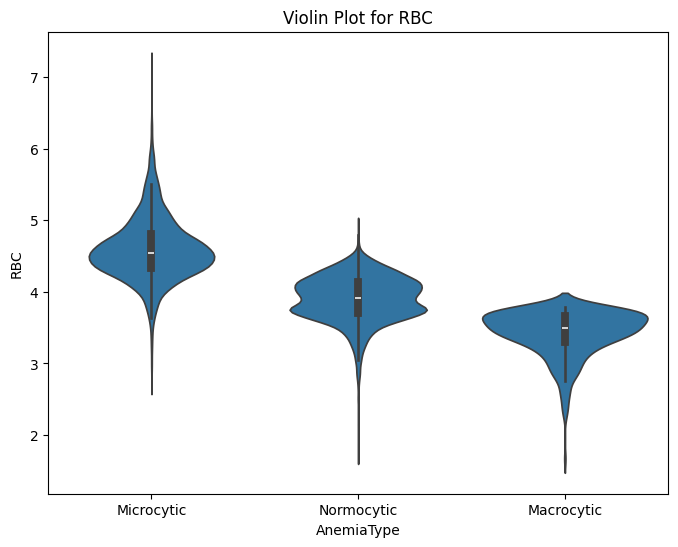

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='AnemiaType', ylabel='HGB'>

Text(0.5, 1.0, 'Violin Plot for HGB')

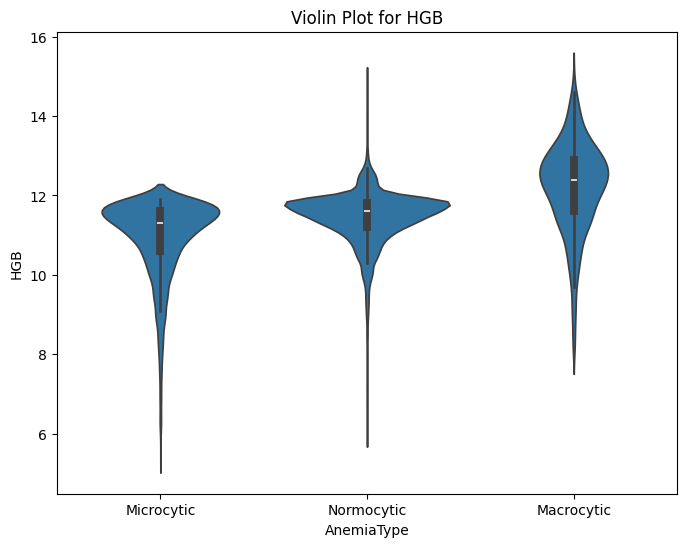

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='AnemiaType', ylabel='HCT'>

Text(0.5, 1.0, 'Violin Plot for HCT')

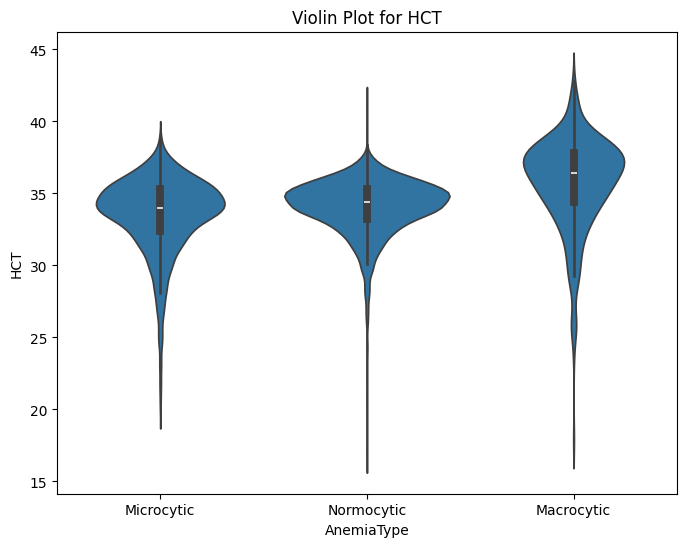

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='AnemiaType', ylabel='MCV'>

Text(0.5, 1.0, 'Violin Plot for MCV')

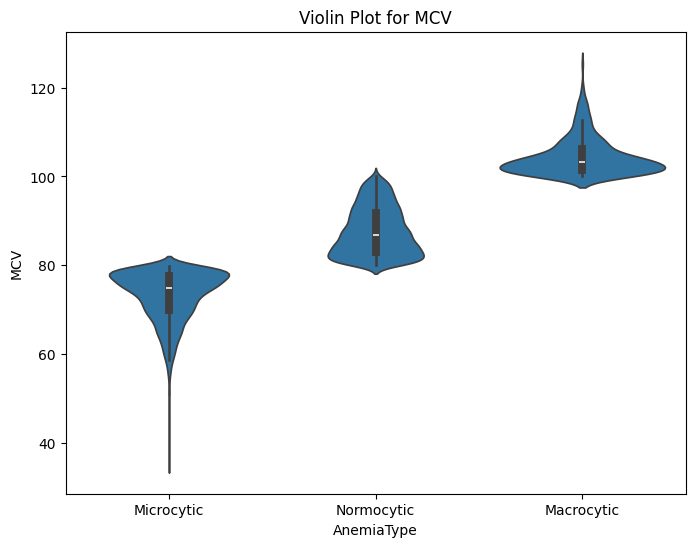

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='AnemiaType', ylabel='MCH'>

Text(0.5, 1.0, 'Violin Plot for MCH')

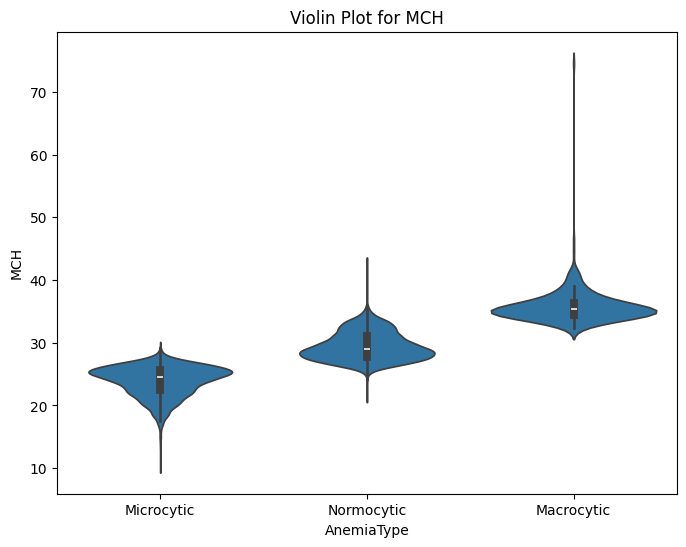

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='AnemiaType', ylabel='MCHC'>

Text(0.5, 1.0, 'Violin Plot for MCHC')

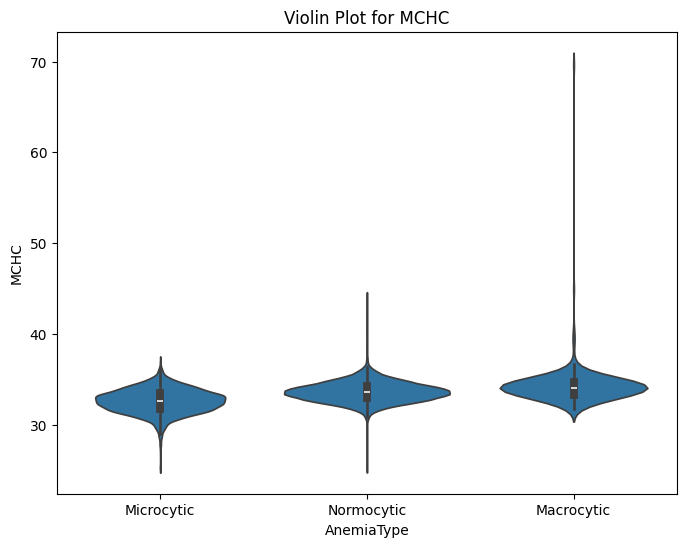

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='AnemiaType', ylabel='RDW'>

Text(0.5, 1.0, 'Violin Plot for RDW')

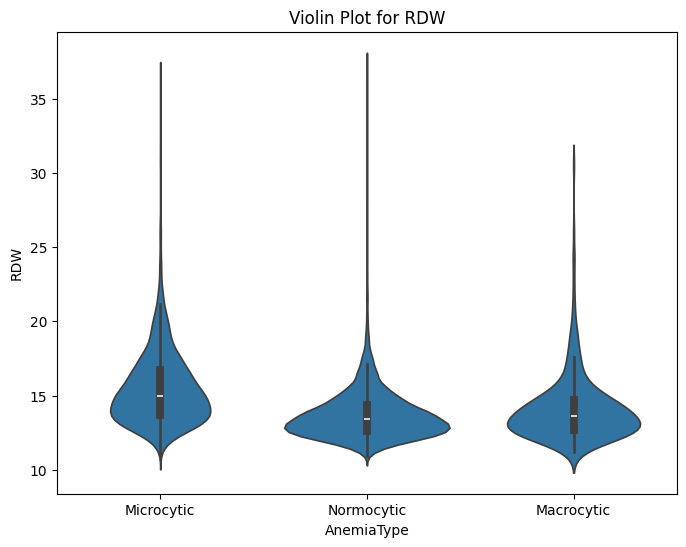

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='AnemiaType', ylabel='PLT'>

Text(0.5, 1.0, 'Violin Plot for PLT')

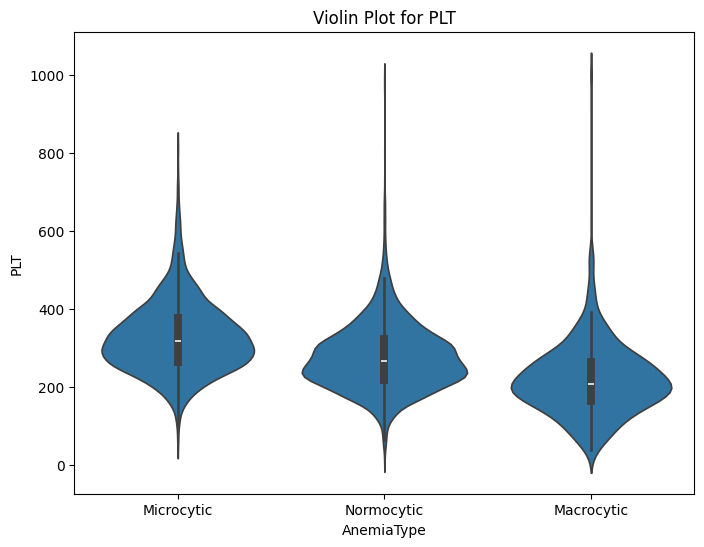

In [23]:
numeric_columns = df_anemia.select_dtypes(include=[np.number]).columns.tolist()

for feature in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='AnemiaType', y=feature, data=df_anemia)
    plt.title(f'Violin Plot for {feature}')
    plt.show()


## 4.2.1 Comment:

### Post-analysis observations

1. **HGB and RBC distribution:**
- There is a significant difference in the distribution of *HGB* and *RBC* across anemia types.
- This indicates that the type of anemia affects different levels in the blood cells

2. **HCT and PLT variation:**
- Slight variation in *HCT* and *PLT* was observed across different anemia types.

3. **MCH and MCHC variations:**
- There is a significant difference in *MCH* values ​​although *MCHC* is unchanged

4. **Macrocytic vs. Microcytic and Normocytic Anemia:**
- *Macrocytic anemia* shows significant differences in several features compared to *Microcytic* and *Normocytic* anemia types.
- Although the overall values ​​may appear similar, the *violin plot* revealed distinct details and patterns, highlighting the uniqueness of macrocytic anemia.

In general, deeper insights will be revealed through correlation analysis. [Correlation]

## 4.2.2 Correlation Anemia Types : 

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

def correlation_plots(correlation_matrices, titles, layout='single', fig_size=(7, 7)):
    """
    Plot correlation heatmaps for one or multiple matrices.
    
    Parameters:
    - correlation_matrices (list of DataFrames): List of correlation matrices to plot.
    - titles (list of str): List of titles for each correlation matrix.
    - layout (str): Layout of plots ('single' or 'multi') - 'single' to plot each separately, 'multi' to plot them together.
    - fig_size (tuple): Size of each plot (for 'single') or of entire figure (for 'multi').
    """
    num_plots = len(correlation_matrices)
    
    if layout == 'single':
        # Plot each matrix in a separate figure
        for i in range(num_plots):
            plt.figure(figsize=fig_size)
            sns.heatmap(correlation_matrices[i], annot=True, fmt=".2f", cmap='coolwarm', square=True)
            plt.title(titles[i])
            plt.show()
    elif layout == 'multi':
        # Plot all matrices in a single figure with subplots
        cols = min(num_plots, 3)  # Up to 3 per row for better layout
        rows = (num_plots + cols - 1) // cols
        fig, axes = plt.subplots(rows, cols, figsize=fig_size)
        axes = axes.flatten() if num_plots > 1 else [axes]  # Flatten axes for easy indexing
        
        for i in range(num_plots):
            sns.heatmap(correlation_matrices[i], annot=True, fmt=".2f", cmap='coolwarm', square=True, ax=axes[i])
            axes[i].set_title(titles[i])
        
        # Hide any extra subplots
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')
            
        plt.tight_layout()
        plt.show()



def scatter_plot(fet_1,fet_2 , DataFrame):
    plt.figure(figsize=(10,6))
    sns.regplot(data=DataFrame, x=fet_1, y=fet_2, scatter=True, order=1, label='Linear')
    
    # نضيف منحنى غير خطي (polynomial)
    sns.regplot(data=DataFrame, x=fet_1, y=fet_2, scatter=True, order=2, label='Polynomial')
    
    plt.title(f'{fet_1} vs {fet_2}: Linear vs Non-linear Relationship')
    plt.legend()
    plt.show()

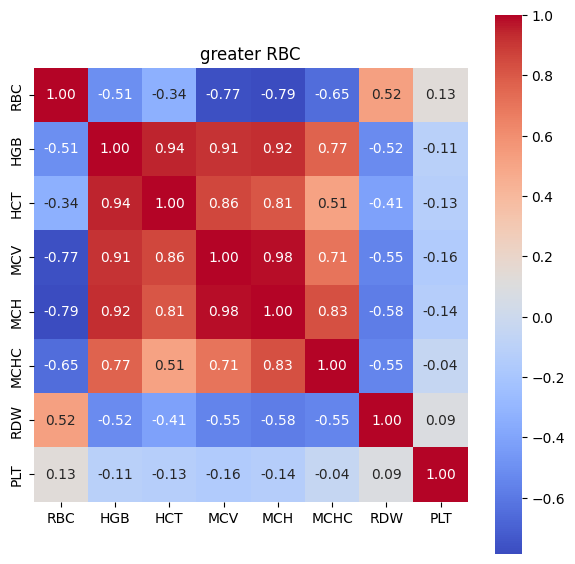

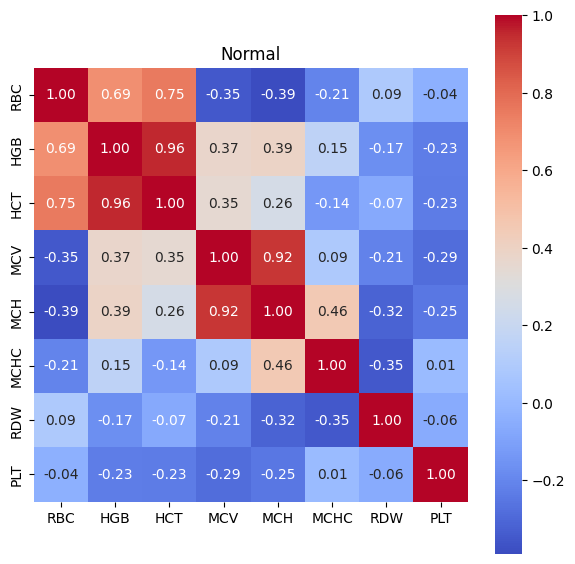

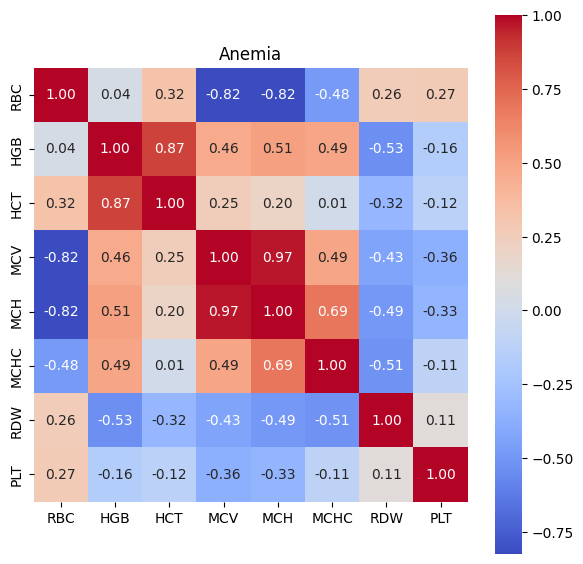

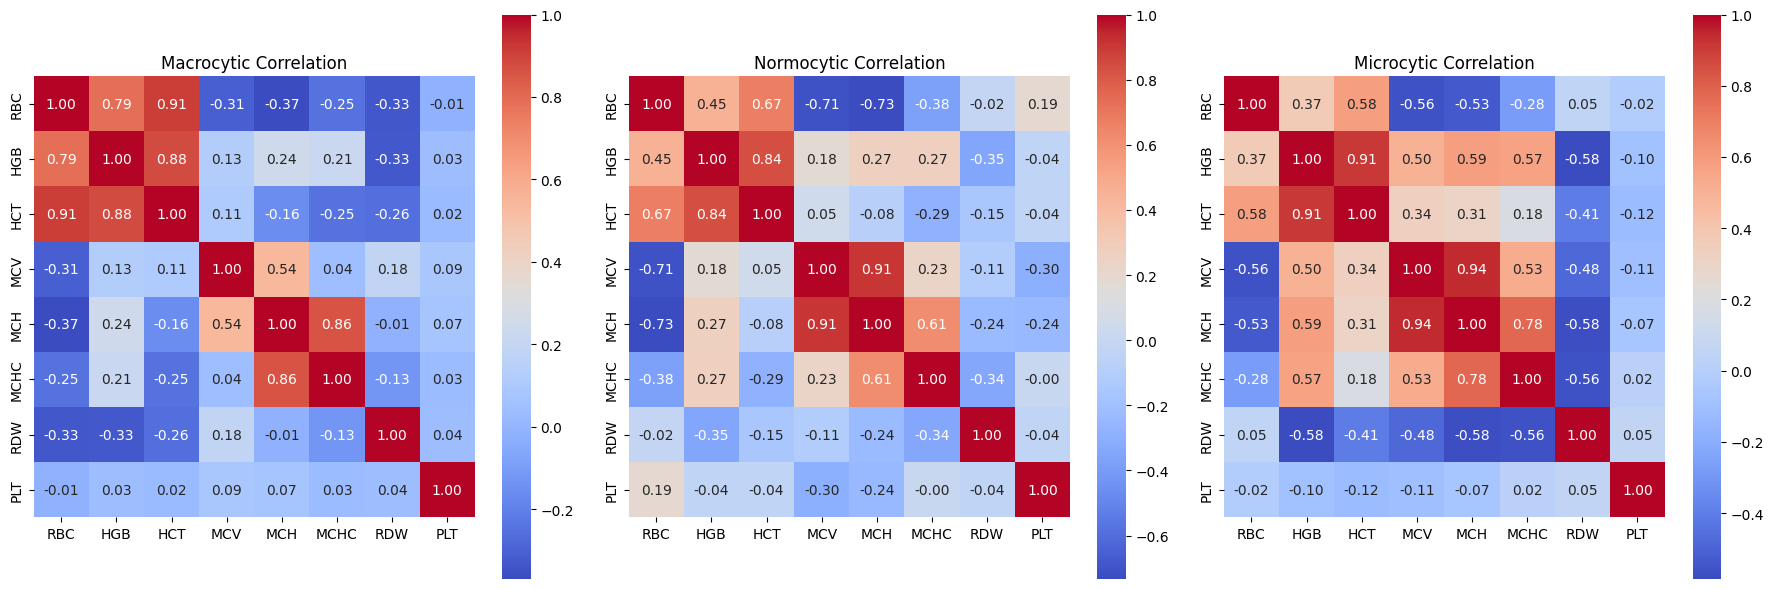

In [27]:
# General correlation matrix
correlation_matrix = df_anemia.drop(['AnemiaType'], axis=1).corr()  # Adding axis=1 to drop column
# Microcytic correlation matrix
correlation_matrix_micro = df_microcytic.drop(['AnemiaType'], axis=1).corr()
# Normocytic correlation matrix
correlation_matrix_normo = df_normocytic.drop(['AnemiaType'], axis=1).corr()
# Macrocytic correlation matrix
correlation_matrix_macro = df_macrocytic.drop(['AnemiaType'], axis=1).corr()
correlation_matrix_greater = df_RBC_GREATER.corr()
correlation_matrix_normal = df_RBC_NORMAL.corr() # Adding axis=1 to drop column
# Display the plots
correlation_plots([correlation_matrix_greater], ['greater RBC'], layout='single', fig_size=(7, 7))
correlation_plots([correlation_matrix_normal], ['Normal'], layout='single', fig_size=(7, 7))
correlation_plots([correlation_matrix], ['Anemia'], layout='single', fig_size=(7, 7))
correlation_plots(
    correlation_matrices=[correlation_matrix_macro, correlation_matrix_normo, correlation_matrix_micro],
    titles=['Macrocytic Correlation', 'Normocytic Correlation', 'Microcytic Correlation'],
    layout='multi',  # لطباعة الرسومات جنبًا إلى جنب في نفس الشكل
    fig_size=(18, 6)  # حجم الشكل الكامل عند استخدام `multi`
)


In [28]:
def create_correlation_comparison(correlation_matrices):
    """
    تحليل الارتباطات بين المتغيرات لأنواع مختلفة من فقر الدم
    
    Parameters:
    correlation_matrices (dict): قواميس تحتوي على مصفوفات الارتباط لكل نوع من فقر الدم
    
    Returns:
    pd.DataFrame: جدول يحتوي على مقارنة الارتباطات القوية بين المتغيرات
    """
    # تعريف حدود الارتباط
    UPPER_THRESHOLD = 0.5
    LOWER_THRESHOLD = -0.4
    
    # إنشاء قائمة لتخزين جميع العلاقات
    all_relations = []
    
    # معالجة كل نوع من فقر الدم
    for anemia_type, corr_matrix in correlation_matrices.items():
        # الحصول على المثلث العلوي من مصفوفة الارتباط لتجنب التكرار
        upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        
        # تحديد الارتباطات القوية
        strong_correlations = upper_triangle[
            (upper_triangle >= UPPER_THRESHOLD) | 
            (upper_triangle <= LOWER_THRESHOLD)
        ]
        
        # جمع العلاقات القوية
        for feature1, row in strong_correlations.items():
            for feature2, corr_value in row.dropna().items():
                relation = f"{feature1}/{feature2}"
                all_relations.append({
                    'Relation': relation,
                    'Anemia_Type': anemia_type,
                    'Correlation': corr_value
                })
    
    # تحويل القائمة إلى DataFrame
    relations_df = pd.DataFrame(all_relations)
    
    # إعادة تشكيل البيانات لتكون في الشكل المطلوب
    comparison_df = relations_df.pivot(
        index='Relation',
        columns='Anemia_Type',
        values='Correlation'
    ).reset_index()
    
    # ملء القيم المفقودة
    comparison_df.fillna('No Strong Correlation', inplace=True)
    
    return comparison_df

# استخدام الدالة
anemia_types = ['Microcytic', 'Normocytic', 'Macrocytic']
correlation_matrices = {
    'Microcytic': correlation_matrix_micro,
    'Normocytic': correlation_matrix_normo,
    'Macrocytic': correlation_matrix_macro
}

comparison_df = create_correlation_comparison(correlation_matrices)

/tmp/ipykernel_68396/443346295.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Strong Correlation' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  comparison_df.fillna('No Strong Correlation', inplace=True)


In [29]:
# Sort by Microcytic correlations in descending order
comparison_df_micro = comparison_df.sort_values(by='Microcytic', ascending=False, key=lambda col: pd.to_numeric(col, errors='coerce')).reset_index(drop=True)

# Sort by Normocytic correlations in descending order
comparison_df_normo = comparison_df.sort_values(by='Normocytic', ascending=False, key=lambda col: pd.to_numeric(col, errors='coerce')).reset_index(drop=True)

# Sort by Macrocytic correlations in descending order
comparison_df_macro = comparison_df.sort_values(by='Macrocytic', ascending=False, key=lambda col: pd.to_numeric(col, errors='coerce')).reset_index(drop=True)

# Display the sorted dataframes
print("Sorted by Microcytic Correlations:")
display(comparison_df_micro)

print("\nSorted by Normocytic Correlations:")
display(comparison_df_normo)

print("\nSorted by Macrocytic Correlations:")
display(comparison_df_macro)


Sorted by Microcytic Correlations:


Anemia_Type,Relation,Macrocytic,Microcytic,Normocytic
0,MCH/MCV,0.542587,0.940087,0.907772
1,HCT/HGB,0.880521,0.907517,0.838345
2,MCHC/MCH,0.859841,0.779638,0.614616
3,MCH/HGB,No Strong Correlation,0.585076,No Strong Correlation
4,HCT/RBC,0.911366,0.582969,0.668793
5,MCHC/HGB,No Strong Correlation,0.570064,No Strong Correlation
6,MCHC/MCV,No Strong Correlation,0.526108,No Strong Correlation
7,MCV/HGB,No Strong Correlation,0.501769,No Strong Correlation
8,RDW/HCT,No Strong Correlation,-0.410926,No Strong Correlation
9,RDW/MCV,No Strong Correlation,-0.481598,No Strong Correlation



Sorted by Normocytic Correlations:


Anemia_Type,Relation,Macrocytic,Microcytic,Normocytic
0,MCH/MCV,0.542587,0.940087,0.907772
1,HCT/HGB,0.880521,0.907517,0.838345
2,HCT/RBC,0.911366,0.582969,0.668793
3,MCHC/MCH,0.859841,0.779638,0.614616
4,MCV/RBC,No Strong Correlation,-0.562345,-0.709165
5,MCH/RBC,No Strong Correlation,-0.531357,-0.733247
6,HGB/RBC,0.79099,No Strong Correlation,No Strong Correlation
7,MCH/HGB,No Strong Correlation,0.585076,No Strong Correlation
8,MCHC/HGB,No Strong Correlation,0.570064,No Strong Correlation
9,MCHC/MCV,No Strong Correlation,0.526108,No Strong Correlation



Sorted by Macrocytic Correlations:


Anemia_Type,Relation,Macrocytic,Microcytic,Normocytic
0,HCT/RBC,0.911366,0.582969,0.668793
1,HCT/HGB,0.880521,0.907517,0.838345
2,MCHC/MCH,0.859841,0.779638,0.614616
3,HGB/RBC,0.79099,No Strong Correlation,No Strong Correlation
4,MCH/MCV,0.542587,0.940087,0.907772
5,MCH/HGB,No Strong Correlation,0.585076,No Strong Correlation
6,MCH/RBC,No Strong Correlation,-0.531357,-0.733247
7,MCHC/HGB,No Strong Correlation,0.570064,No Strong Correlation
8,MCHC/MCV,No Strong Correlation,0.526108,No Strong Correlation
9,MCV/HGB,No Strong Correlation,0.501769,No Strong Correlation


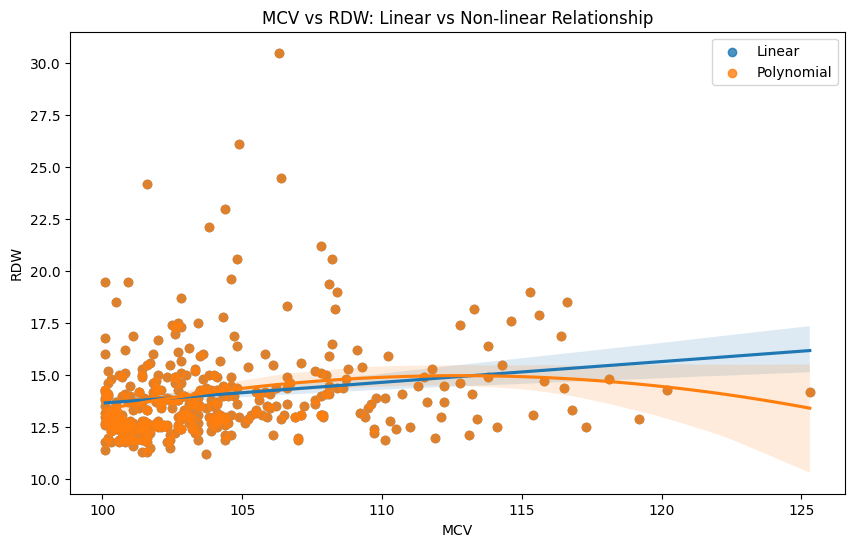

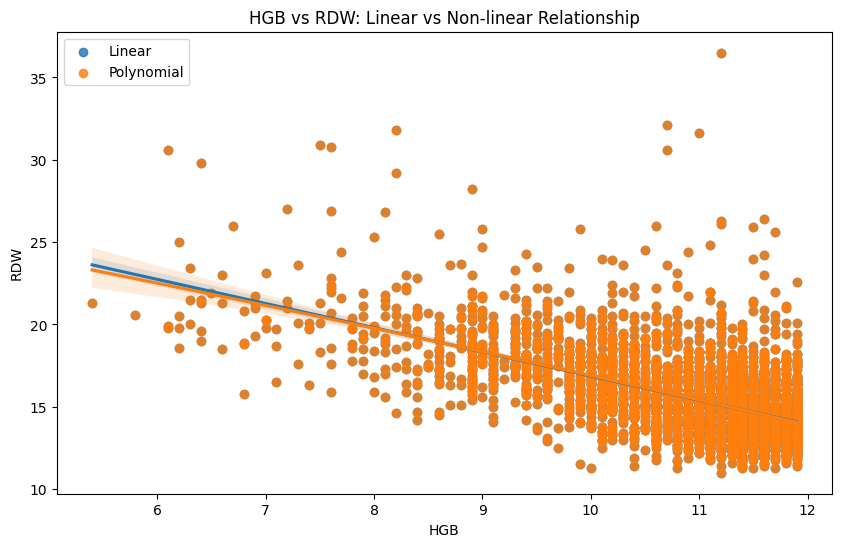

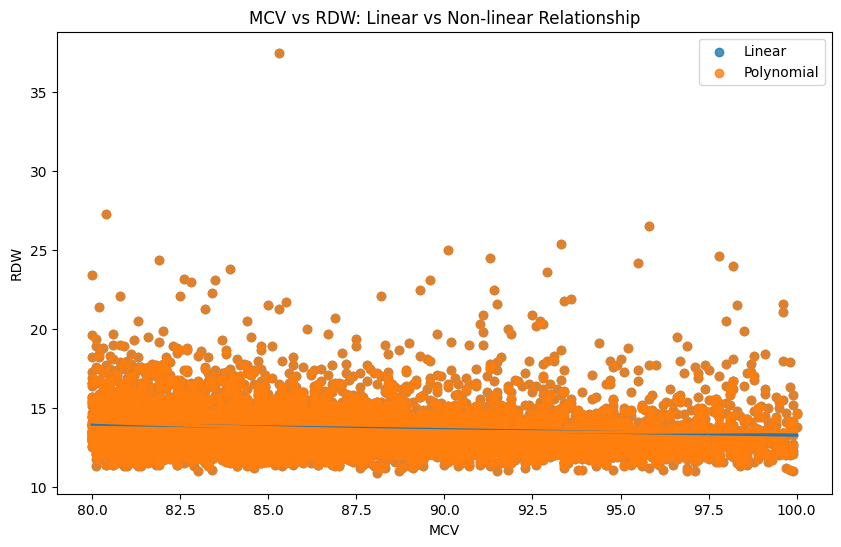

In [30]:

# scatter_plot('HCT','MCV' , df_macrocytic.sample(frac=1))
# scatter_plot('HCT','RBC' , df_macrocytic.sample(frac=1))
# scatter_plot('HCT','HGB' , df_macrocytic.sample(frac=1))
# scatter_plot('MCV','RBC' , df_anemia.sample(frac=0.2))
# scatter_plot('MCV','RBC' , df_RBC_NORMAL.sample(frac=0.2))
# scatter_plot('MCV','RBC' , df.sample(frac=0.2))
# scatter_plot('MCV','RBC' , df_macrocytic.sample(frac=1))
# scatter_plot('MCV','RBC' , df_normocytic.sample(frac=1))
# scatter_plot('MCV','RBC' , df_microcytic.sample(frac=1))
#scatter_plot('MCV','MCH' , df)
# scatter_plot('HGB','MCH' , df_macrocytic.sample(frac=1))
# scatter_plot('HGB','MCH' , df_microcytic.sample(frac=1))
# scatter_plot('HGB','MCH' , df_normocytic.sample(frac=1))

# scatter_plot('HGB','MCHC' , df_macrocytic.sample(frac=1))
# scatter_plot('HGB','MCHC' , df_microcytic.sample(frac=1))
# scatter_plot('HGB','MCHC' , df_normocytic.sample(frac=1))

scatter_plot('MCV','RDW' , df_macrocytic.sample(frac=1))
scatter_plot('HGB','RDW' , df_microcytic.sample(frac=1))
scatter_plot('MCV','RDW' , df_normocytic.sample(frac=1))

In [25]:
def diagnose_microcytic_anemia(row):
    """
    تشخيص فقر الدم الميكروسيتي (صغير الكريات) بناءً على المؤشرات المختلفة
    المراجع العلمية:
    - Nathan and Oski's Hematology of Infancy and Childhood
    - Williams Hematology, 10th Edition
    """
    diagnosis = []
    
    # Iron Deficiency Anemia (IDA) Pattern
    if (row['MCV'] < 80 and row['MCH'] < 27 and row['RDW'] > 14.5):
        if row['RDW'] > 17.5:
            diagnosis.append("Iron Deficiency Anemia - Late Stage")
        else:
            diagnosis.append("Iron Deficiency Anemia - Early Stage")
            
    # Thalassemia Pattern
    if (row['MCV'] < 80 and row['MCH'] < 27 and row['RDW'] < 14.5 and 
        row['RBC'] > 4.0):  # RBC often elevated or normal in thalassemia
        if row['RBC'] > 5.5:
            diagnosis.append("Beta Thalassemia Minor - Likely")
        else:
            diagnosis.append("Thalassemia Trait - Possible")
            
    # Mentzer Index (MI = MCV/RBC)
    mentzer_index = row['MCV'] / row['RBC']
    if mentzer_index < 13:
        diagnosis.append("Suggests Thalassemia")
    elif mentzer_index > 13:
        diagnosis.append("Suggests Iron Deficiency")
        
    return ' | '.join(diagnosis) if diagnosis else "Requires Further Investigation"

def diagnose_macrocytic_anemia(row):
    """
    تشخيص فقر الدم كبير الكريات
    """
    diagnosis = []
    
    # Classic B12/Folate Deficiency Pattern
    if (row['MCV'] > 100 and row['MCH'] > 34):
        if row['RDW'] > 16:
            diagnosis.append("Vitamin B12/Folate Deficiency - Active")
        else:
            diagnosis.append("Megaloblastic Anemia - Early Stage")
    
    # Evaluate RDW for mixed picture
    if row['RDW'] > 18:
        diagnosis.append("Severe Nutritional Deficiency")
        
    return ' | '.join(diagnosis) if diagnosis else "Requires Further Investigation"

def diagnose_normocytic_anemia(row):
    """
    تشخيص فقر الدم سوي الكريات
    """
    diagnosis = []
    
    # Chronic Disease Pattern
    if (row['MCV'] >= 80 and row['MCV'] <= 100 and row['RDW'] < 15):
        diagnosis.append("Anemia of Chronic Disease - Possible")
        
    # Early Iron Deficiency or Mixed Picture
    if (row['MCV'] >= 80 and row['MCV'] <= 100 and row['RDW'] > 15):
        diagnosis.append("Early Iron Deficiency or Mixed Deficiency")
        
    # Acute Blood Loss Pattern
    if (row['RDW'] < 15 and row['MCHC'] > 32):
        diagnosis.append("Recent Acute Blood Loss - Possible")
        
    return ' | '.join(diagnosis) if diagnosis else "Requires Further Investigation"

def analyze_anemia_severity(row):
    """
    تحديد شدة فقر الدم بناءً على مستوى الهيموجلوبين
    """
    if row['HGB'] >= 10:
        return "Mild"
    elif 7 <= row['HGB'] < 10:
        return "Moderate"
    elif 4 <= row['HGB'] < 7:
        return "Severe"
    else:
        return "Critical"

def comprehensive_anemia_analysis(df_anemia):
    """
    تحليل شامل لفقر الدم
    """
    # Create copy to avoid modifying original data
    df_analysis = df_anemia.copy()
    
    # Add severity analysis
    df_analysis['Severity'] = df_analysis.apply(analyze_anemia_severity, axis=1)
    
    # Add specific diagnoses based on anemia type
    conditions = {
        'Microcytic': diagnose_microcytic_anemia,
        'Macrocytic': diagnose_macrocytic_anemia,
        'Normocytic': diagnose_normocytic_anemia
    }
    
    df_analysis['Detailed_Diagnosis'] = df_analysis.apply(
        lambda row: conditions[row['AnemiaType']](row) 
        if row['AnemiaType'] in conditions else "Unknown Type",
        axis=1
    )
    
    return df_analysis

# Function to generate summary statistics for each anemia type
def generate_anemia_stats(df_analysis):
    """
    توليد إحصائيات تفصيلية لكل نوع من أنواع فقر الدم
    """
    stats = {}
    for anemia_type in df_analysis['AnemiaType'].unique():
        subset = df_analysis[df_analysis['AnemiaType'] == anemia_type]
        stats[anemia_type] = {
            'count': len(subset),
            'severity_distribution': subset['Severity'].value_counts(),
            'mean_values': {
                'HGB': subset['HGB'].mean(),
                'MCV': subset['MCV'].mean(),
                'MCH': subset['MCH'].mean(),
                'RDW': subset['RDW'].mean(),
                'RBC': subset['RBC'].mean()
            },
            'diagnosis_distribution': subset['Detailed_Diagnosis'].value_counts()
        }
    return stats

# Example usage
def main_analysis(df_microcytic, df_normocytic, df_macrocytic):
    """
    التحليل الرئيسي لجميع أنواع فقر الدم
    """
    # Combine all anemia DataFrames
    df_all_anemia = pd.concat([
        df_microcytic.assign(AnemiaType='Microcytic'),
        df_normocytic.assign(AnemiaType='Normocytic'),
        df_macrocytic.assign(AnemiaType='Macrocytic')
    ])
    
    # Perform comprehensive analysis
    results = comprehensive_anemia_analysis(df_all_anemia)
    
    # Generate statistics
    stats = generate_anemia_stats(results)
    
    return results, stats

In [27]:
# تحليل البيانات
results, stats = main_analysis(df_microcytic, df_normocytic, df_macrocytic)

# عرض النتائج لمريض معين
try:
    print(results.iloc[0][['AnemiaType', 'Severity', 'Detailed_Diagnosis']])
except KeyError:
    print("Error: One or more columns are missing in results.")
except IndexError:
    print("Error: No rows available in results.")

# عرض إحصائيات لنوع معين من فقر الدم
if 'Microcytic' in stats:
    print(stats['Microcytic'])
else:
    print("Error: 'Microcytic' type is not available in stats.")


NameError: name 'df_microcytic' is not defined

In [29]:
df_RBC_NORMAL

,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
18168,4.73,14.1,41.8,88.5,29.7,33.6,13.7,214.0
18169,4.52,13.7,39.3,86.9,30.3,34.8,11.7,270.0
18171,5.13,14.5,43.6,84.9,28.3,33.3,13.1,209.0
18172,4.22,13.1,38.7,91.7,30.9,33.7,12.8,453.0
18173,4.60,13.4,40.2,87.4,29.1,33.3,14.3,244.0
...,...,...,...,...,...,...,...,...
8718,4.67,14.4,41.0,87.8,30.8,35.0,13.1,240.0
8719,5.10,14.1,42.5,83.2,27.7,33.3,14.3,284.0
8721,4.34,13.6,39.4,90.7,31.2,34.4,13.8,353.0
8725,4.94,14.7,43.9,88.7,29.6,33.4,13.4,230.0


In [31]:
import pandas as pd

# افترض أن df_RBC_NORMAL هو اسم DataFrame الخاص بك
# هذا هو المثال، تأكد من أن الأعمدة تحمل الأسماء الصحيحة حسب DataFrame لديك

# تعريف القيم الطبيعية لكل مؤشر
normal_ranges = {
    'MCV': (80, 100),  # قم بتحديث القيم حسب النطاقات الطبيعية
    'HCT': (38, 50),   # قم بتحديث القيم حسب النطاقات الطبيعية
    'MCHC': (32, 36),  # قم بتحديث القيم حسب النطاقات الطبيعية
    'RDW': (11.5, 14.5)  # قم بتحديث القيم حسب النطاقات الطبيعية
}

# فحص القيم غير الطبيعية
results = {}
for index, (col, (low, high)) in enumerate(normal_ranges.items()):
    abnormal_count = df_RBC_NORMAL[(df_RBC_NORMAL[col] < low) | (df_RBC_NORMAL[col] > high)].shape[0]
    total_count = df_RBC_NORMAL.shape[0]
    results[col] = {
        'Abnormal Count': abnormal_count,
        'Total Count': total_count,
        'Percentage Abnormal': (abnormal_count / total_count) * 100 if total_count > 0 else 0
    }

# تحويل النتائج إلى DataFrame
abnormality_report = pd.DataFrame(results).T
print(abnormality_report)


      Abnormal Count  Total Count  Percentage Abnormal
MCV           6945.0      84625.0             8.206795
HCT          17045.0      84625.0            20.141802
MCHC          1982.0      84625.0             2.342097
RDW           7180.0      84625.0             8.484490


In [33]:


# افترض أن df_RBC_NORMAL هو DataFrame الذي يحتوي على بيانات القيم الطبيعية

# تحديد النطاقات الطبيعية
normal_hgb_range = (12,17.5)  # للذكور
normal_rbc_range = (3.8, 5)     # للذكور
normal_hct_range = (34, 44)   # للذكور

# تصفية البيانات
filtered_data = df_RBC_NORMAL[
    (df_RBC_NORMAL['HGB'].between(*normal_hgb_range)) &
    (df_RBC_NORMAL['RBC'].between(*normal_rbc_range)) &
    (df_RBC_NORMAL['HCT'].between(*normal_hct_range))
]

# احصاء القيم الخاصة بـ MCV في البيانات المصفاة
mcv_abnormal_count = filtered_data[filtered_data['MCV'] < 80].shape[0] + filtered_data[filtered_data['MCV'] > 100].shape[0]
mcv_total_count = filtered_data.shape[0]

# حساب النسبة
if mcv_total_count > 0:
    mcv_percentage_abnormal = (mcv_abnormal_count / mcv_total_count) * 100
else:
    mcv_percentage_abnormal = 0

print(f"Total Count with Normal HGB, RBC, HCT: {mcv_total_count}")
print(f"Abnormal MCV Count: {mcv_abnormal_count}")
print(f"Percentage of Abnormal MCV: {mcv_percentage_abnormal:.2f}%")


Total Count with Normal HGB, RBC, HCT: 57034
Abnormal MCV Count: 3878
Percentage of Abnormal MCV: 6.80%


In [36]:
df_anemia

,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,AnemiaType
18170,4.77,9.3,29.4,61.5,19.4,31.6,15.3,471.0,Microcytic
18182,3.57,10.9,33.3,93.0,30.4,32.7,14.1,219.0,Normocytic
18184,3.99,11.1,33.8,84.8,27.9,32.9,13.3,435.0,Normocytic
18195,4.48,11.7,35.2,78.4,26.1,33.3,11.8,347.0,Microcytic
18204,4.32,11.4,35.0,81.0,26.6,32.8,13.9,347.0,Normocytic
...,...,...,...,...,...,...,...,...,...
8661,4.37,11.0,34.7,79.3,25.2,31.8,14.3,347.0,Microcytic
8667,3.34,10.8,32.3,97.0,32.4,33.4,12.8,220.0,Normocytic
8684,3.84,11.9,34.6,90.0,30.9,34.3,13.0,307.0,Normocytic
8716,4.35,9.0,29.0,66.6,20.9,31.3,19.8,231.0,Microcytic


In [35]:

# استخرج الصفوف التي تحتوي على HGB و HCT طبيعيين و RBC منخفض
normal_hgb_hct = df_anemia[
    (df_anemia['HGB'] >= normal_hgb_range[0]) & (df_anemia['HGB'] <= normal_hgb_range[1]) &  # تأكد من أن الهيموجلوبين طبيعي
    (df_anemia['HCT'] >= normal_hct_range[0]) & (df_anemia['HCT'] <= normal_hct_range[1]) &   # تأكد من أن HCT طبيعي
    (df_anemia['RBC'] < normal_rbc_range[0])  # تأكد من أن RBC منخفض
]

# عرض النتائج
normal_hgb_hct


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,AnemiaType
18289,3.52,12.1,34.7,98.5,34.1,34.7,11.5,274.0,Normocytic
18516,3.63,12.5,36.0,99.1,34.5,34.8,12.0,312.0,Normocytic
18745,3.59,12.1,34.6,96.2,33.7,35.0,12.1,192.0,Normocytic
18847,3.76,12.4,36.1,95.7,32.7,34.2,12.1,181.0,Normocytic
18867,3.70,12.2,35.4,95.7,32.9,34.4,12.3,217.0,Normocytic
...,...,...,...,...,...,...,...,...,...
8393,3.73,12.4,34.8,93.2,33.0,35.5,14.4,171.0,Normocytic
8443,3.78,12.2,35.7,94.6,32.1,34.0,14.6,190.0,Normocytic
8567,3.79,12.4,37.1,98.0,32.6,33.3,14.7,195.0,Normocytic
8658,3.79,12.4,37.2,98.1,32.8,33.4,15.9,218.0,Normocytic


In [38]:
# استخرج الصفوف التي تحتوي على HGB وHCT وRBC طبيعيين
normal_values = df_anemia[
    (df_anemia['HGB'] >= normal_hgb_range[0]) & (df_anemia['HGB'] <= normal_hgb_range[1]) &  # تأكد من أن الهيموجلوبين طبيعي
    (df_anemia['HCT'] >= normal_hct_range[0]) & (df_anemia['HCT'] <= normal_hct_range[1]) &   # تأكد من أن HCT طبيعي
    (df_anemia['RBC'] >= normal_rbc_range[0]) & (df_anemia['RBC'] <= normal_rbc_range[1])   # تأكد من أن RBC طبيعي
]

# استخرج MCV أقل من 80
mcv_low = normal_values[normal_values['MCV'] < 80]

# استخرج MCV أكبر من أو يساوي 80
mcv_high = normal_values[normal_values['MCV'] >100]

# عرض النتائج
print("Rows with Normal HGB, HCT, RBC and MCV < 80:")
print(mcv_low)

print("\nRows with Normal HGB, HCT, RBC and MCV >= 80:")
print(mcv_high)


Rows with Normal HGB, HCT, RBC and MCV < 80:
Empty DataFrame
Columns: [RBC, HGB, HCT, MCV, MCH, MCHC, RDW, PLT, AnemiaType]
Index: []

Rows with Normal HGB, HCT, RBC and MCV >= 80:
Empty DataFrame
Columns: [RBC, HGB, HCT, MCV, MCH, MCHC, RDW, PLT, AnemiaType]
Index: []


In [39]:
# استخرج الصفوف التي تحتوي على HCT مرتفع و HGB طبيعي و RBC منخفض
high_hct_normal_hgb_low_rbc = df_anemia[
    (df_anemia['HCT'] > normal_hct_range[1]) &               # تأكد من أن HCT مرتفع
    (df_anemia['HGB'] >= normal_hgb_range[0]) & (df_anemia['HGB'] <= normal_hgb_range[1]) &  # تأكد من أن HGB طبيعي
    (df_anemia['RBC'] < normal_rbc_range[0])                  # تأكد من أن RBC منخفض
]

# عرض النتائج
high_hct_normal_hgb_low_rbc


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,AnemiaType


In [40]:
# استخرج الصفوف التي تحتوي على HCT منخفض و HGB طبيعي و RBC منخفض
low_hct_normal_hgb_low_rbc = df_anemia[
    (df_anemia['HCT'] < normal_hct_range[0]) &               # تأكد من أن HCT منخفض
    (df_anemia['HGB'] >= normal_hgb_range[0]) & (df_anemia['HGB'] <= normal_hgb_range[1]) &  # تأكد من أن HGB طبيعي
    (df_anemia['RBC'] < normal_rbc_range[0])                  # تأكد من أن RBC منخفض
]

low_hct_normal_hgb_low_rbc.describe()
# عرض عدد تكرارات كل نوع من الأنيميا
anemia_type_counts = low_hct_normal_hgb_low_rbc['AnemiaType'].value_counts()

anemia_type_counts

,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,3.487727,12.297727,32.861364,94.629545,35.822727,37.754545,12.931818,270.795455
std,0.347609,0.458759,2.537277,5.168085,6.735358,5.449406,1.146840,77.260231
min,1.670000,12.000000,17.900000,84.600000,31.600000,35.300000,11.400000,142.000000
25%,3.452500,12.000000,32.900000,92.250000,32.875000,35.700000,12.275000,219.000000
50%,3.555000,12.100000,33.600000,93.700000,34.050000,36.050000,12.800000,253.500000
75%,3.642500,12.325000,33.800000,97.100000,35.575000,37.425000,13.350000,318.750000
max,3.790000,14.000000,33.900000,113.300000,74.500000,69.600000,18.200000,488.000000


AnemiaType
Normocytic    40
Macrocytic     4
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='HCT', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of HCT by Anemia Type')

Text(0.5, 0, 'HCT')

Text(0, 0.5, 'Frequency')

/tmp/ipykernel_68396/2160338077.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Anemia Type')


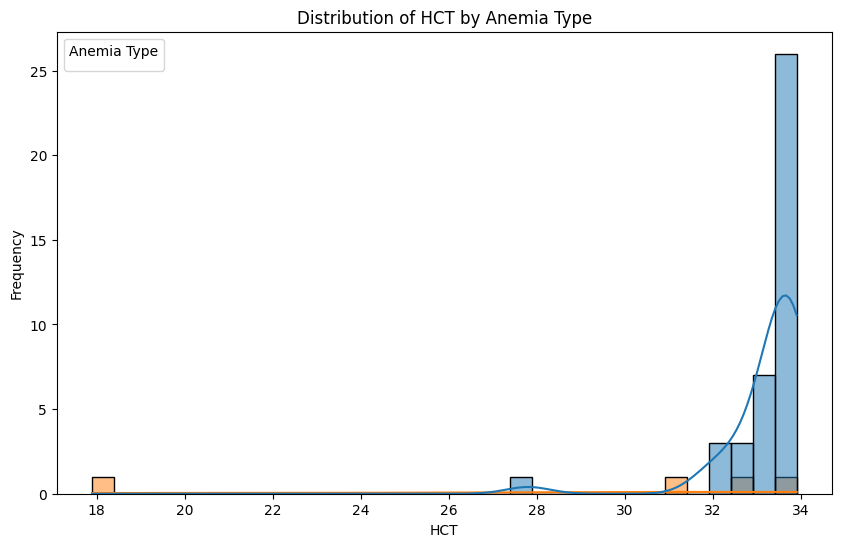

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='RBC', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of RBC by Anemia Type')

Text(0.5, 0, 'RBC')

Text(0, 0.5, 'Frequency')

/tmp/ipykernel_68396/2160338077.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Anemia Type')


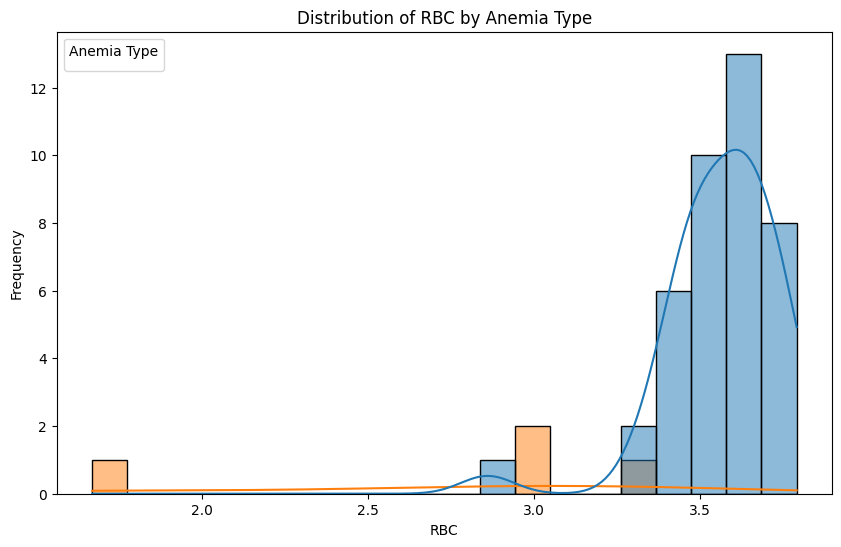

In [ ]:

# اختيار البيانات التي تحتوي على HCT منخفض و HGB طبيعي و RBC منخفض
low_hct_normal_hgb_low_rbc = df_anemia[
    (df_anemia['HCT'] < normal_hct_range[0]) &                # تأكد من أن HCT منخفض
    (df_anemia['HGB'] >= normal_hgb_range[0]) & (df_anemia['HGB'] <= normal_hgb_range[1]) &  # تأكد من أن HGB طبيعي
    (df_anemia['RBC'] < normal_rbc_range[0])                   # تأكد من أن RBC منخفض
]

# توزيع HCT لكل نوع من الأنيميا
plt.figure(figsize=(10, 6))
sns.histplot(data=low_hct_normal_hgb_low_rbc, x='HCT', hue='AnemiaType', kde=True)
plt.title("Distribution of HCT by Anemia Type")
plt.xlabel("HCT")
plt.ylabel("Frequency")
plt.legend(title='Anemia Type')
plt.show()

# توزيع RBC لكل نوع من الأنيميا
plt.figure(figsize=(10, 6))
sns.histplot(data=low_hct_normal_hgb_low_rbc, x='RBC', hue='AnemiaType', kde=True)
plt.title("Distribution of RBC by Anemia Type")
plt.xlabel("RBC")
plt.ylabel("Frequency")
plt.legend(title='Anemia Type')
plt.show()

# التوزيع المشترك بين HCT و RBC لكل نوع من الأنيميا
sns.jointplot(data=low_hct_normal_hgb_low_rbc, x='HCT', y='RBC', hue='AnemiaType', kind="kde", height=8)
plt.suptitle("Joint Distribution of HCT and RBC by Anemia Type", y=1.05)
plt.xlabel("HCT")
plt.ylabel("RBC")
plt.show()


In [ ]:
low_hct_normal_hgb_low_rbc[low_hct_normal_hgb_low_rbc['HCT']<=20]

In [ ]:
df_rbc[df_rbc['HCT']<=20]

In [ ]:
# استخرج الصفوف التي تحتوي على HCT مرتفع و HGB طبيعي و RBC منخفض
normal_hct_normal_hgb_low_rbc = df_anemia[
    (df_anemia['HCT'] >= normal_hct_range[0]) & (df_anemia['HCT'] <= normal_hct_range[1]) &             
    (df_anemia['HGB'] >= normal_hgb_range[0]) & (df_anemia['HGB'] <= normal_hgb_range[1]) & 
    (df_anemia['RBC'] < normal_rbc_range[0])  
]


# عرض النتائج
normal_hct_normal_hgb_low_rbc
anemia_type_counts = normal_hct_normal_hgb_low_rbc['AnemiaType'].value_counts()

anemia_type_counts

In [ ]:
# استخرج الصفوف التي تحتوي على HGB و RBC طبيعي و HCT غير طبيعي

# تحديد النطاقات الطبيعية
normal_hgb_range = (12, 17.5)  # للذكور
normal_rbc_range = (3.8, 5)     # للذكور
normal_hct_range = (34, 44)     # للذكور

abnormal_hct_normal_hgb_normal_rbc = df_anemia[
    ((df_rbc['HCT'] < normal_hct_range[0]) | (df_anemia['HCT'] > normal_hct_range[1])) &  # تأكد من أن HCT غير طبيعي
    (df_rbc['HGB'] >= normal_hgb_range[0]) & (df_anemia['HGB'] <= normal_hgb_range[1]) &  # تأكد من أن HGB طبيعي
    (df_rbc['RBC'] >= normal_rbc_range[0]) & (df_anemia['RBC'] <= normal_rbc_range[1])    # تأكد من أن RBC طبيعي
]

# عرض النتائج
print(abnormal_hct_normal_hgb_normal_rbc)

# حساب عدد الأنواع المختلفة لفقر الدم
anemia_type_counts = abnormal_hct_normal_hgb_normal_rbc['AnemiaType'].value_counts()
print(anemia_type_counts)


In [54]:

# تعريف النطاقات المناسبة لـ MCV
mcv_bins = [0, 80, 100, 130]  # حدود النطاقات لـ MCV
mcv_labels = ['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)']  # تسميات النطاقات

# إضافة عمود جديد للـ MCV
df_rbc['MCV_Category'] = pd.cut(df_rbc['MCV'], bins=mcv_bins, labels=mcv_labels, right=False)

# تحديد النطاقات الطبيعية
normal_hgb_range = (12, 17.5)  # للذكور
normal_rbc_range = (3.8, 5)     # للذكور
normal_hct_range = (34, 44)     # للذكور

# استخراج الاحتمالات الممكنة
results = {}

# HGB Normal, RBC Normal, HCT Normal
results['HGB Normal, RBC Normal, HCT Normal'] = df_rbc[
    (df_rbc['HGB'] >= normal_hgb_range[0]) & (df_rbc['HGB'] <= normal_hgb_range[1]) &
    (df_rbc['RBC'] >= normal_rbc_range[0]) & (df_rbc['RBC'] <= normal_rbc_range[1]) &
    (df_rbc['HCT'] >= normal_hct_range[0]) & (df_rbc['HCT'] <= normal_hct_range[1])
]

# HGB Normal, RBC Normal, HCT Abnormal
results['HGB Normal, RBC Normal, HCT Abnormal'] = df_rbc[
    (df_rbc['HGB'] >= normal_hgb_range[0]) & (df_rbc['HGB'] <= normal_hgb_range[1]) &
    (df_rbc['RBC'] >= normal_rbc_range[0]) & (df_rbc['RBC'] <= normal_rbc_range[1]) &
    (df_rbc['HCT'] < normal_hct_range[0])  # HCT منخفض
]

# HGB Normal, RBC Abnormal, HCT Normal
results['HGB Normal, RBC Abnormal, HCT Normal'] = df_rbc[
    (df_rbc['HGB'] >= normal_hgb_range[0]) & (df_rbc['HGB'] <= normal_hgb_range[1]) &
    (df_rbc['RBC'] < normal_rbc_range[0]) &  # RBC منخفض
    (df_rbc['HCT'] >= normal_hct_range[0]) & (df_rbc['HCT'] <= normal_hct_range[1])
]

# HGB Normal, RBC Abnormal, HCT Abnormal
results['HGB Normal, RBC Abnormal, HCT Abnormal'] = df_rbc[
    (df_rbc['HGB'] >= normal_hgb_range[0]) & (df_rbc['HGB'] <= normal_hgb_range[1]) &
    (df_rbc['RBC'] < normal_rbc_range[0]) &  # RBC منخفض
    (df_rbc['HCT'] < normal_hct_range[0])  # HCT منخفض
]

# HGB Abnormal, RBC Normal, HCT Normal
results['HGB Abnormal, RBC Normal, HCT Normal'] = df_rbc[
    (df_rbc['HGB'] < normal_hgb_range[0]) &  # HGB منخفض
    (df_rbc['RBC'] >= normal_rbc_range[0]) & (df_rbc['RBC'] <= normal_rbc_range[1]) &
    (df_rbc['HCT'] >= normal_hct_range[0]) & (df_rbc['HCT'] <= normal_hct_range[1])
]

# HGB Abnormal, RBC Normal, HCT Abnormal
results['HGB Abnormal, RBC Normal, HCT Abnormal'] = df_rbc[
    (df_rbc['HGB'] < normal_hgb_range[0]) &  # HGB منخفض
    (df_rbc['RBC'] >= normal_rbc_range[0]) & (df_rbc['RBC'] <= normal_rbc_range[1]) &
    (df_rbc['HCT'] < normal_hct_range[0])  # HCT منخفض
]

# HGB Abnormal, RBC Abnormal, HCT Normal
results['HGB Abnormal, RBC Abnormal, HCT Normal'] = df_rbc[
    (df_rbc['HGB'] < normal_hgb_range[0]) &  # HGB منخفض
    (df_rbc['RBC'] < normal_rbc_range[0]) &  # RBC منخفض
    (df_rbc['HCT'] >= normal_hct_range[0]) & (df_rbc['HCT'] <= normal_hct_range[1])
]

# HGB Abnormal, RBC Abnormal, HCT Abnormal
results['HGB Abnormal, RBC Abnormal, HCT Abnormal'] = df_rbc[
    (df_rbc['HGB'] < normal_hgb_range[0]) &  # HGB منخفض
    (df_rbc['RBC'] < normal_rbc_range[0]) &  # RBC منخفض
    (df_rbc['HCT'] < normal_hct_range[0])  # HCT منخفض
]

# Qحساب عدد كل نوع من الأنيميا في نفس الاحتمال
for case, data in results.items():
    # حساب عدد كل نوع من الأنيميا حسب تصنيف MCV
    mcv_groups = data['MCV_Category'].value_counts()
    print(f"{case}: {len(data)} rows")
    print("MCV Distribution:")
    mcv_groups
    print("\n")


HGB Normal, RBC Normal, HCT Normal: 57034 rows
MCV Distribution:


/tmp/ipykernel_98963/3930730939.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rbc['MCV_Category'] = pd.cut(df_rbc['MCV'], bins=mcv_bins, labels=mcv_labels, right=False)


MCV_Category
Normocytic (80-100)    53147
Microcytic (<80)        3425
Macrocytic (>100)        462
Name: count, dtype: int64



HGB Normal, RBC Normal, HCT Abnormal: 89 rows
MCV Distribution:


MCV_Category
Normocytic (80-100)    64
Microcytic (<80)       24
Macrocytic (>100)       1
Name: count, dtype: int64



HGB Normal, RBC Abnormal, HCT Normal: 764 rows
MCV Distribution:


MCV_Category
Normocytic (80-100)    524
Macrocytic (>100)      240
Microcytic (<80)         0
Name: count, dtype: int64



HGB Normal, RBC Abnormal, HCT Abnormal: 44 rows
MCV Distribution:


MCV_Category
Normocytic (80-100)    40
Macrocytic (>100)       4
Microcytic (<80)        0
Name: count, dtype: int64



HGB Abnormal, RBC Normal, HCT Normal: 4005 rows
MCV Distribution:


MCV_Category
Normocytic (80-100)    2503
Microcytic (<80)       1502
Macrocytic (>100)         0
Name: count, dtype: int64



HGB Abnormal, RBC Normal, HCT Abnormal: 2617 rows
MCV Distribution:


MCV_Category
Microcytic (<80)       1631
Normocytic (80-100)     986
Macrocytic (>100)         0
Name: count, dtype: int64



HGB Abnormal, RBC Abnormal, HCT Normal: 436 rows
MCV Distribution:


MCV_Category
Normocytic (80-100)    386
Macrocytic (>100)       50
Microcytic (<80)         0
Name: count, dtype: int64



HGB Abnormal, RBC Abnormal, HCT Abnormal: 1355 rows
MCV Distribution:


MCV_Category
Normocytic (80-100)    1196
Microcytic (<80)         85
Macrocytic (>100)        74
Name: count, dtype: int64

In [55]:
df_rbc.describe()

,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,95501.000000,95501.000000,95501.000000,95501.000000,95501.000000,95501.000000,95501.000000,95501.000000
mean,4.676628,13.797030,40.726927,87.292241,29.573944,33.863062,13.139576,270.228037
std,0.478841,1.503794,4.293492,6.267451,2.440585,0.970965,1.296097,74.300656
min,1.670000,5.400000,16.300000,35.400000,10.200000,25.100000,6.300000,4.000000
25%,4.360000,12.800000,37.700000,83.700000,28.300000,33.300000,12.300000,219.000000
50%,4.660000,13.700000,40.500000,87.800000,29.800000,33.900000,12.900000,262.000000
75%,4.980000,14.800000,43.700000,91.400000,31.200000,34.500000,13.600000,311.000000
max,9.160000,19.900000,59.900000,125.300000,74.500000,69.600000,37.800000,1021.000000


In [22]:
# تحديد النطاقات الطبيعية لكل من HGB و RBC و HCT
normal_hgb_range = (12, 17.5)  # للذكور
normal_rbc_range = (3.8, 5)     # للذكور
normal_hct_range = (34, 44)     # للذكور

# دالة لتحديد الحالة (Low, Normal, High) بناءً على القيمة والنطاق الطبيعي
def get_status(value, normal_range):
    if value < normal_range[0]:
        return 'Low'
    elif value > normal_range[1]:
        return 'High'
    else:
        return 'Normal'

# إضافة الحالات لكل صف في البيانات بناءً على القيم
df_rbc['HGB_Status'] = df_rbc['HGB'].apply(get_status, normal_range=normal_hgb_range)
df_rbc['RBC_Status'] = df_rbc['RBC'].apply(get_status, normal_range=normal_rbc_range)
df_rbc['HCT_Status'] = df_rbc['HCT'].apply(get_status, normal_range=normal_hct_range)

# استخراج الاحتمالات الممكنة (27 حالة)
results = {}


# توليد الحالات بناءً على كل توليفة من HGB_Status, RBC_Status, و HCT_Status
for hgb_status in ['Low', 'Normal', 'High']:
    for rbc_status in ['Low', 'Normal', 'High']:
        for hct_status in ['Low', 'Normal', 'High']:
            case_name = f"HGB {hgb_status}, RBC {rbc_status}, HCT {hct_status}"
            results[case_name] = df_rbc[
                (df_rbc['HGB_Status'] == hgb_status) &
                (df_rbc['RBC_Status'] == rbc_status) &
                (df_rbc['HCT_Status'] == hct_status)
            ]

# طباعة عدد الحالات لكل احتمال
for case, data in results.items():
    print(f"{case}: {len(data)} rows")
    display(data)


/tmp/ipykernel_253715/2282603210.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rbc['HGB_Status'] = df_rbc['HGB'].apply(get_status, normal_range=normal_hgb_range)
/tmp/ipykernel_253715/2282603210.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rbc['RBC_Status'] = df_rbc['RBC'].apply(get_status, normal_range=normal_rbc_range)
/tmp/ipykernel_253715/2282603210.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

HGB Low, RBC Low, HCT Low: 1355 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status
18182,3.57,10.9,33.3,93.0,30.4,32.7,14.1,219.0,Low,Low,Low
18300,3.27,11.5,32.0,97.8,35.2,36.0,13.4,187.0,Low,Low,Low
18326,3.51,11.1,32.6,92.8,31.6,34.2,11.8,229.0,Low,Low,Low
18450,3.45,10.4,30.9,89.6,30.3,33.8,12.3,195.0,Low,Low,Low
18493,3.78,10.6,30.9,81.8,28.0,34.2,13.1,280.0,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...
8326,2.76,10.2,28.3,102.6,37.0,36.1,14.9,211.0,Low,Low,Low
8408,3.44,10.8,32.0,93.1,31.2,33.5,14.5,185.0,Low,Low,Low
8492,3.55,10.9,32.6,92.0,30.6,33.3,14.6,190.0,Low,Low,Low
8575,3.08,10.7,32.5,105.5,34.6,32.7,14.2,89.0,Low,Low,Low


HGB Low, RBC Low, HCT Normal: 436 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status
18293,3.67,11.6,34.4,93.9,31.6,33.7,11.9,177.0,Low,Low,Normal
19087,3.63,11.7,34.3,94.6,32.2,34.0,11.7,208.0,Low,Low,Normal
19227,3.41,11.9,34.3,100.6,34.9,34.7,15.0,286.0,Low,Low,Normal
19303,3.68,11.4,34.2,92.9,30.8,33.1,15.4,274.0,Low,Low,Normal
19434,3.66,11.9,34.9,95.4,32.3,33.9,12.2,165.0,Low,Low,Normal
...,...,...,...,...,...,...,...,...,...,...,...
7865,3.75,11.7,35.0,93.4,31.3,33.5,12.5,413.0,Low,Low,Normal
8086,3.74,11.2,34.4,92.0,29.8,32.4,16.8,305.0,Low,Low,Normal
8116,3.68,11.7,35.7,97.2,31.9,32.8,14.4,119.0,Low,Low,Normal
8142,3.56,11.5,34.2,96.2,32.4,33.6,14.5,163.0,Low,Low,Normal


HGB Low, RBC Low, HCT High: 0 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status


HGB Low, RBC Normal, HCT Low: 2617 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status
18170,4.77,9.3,29.4,61.5,19.4,31.6,15.3,471.0,Low,Normal,Low
18184,3.99,11.1,33.8,84.8,27.9,32.9,13.3,435.0,Low,Normal,Low
18249,4.11,11.4,33.4,81.3,27.7,34.1,12.5,400.0,Low,Normal,Low
18260,3.95,11.1,32.3,81.6,27.9,34.2,13.6,300.0,Low,Normal,Low
18303,4.41,11.1,33.1,74.9,25.0,33.3,14.0,334.0,Low,Normal,Low
...,...,...,...,...,...,...,...,...,...,...,...
8531,4.29,11.5,33.3,77.7,26.7,34.5,14.5,341.0,Low,Normal,Low
8549,4.28,8.2,28.5,66.5,19.0,28.6,22.3,203.0,Low,Normal,Low
8600,3.88,11.5,33.7,86.8,29.6,34.0,13.0,338.0,Low,Normal,Low
8651,4.06,11.0,32.0,78.8,27.2,34.5,14.2,393.0,Low,Normal,Low


HGB Low, RBC Normal, HCT Normal: 4005 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status
18195,4.48,11.7,35.2,78.4,26.1,33.3,11.8,347.0,Low,Normal,Normal
18204,4.32,11.4,35.0,81.0,26.6,32.8,13.9,347.0,Low,Normal,Normal
18205,4.15,11.8,34.7,83.4,28.4,34.0,12.4,317.0,Low,Normal,Normal
18206,4.11,11.9,35.0,85.3,29.0,34.0,13.1,305.0,Low,Normal,Normal
18252,3.84,11.6,35.6,92.8,30.5,32.8,12.9,322.0,Low,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...
8592,4.49,11.4,36.3,80.9,25.5,31.5,16.4,258.0,Low,Normal,Normal
8618,3.89,11.9,35.6,91.6,30.5,33.3,14.2,297.0,Low,Normal,Normal
8635,4.05,11.6,35.1,86.7,28.6,33.0,15.1,190.0,Low,Normal,Normal
8661,4.37,11.0,34.7,79.3,25.2,31.8,14.3,347.0,Low,Normal,Normal


HGB Low, RBC Normal, HCT High: 0 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status


HGB Low, RBC High, HCT Low: 133 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status
18761,5.44,8.9,29.4,54.0,16.4,30.4,21.7,661.0,Low,High,Low
21945,5.13,11.0,33.3,64.9,21.3,32.8,13.8,327.0,Low,High,Low
21973,5.04,10.4,31.9,63.4,20.8,32.8,18.3,299.0,Low,High,Low
23467,5.39,8.9,29.9,55.4,16.5,29.6,20.2,549.0,Low,High,Low
23811,5.16,9.6,31.1,60.2,18.6,30.9,16.9,393.0,Low,High,Low
...,...,...,...,...,...,...,...,...,...,...,...
6363,5.19,9.9,30.9,59.6,19.1,32.0,14.7,288.0,Low,High,Low
6697,5.11,10.7,33.9,66.2,21.0,31.7,16.7,319.0,Low,High,Low
6770,5.11,9.8,32.2,63.0,19.2,30.5,18.7,352.0,Low,High,Low
6787,5.15,10.8,33.2,64.4,20.9,32.4,17.1,273.0,Low,High,Low


HGB Low, RBC High, HCT Normal: 446 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status
18223,5.31,11.9,36.3,68.5,22.4,32.8,13.0,397.0,Low,High,Normal
18682,5.60,11.8,37.2,66.4,21.0,31.6,14.7,351.0,Low,High,Normal
19706,5.23,11.7,36.8,70.3,22.4,31.9,15.1,206.0,Low,High,Normal
19970,5.16,11.6,35.8,69.4,22.5,32.3,13.1,369.0,Low,High,Normal
19995,5.47,11.3,35.2,64.3,20.6,32.1,12.6,443.0,Low,High,Normal
...,...,...,...,...,...,...,...,...,...,...,...
7901,5.60,11.9,37.8,67.6,21.4,31.6,16.8,303.0,Low,High,Normal
8045,5.11,11.9,37.2,72.8,23.4,32.0,14.2,303.0,Low,High,Normal
8218,5.03,11.8,35.8,71.2,23.4,32.8,14.6,354.0,Low,High,Normal
8489,5.15,11.7,37.8,73.6,22.7,30.9,19.7,346.0,Low,High,Normal


HGB Low, RBC High, HCT High: 0 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status


HGB Normal, RBC Low, HCT Low: 44 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status
19991,3.43,12.3,33.8,98.2,35.8,36.4,12.3,280.0,Normal,Low,Low
23893,3.40,12.0,33.6,98.9,35.2,35.6,12.5,216.0,Normal,Low,Low
24890,3.35,12.4,32.9,98.6,37.2,37.7,13.5,236.0,Normal,Low,Low
97321,3.63,12.0,33.3,91.8,32.9,35.8,12.2,246.0,Normal,Low,Low
98890,3.51,12.1,33.9,96.5,34.2,35.5,11.4,308.0,Normal,Low,Low
100397,2.86,12.3,27.8,96.9,42.8,44.2,11.8,333.0,Normal,Low,Low
101537,3.32,12.5,32.4,97.5,37.5,38.6,13.7,398.0,Normal,Low,Low
106995,3.46,13.3,32.7,94.4,38.3,40.5,12.9,305.0,Normal,Low,Low
8857,3.76,12.1,33.5,89.2,32.1,35.9,12.3,335.0,Normal,Low,Low
12613,3.56,12.1,33.7,94.6,33.9,35.8,12.3,277.0,Normal,Low,Low


HGB Normal, RBC Low, HCT Normal: 764 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status
18289,3.52,12.1,34.7,98.5,34.1,34.7,11.5,274.0,Normal,Low,Normal
18516,3.63,12.5,36.0,99.1,34.5,34.8,12.0,312.0,Normal,Low,Normal
18745,3.59,12.1,34.6,96.2,33.7,35.0,12.1,192.0,Normal,Low,Normal
18847,3.76,12.4,36.1,95.7,32.7,34.2,12.1,181.0,Normal,Low,Normal
18867,3.70,12.2,35.4,95.7,32.9,34.4,12.3,217.0,Normal,Low,Normal
...,...,...,...,...,...,...,...,...,...,...,...
8393,3.73,12.4,34.8,93.2,33.0,35.5,14.4,171.0,Normal,Low,Normal
8443,3.78,12.2,35.7,94.6,32.1,34.0,14.6,190.0,Normal,Low,Normal
8567,3.79,12.4,37.1,98.0,32.6,33.3,14.7,195.0,Normal,Low,Normal
8658,3.79,12.4,37.2,98.1,32.8,33.4,15.9,218.0,Normal,Low,Normal


HGB Normal, RBC Low, HCT High: 0 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status


HGB Normal, RBC Normal, HCT Low: 89 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status
20251,4.21,12.0,33.3,79.3,28.4,35.8,13.4,245.0,Normal,Normal,Low
21426,3.98,12.2,33.7,84.7,30.5,36.0,12.0,268.0,Normal,Normal,Low
21719,4.07,12.1,33.6,82.4,29.6,36.0,12.0,292.0,Normal,Normal,Low
24273,4.24,12.1,33.8,79.9,28.6,35.7,12.2,449.0,Normal,Normal,Low
24516,4.03,12.1,33.5,83.1,30.0,36.2,12.6,385.0,Normal,Normal,Low
...,...,...,...,...,...,...,...,...,...,...,...
43285,4.14,12.0,33.6,81.3,29.0,35.7,12.3,282.0,Normal,Normal,Low
46595,3.94,12.0,33.8,85.8,30.5,35.6,13.1,271.0,Normal,Normal,Low
49269,3.92,12.1,33.8,86.0,30.9,35.8,12.9,307.0,Normal,Normal,Low
49545,4.24,12.1,33.9,79.9,28.6,35.8,15.0,291.0,Normal,Normal,Low


HGB Normal, RBC Normal, HCT Normal: 57034 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status
18168,4.73,14.1,41.8,88.5,29.7,33.6,13.7,214.0,Normal,Normal,Normal
18169,4.52,13.7,39.3,86.9,30.3,34.8,11.7,270.0,Normal,Normal,Normal
18172,4.22,13.1,38.7,91.7,30.9,33.7,12.8,453.0,Normal,Normal,Normal
18173,4.60,13.4,40.2,87.4,29.1,33.3,14.3,244.0,Normal,Normal,Normal
18175,4.44,13.5,39.2,88.5,30.3,34.3,12.5,311.0,Normal,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...
8717,4.78,14.5,42.8,89.6,30.4,33.9,14.7,253.0,Normal,Normal,Normal
8718,4.67,14.4,41.0,87.8,30.8,35.0,13.1,240.0,Normal,Normal,Normal
8721,4.34,13.6,39.4,90.7,31.2,34.4,13.8,353.0,Normal,Normal,Normal
8725,4.94,14.7,43.9,88.7,29.6,33.4,13.4,230.0,Normal,Normal,Normal


HGB Normal, RBC Normal, HCT High: 6467 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status
18174,4.73,15.1,44.1,93.3,32.1,34.4,12.2,228.0,Normal,Normal,High
18176,5.00,15.4,46.2,92.3,30.9,33.5,13.7,167.0,Normal,Normal,High
18194,4.81,15.8,44.7,93.1,32.8,35.3,13.8,232.0,Normal,Normal,High
18221,4.63,15.4,44.5,96.3,33.2,34.5,12.9,202.0,Normal,Normal,High
18244,4.97,15.4,45.1,90.8,31.0,34.1,11.7,225.0,Normal,Normal,High
...,...,...,...,...,...,...,...,...,...,...,...
8676,4.88,14.5,45.3,92.8,29.7,32.0,13.8,210.0,Normal,Normal,High
8678,4.99,15.7,45.6,91.3,31.4,34.4,12.7,283.0,Normal,Normal,High
8683,4.88,15.0,44.4,90.9,30.8,33.9,14.3,141.0,Normal,Normal,High
8690,4.68,14.4,44.2,94.5,30.7,32.5,17.4,236.0,Normal,Normal,High


HGB Normal, RBC High, HCT Low: 0 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status


HGB Normal, RBC High, HCT Normal: 6527 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status
18171,5.13,14.5,43.6,84.9,28.3,33.3,13.1,209.0,Normal,High,Normal
18188,5.02,13.7,40.7,81.1,27.3,33.7,13.1,306.0,Normal,High,Normal
18228,5.19,14.2,42.4,81.4,27.3,33.5,13.6,304.0,Normal,High,Normal
18257,5.65,12.2,38.8,68.4,21.5,31.5,15.1,251.0,Normal,High,Normal
18266,5.11,13.4,41.3,79.7,25.8,32.4,13.1,478.0,Normal,High,Normal
...,...,...,...,...,...,...,...,...,...,...,...
8637,5.04,14.6,43.0,85.2,29.0,34.1,13.2,298.0,Normal,High,Normal
8689,5.11,13.0,39.3,76.9,25.4,33.0,13.9,275.0,Normal,High,Normal
8698,5.27,15.0,44.0,83.5,28.4,34.1,13.8,308.0,Normal,High,Normal
8701,5.02,14.9,43.8,87.2,29.6,34.0,12.8,249.0,Normal,High,Normal


HGB Normal, RBC High, HCT High: 15118 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status
18177,5.55,16.3,48.3,87.1,29.4,33.7,11.8,259.0,Normal,High,High
18178,5.76,16.0,48.1,83.5,27.8,33.3,13.6,357.0,Normal,High,High
18179,5.53,16.8,50.4,91.1,30.3,33.3,14.4,228.0,Normal,High,High
18180,5.32,16.6,48.1,90.4,31.3,34.5,12.4,160.0,Normal,High,High
18186,5.36,16.4,46.8,87.4,30.6,35.0,12.5,277.0,Normal,High,High
...,...,...,...,...,...,...,...,...,...,...,...
8674,5.53,16.2,47.5,85.8,29.2,34.1,14.0,309.0,Normal,High,High
8691,5.23,16.3,45.2,86.4,31.1,36.0,12.6,219.0,Normal,High,High
8692,5.69,15.5,46.4,81.6,27.2,33.4,13.6,303.0,Normal,High,High
8710,5.01,15.6,45.1,90.1,31.2,34.6,12.9,255.0,Normal,High,High


HGB High, RBC Low, HCT Low: 0 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status


HGB High, RBC Low, HCT Normal: 0 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status


HGB High, RBC Low, HCT High: 0 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status


HGB High, RBC Normal, HCT Low: 0 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status


HGB High, RBC Normal, HCT Normal: 2 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status
109676,4.89,17.9,42.5,86.8,36.5,42.2,11.3,377.0,High,Normal,Normal
76630,4.78,18.2,43.5,91.3,37.9,41.6,13.3,601.0,High,Normal,Normal


HGB High, RBC Normal, HCT High: 4 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status
113530,4.88,18.0,51.6,105.6,36.9,34.9,12.6,185.0,High,Normal,High
28066,4.77,17.6,49.3,103.5,36.9,35.7,11.9,210.0,High,Normal,High
32323,4.98,18.5,52.8,106.0,37.1,35.1,13.0,223.0,High,Normal,High
62678,4.98,17.7,51.2,102.9,35.7,34.7,12.7,159.0,High,Normal,High


HGB High, RBC High, HCT Low: 0 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status


HGB High, RBC High, HCT Normal: 0 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status


HGB High, RBC High, HCT High: 460 rows


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status
18321,5.56,17.7,51.6,92.9,31.8,34.3,13.3,234.0,High,High,High
18332,5.61,18.3,52.8,94.1,32.6,34.7,14.7,247.0,High,High,High
18394,5.65,17.6,51.8,91.7,31.1,33.9,11.9,288.0,High,High,High
18595,5.86,18.0,52.4,89.4,30.7,34.3,13.5,209.0,High,High,High
18611,5.65,17.7,52.6,93.2,31.3,33.7,12.6,269.0,High,High,High
...,...,...,...,...,...,...,...,...,...,...,...
7418,5.47,17.8,51.2,93.5,32.6,34.9,13.4,172.0,High,High,High
7910,5.21,17.9,51.5,98.9,34.3,34.8,13.4,202.0,High,High,High
7966,5.36,17.6,50.4,94.1,32.9,34.9,13.7,210.0,High,High,High
8152,5.82,17.9,51.4,88.5,30.8,34.8,13.1,337.0,High,High,High


In [45]:
# # لتغيير إعدادات العرض في pandas
# pd.set_option('display.max_rows', None)  # تعيين الحد الأقصى لعدد الصفوف للعرض إلى None لعرض جميع الصفوف
# pd.set_option('display.max_columns', None)  # تعيين الحد الأقصى لعدد الأعمدة للعرض إلى None لعرض جميع الأعمدة

# بعد الانتهاء من العرض، يمكنك إعادة تعيين الخيارات إلى القيم الافتراضية إذا أردت
pd.reset_option('display.max_rows')  # إعادة تعيين إلى القيمة الافتراضية
pd.reset_option('display.max_columns')  # إعادة تعيين إلى القيمة الافتراضية

display(results['HGB Low, RBC High, HCT Low'])
results['HGB Low, RBC High, HCT Low'].describe()

,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status
18761,5.44,8.9,29.4,54.0,16.4,30.4,21.7,661.0,Low,High,Low
21945,5.13,11.0,33.3,64.9,21.3,32.8,13.8,327.0,Low,High,Low
21973,5.04,10.4,31.9,63.4,20.8,32.8,18.3,299.0,Low,High,Low
23467,5.39,8.9,29.9,55.4,16.5,29.6,20.2,549.0,Low,High,Low
23811,5.16,9.6,31.1,60.2,18.6,30.9,16.9,393.0,Low,High,Low
...,...,...,...,...,...,...,...,...,...,...,...
6363,5.19,9.9,30.9,59.6,19.1,32.0,14.7,288.0,Low,High,Low
6697,5.11,10.7,33.9,66.2,21.0,31.7,16.7,319.0,Low,High,Low
6770,5.11,9.8,32.2,63.0,19.2,30.5,18.7,352.0,Low,High,Low
6787,5.15,10.8,33.2,64.4,20.9,32.4,17.1,273.0,Low,High,Low


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,5.295038,10.180451,32.299248,61.039098,19.285714,31.463910,17.768421,350.000000
std,0.293494,0.810860,1.529334,4.870378,1.879682,1.499512,2.743349,110.865398
min,5.010000,6.700000,26.500000,35.400000,10.200000,25.200000,13.100000,88.000000
25%,5.100000,9.900000,31.400000,59.200000,18.500000,30.900000,15.600000,274.000000
50%,5.190000,10.400000,32.900000,62.000000,19.700000,31.700000,17.500000,337.000000
75%,5.440000,10.700000,33.500000,64.100000,20.400000,32.300000,19.600000,397.000000
max,7.170000,11.400000,33.900000,67.000000,22.400000,34.500000,28.200000,661.000000


In [69]:
display(results['HGB Low, RBC High, HCT Normal'])
results['HGB Low, RBC High, HCT Normal'].describe()

,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
18223,5.31,11.9,36.3,68.5,22.4,32.8,13.0,397.0,Low,High,Normal,Microcytic (<80)
18682,5.60,11.8,37.2,66.4,21.0,31.6,14.7,351.0,Low,High,Normal,Microcytic (<80)
19706,5.23,11.7,36.8,70.3,22.4,31.9,15.1,206.0,Low,High,Normal,Microcytic (<80)
19970,5.16,11.6,35.8,69.4,22.5,32.3,13.1,369.0,Low,High,Normal,Microcytic (<80)
19995,5.47,11.3,35.2,64.3,20.6,32.1,12.6,443.0,Low,High,Normal,Microcytic (<80)
...,...,...,...,...,...,...,...,...,...,...,...,...
7901,5.60,11.9,37.8,67.6,21.4,31.6,16.8,303.0,Low,High,Normal,Microcytic (<80)
8045,5.11,11.9,37.2,72.8,23.4,32.0,14.2,303.0,Low,High,Normal,Microcytic (<80)
8218,5.03,11.8,35.8,71.2,23.4,32.8,14.6,354.0,Low,High,Normal,Microcytic (<80)
8489,5.15,11.7,37.8,73.6,22.7,30.9,19.7,346.0,Low,High,Normal,Microcytic (<80)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,5.355067,11.465919,35.991031,67.397982,21.473094,31.852691,15.743722,315.109865
std,0.302812,0.333123,1.108764,3.742014,1.310680,0.798498,2.066282,90.285858
min,5.010000,9.900000,34.000000,56.800000,17.000000,28.900000,12.100000,109.000000
25%,5.110000,11.200000,35.200000,64.900000,20.600000,31.300000,14.425000,256.250000
50%,5.275000,11.500000,36.000000,67.900000,21.700000,31.800000,15.400000,304.000000
75%,5.517500,11.800000,36.800000,70.100000,22.400000,32.300000,16.500000,362.000000
max,6.600000,11.900000,39.000000,75.600000,24.000000,34.600000,31.600000,816.000000


In [39]:
results['HGB Low, RBC High, HCT Normal']['MCV_Category'].unique()


KeyError: 'HGB Low, RBC High, HCT Normal'

In [91]:
# لتغيير إعدادات العرض في pandas
pd.set_option('display.max_rows', None)  # تعيين الحد الأقصى لعدد الصفوف للعرض إلى None لعرض جميع الصفوف
pd.set_option('display.max_columns', None)  # تعيين الحد الأقصى لعدد الأعمدة للعرض إلى None لعرض جميع الأعمدة

display(results['HGB Normal, RBC Normal, HCT Low'])
results['HGB Normal, RBC Normal, HCT Low'].describe()

,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
20251,4.21,12.0,33.3,79.3,28.4,35.8,13.4,245.0,Normal,Normal,Low,Microcytic (<80)
21426,3.98,12.2,33.7,84.7,30.5,36.0,12.0,268.0,Normal,Normal,Low,Normocytic (80-100)
21719,4.07,12.1,33.6,82.4,29.6,36.0,12.0,292.0,Normal,Normal,Low,Normocytic (80-100)
24273,4.24,12.1,33.8,79.9,28.6,35.7,12.2,449.0,Normal,Normal,Low,Microcytic (<80)
24516,4.03,12.1,33.5,83.1,30.0,36.2,12.6,385.0,Normal,Normal,Low,Normocytic (80-100)
25426,4.15,12.0,33.9,81.7,28.8,35.3,12.4,285.0,Normal,Normal,Low,Normocytic (80-100)
103511,3.91,12.0,33.9,86.9,30.6,35.2,12.2,295.0,Normal,Normal,Low,Normocytic (80-100)
58931,3.83,12.3,33.7,91.8,32.2,35.0,12.5,302.0,Normal,Normal,Low,Normocytic (80-100)
109803,4.11,12.0,33.6,81.5,29.1,35.7,16.5,306.0,Normal,Normal,Low,Normocytic (80-100)
110213,4.12,12.2,33.5,81.3,29.5,36.3,13.3,343.0,Normal,Normal,Low,Normocytic (80-100)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,4.091236,12.165169,33.550562,82.500000,30.034831,36.205618,12.897753,299.550562
std,0.206881,0.242197,0.345465,4.386394,3.121848,0.995828,1.168719,69.580073
min,3.820000,12.000000,32.300000,67.000000,24.500000,35.000000,11.600000,150.000000
25%,3.940000,12.000000,33.400000,79.900000,28.800000,35.800000,12.300000,260.000000
50%,4.050000,12.100000,33.700000,82.800000,30.000000,36.000000,12.600000,296.000000
75%,4.190000,12.200000,33.800000,85.500000,30.800000,36.400000,13.200000,330.000000
max,4.900000,13.900000,33.900000,100.400000,56.200000,43.300000,20.100000,588.000000


In [37]:
# # لتغيير إعدادات العرض في pandas
# pd.set_option('display.max_rows', None)  # تعيين الحد الأقصى لعدد الصفوف للعرض إلى None لعرض جميع الصفوف
# pd.set_option('display.max_columns', None)  # تعيين الحد الأقصى لعدد الأعمدة للعرض إلى None لعرض جميع الأعمدة
# بعد الانتهاء من العرض، يمكنك إعادة تعيين الخيارات إلى القيم الافتراضية إذا أردت
pd.reset_option('display.max_rows')  # إعادة تعيين إلى القيمة الافتراضية
pd.reset_option('display.max_columns')  # 
# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Normal, HCT Normal
normal_case = results['HGB Normal, RBC Normal, HCT Normal'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                      labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# استخراج DataFrame لكل نوع
macrocytic_df = normal_case[normal_case['MCV_Category'] == 'Macrocytic (>100)']
microcytic_df = normal_case[normal_case['MCV_Category'] == 'Microcytic (<80)']

# عرض DataFrame الخاص بكل نوع
print("DataFrame for Macrocytic (>100):")
macrocytic_df
macrocytic_df.describe()
print("\nDataFrame for Microcytic (<80):")
microcytic_df
microcytic_df.describe()


KeyError: 'HGB Normal, RBC Normal, HCT Normal'

<Figure size 1400x600 with 0 Axes>

<Axes: >

<Axes: xlabel='MCV', ylabel='RDW'>

Text(0.5, 1.0, 'Microcytic (<80): MCV vs RDW')

Text(0.5, 0, 'MCV')

Text(0, 0.5, 'RDW')

<Axes: >

<Axes: xlabel='MCV', ylabel='RDW'>

Text(0.5, 1.0, 'Macrocytic (>100): MCV vs RDW')

Text(0.5, 0, 'MCV')

Text(0, 0.5, 'RDW')

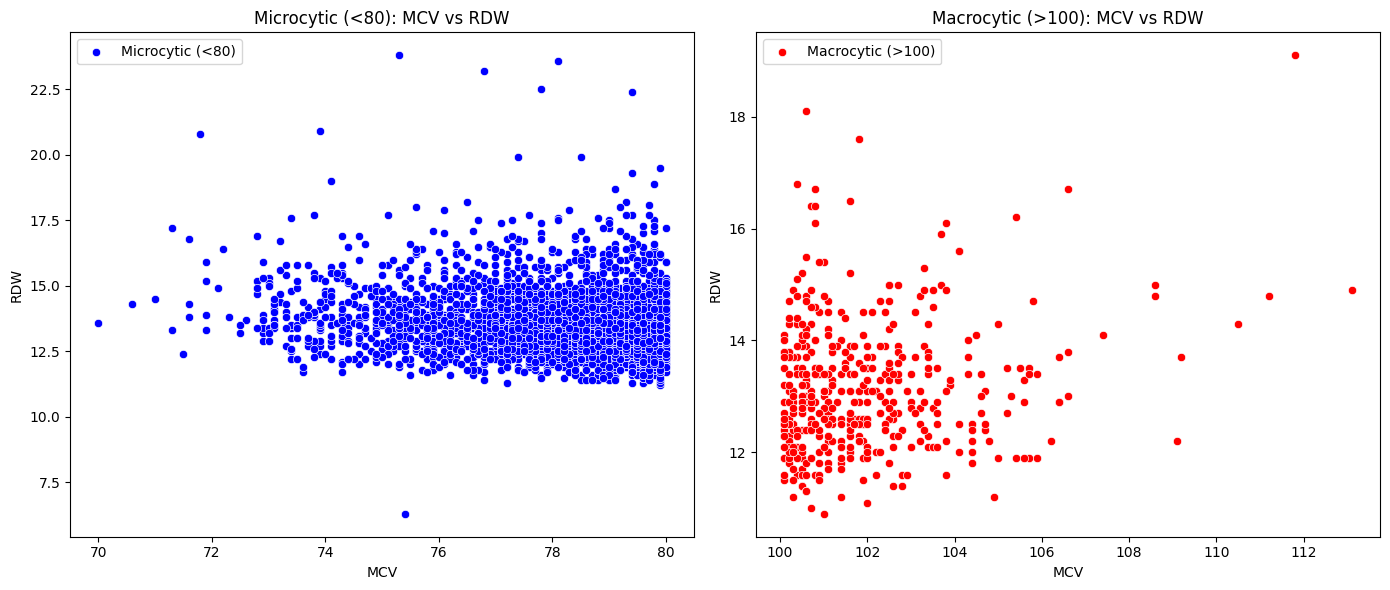

In [115]:
# إعداد الرسم
plt.figure(figsize=(14, 6))

# الرسم لـ microcytic_df
plt.subplot(1, 2, 1)
sns.scatterplot(data=microcytic_df, x='MCV', y='RDW', color='blue', label='Microcytic (<80)')
plt.title('Microcytic (<80): MCV vs RDW')
plt.xlabel('MCV')
plt.ylabel('RDW')

# الرسم لـ macrocytic_df
plt.subplot(1, 2, 2)
sns.scatterplot(data=macrocytic_df, x='MCV', y='RDW', color='red', label='Macrocytic (>100)')
plt.title('Macrocytic (>100): MCV vs RDW')
plt.xlabel('MCV')
plt.ylabel('RDW')

# عرض الرسم
plt.tight_layout()
plt.show()

In [141]:
# # لتغيير إعدادات العرض في pandas
# pd.set_option('display.max_rows', None)  # تعيين الحد الأقصى لعدد الصفوف للعرض إلى None لعرض جميع الصفوف
# pd.set_option('display.max_columns', None)  # تعيين الحد الأقصى لعدد الأعمدة للعرض إلى None لعرض جميع الأعمدة
# بعد الانتهاء من العرض، يمكنك إعادة تعيين الخيارات إلى القيم الافتراضية إذا أردت
pd.reset_option('display.max_rows')  # إعادة تعيين إلى القيمة الافتراضية
pd.reset_option('display.max_columns')  # 
# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Normal, HCT Normal
normal_case = results['HGB Normal, RBC Normal, HCT High'].copy()  # استخدام copy لتجنب التحذيرات
normal_case.describe()
# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 125], 
                                      labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# استخراج DataFrame لكل نوع
macrocytic_df = normal_case[normal_case['MCV_Category'] == 'Macrocytic (>100)']
microcytic_df = normal_case[normal_case['MCV_Category'] == 'Microcytic (<80)']

# عرض DataFrame الخاص بكل نوع
print("DataFrame for Macrocytic (>100):")
macrocytic_df
macrocytic_df.describe()
print("\nDataFrame for Microcytic (<80):")
microcytic_df
microcytic_df.describe()


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,6467.000000,6467.000000,6467.000000,6467.000000,6467.000000,6467.000000,6467.00000,6467.000000
mean,4.828050,15.386315,45.364327,94.022452,31.887784,33.919329,12.80385,241.224834
std,0.144823,0.508809,1.088853,3.363605,1.351840,0.799169,0.85641,60.590768
min,3.900000,13.900000,44.100000,88.100000,26.900000,30.000000,10.70000,54.000000
25%,4.750000,15.000000,44.500000,91.600000,31.000000,33.400000,12.20000,200.000000
50%,4.860000,15.400000,45.100000,93.600000,31.700000,33.900000,12.70000,237.000000
75%,4.940000,15.700000,45.900000,95.900000,32.700000,34.400000,13.30000,276.000000
max,5.000000,17.500000,51.700000,121.900000,42.800000,39.400000,22.50000,783.000000


DataFrame for Macrocytic (>100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
18419,4.67,16.2,48.4,103.7,34.8,33.5,12.4,226.0,Normal,Normal,High,Macrocytic (>100)
18861,4.81,16.6,49.5,103.0,34.5,33.5,13.1,231.0,Normal,Normal,High,Macrocytic (>100)
19039,4.47,15.1,45.5,101.7,34.0,33.3,14.0,313.0,Normal,Normal,High,Macrocytic (>100)
19309,4.89,17.0,51.4,105.3,34.8,33.1,12.9,255.0,Normal,Normal,High,Macrocytic (>100)
19566,4.38,14.8,44.4,101.3,33.7,33.3,12.3,251.0,Normal,Normal,High,Macrocytic (>100)
...,...,...,...,...,...,...,...,...,...,...,...,...
7427,4.38,15.0,44.8,102.3,34.2,33.5,18.5,233.0,Normal,Normal,High,Macrocytic (>100)
7680,4.70,16.7,48.2,102.6,35.7,34.8,13.9,177.0,Normal,Normal,High,Macrocytic (>100)
7869,4.45,15.9,46.0,103.2,35.8,34.7,12.7,171.0,Normal,Normal,High,Macrocytic (>100)
7918,4.63,15.5,46.6,100.8,33.5,33.3,14.3,233.0,Normal,Normal,High,Macrocytic (>100)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,4.532344,15.775625,46.524375,102.733750,34.833125,33.908750,13.118750,222.081250
std,0.211326,0.674409,1.771075,3.104298,1.425219,0.843555,1.191884,67.687783
min,3.900000,14.100000,44.100000,100.100000,31.500000,31.400000,11.000000,66.000000
25%,4.390000,15.300000,45.075000,100.700000,33.900000,33.400000,12.400000,180.000000
50%,4.520000,15.700000,46.100000,101.600000,34.700000,33.800000,13.000000,216.000000
75%,4.690000,16.200000,47.800000,103.425000,35.300000,34.400000,13.600000,257.000000
max,4.990000,17.500000,51.700000,121.900000,42.800000,39.400000,22.500000,573.000000



DataFrame for Microcytic (<80):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
results['HGB Normal, RBC Normal, HCT High']

,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
18174,4.73,15.1,44.1,93.3,32.1,34.4,12.2,228.0,Normal,Normal,High,Normocytic (80-100)
18176,5.00,15.4,46.2,92.3,30.9,33.5,13.7,167.0,Normal,Normal,High,Normocytic (80-100)
18194,4.81,15.8,44.7,93.1,32.8,35.3,13.8,232.0,Normal,Normal,High,Normocytic (80-100)
18221,4.63,15.4,44.5,96.3,33.2,34.5,12.9,202.0,Normal,Normal,High,Normocytic (80-100)
18244,4.97,15.4,45.1,90.8,31.0,34.1,11.7,225.0,Normal,Normal,High,Normocytic (80-100)
...,...,...,...,...,...,...,...,...,...,...,...,...
8676,4.88,14.5,45.3,92.8,29.7,32.0,13.8,210.0,Normal,Normal,High,Normocytic (80-100)
8678,4.99,15.7,45.6,91.3,31.4,34.4,12.7,283.0,Normal,Normal,High,Normocytic (80-100)
8683,4.88,15.0,44.4,90.9,30.8,33.9,14.3,141.0,Normal,Normal,High,Normocytic (80-100)
8690,4.68,14.4,44.2,94.5,30.7,32.5,17.4,236.0,Normal,Normal,High,Normocytic (80-100)


<Figure size 1400x600 with 0 Axes>

<Axes: >

<Axes: xlabel='MCV', ylabel='RDW'>

Text(0.5, 1.0, 'Macrocytic (>100): MCV vs RDW')

Text(0.5, 0, 'MCV')

Text(0, 0.5, 'RDW')

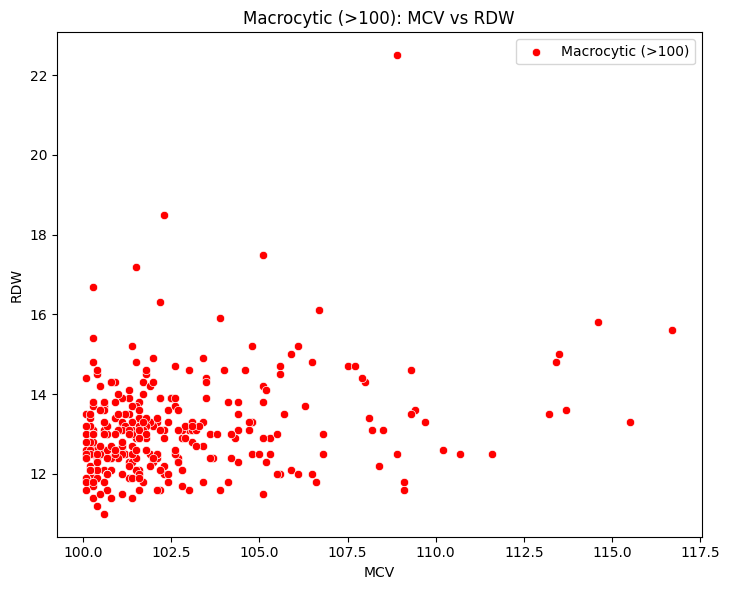

In [119]:
# إعداد الرسم
plt.figure(figsize=(14, 6))

# الرسم لـ macrocytic_df
plt.subplot(1, 2, 2)
sns.scatterplot(data=macrocytic_df, x='MCV', y='RDW', color='red', label='Macrocytic (>100)')
plt.title('Macrocytic (>100): MCV vs RDW')
plt.xlabel('MCV')
plt.ylabel('RDW')

# عرض الرسم
plt.tight_layout()
plt.show()

In [177]:
# # لتغيير إعدادات العرض في pandas
# pd.set_option('display.max_rows', None)  # تعيين الحد الأقصى لعدد الصفوف للعرض إلى None لعرض جميع الصفوف
# pd.set_option('display.max_columns', None)  # تعيين الحد الأقصى لعدد الأعمدة للعرض إلى None لعرض جميع الأعمدة
# بعد الانتهاء من العرض، يمكنك إعادة تعيين الخيارات إلى القيم الافتراضية إذا أردت
pd.reset_option('display.max_rows')  # إعادة تعيين إلى القيمة الافتراضية
pd.reset_option('display.max_columns')  # 
# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Normal, HCT Normal
normal_case = results['HGB Normal, RBC High, HCT Normal'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                      labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# استخراج DataFrame لكل نوع
macrocytic_df = normal_case[normal_case['MCV_Category'] == 'Macrocytic (>100)']
microcytic_df = normal_case[normal_case['MCV_Category'] == 'Microcytic (<80)']

# عرض DataFrame الخاص بكل نوع
print("DataFrame for Macrocytic (>100):")
macrocytic_df
macrocytic_df.describe()
print("\nDataFrame for Microcytic (<80):")
microcytic_df
microcytic_df.describe()


DataFrame for Macrocytic (>100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



DataFrame for Microcytic (<80):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
18257,5.65,12.2,38.8,68.4,21.5,31.5,15.1,251.0,Normal,High,Normal,Microcytic (<80)
18266,5.11,13.4,41.3,79.7,25.8,32.4,13.1,478.0,Normal,High,Normal,Microcytic (<80)
18470,5.46,14.3,43.0,78.8,26.1,33.2,13.0,285.0,Normal,High,Normal,Microcytic (<80)
18512,5.01,12.7,39.6,79.1,25.6,32.3,13.1,284.0,Normal,High,Normal,Microcytic (<80)
18558,5.01,12.9,37.8,75.4,25.7,34.0,12.6,348.0,Normal,High,Normal,Microcytic (<80)
...,...,...,...,...,...,...,...,...,...,...,...,...
8365,5.15,14.0,41.2,79.9,27.2,34.0,14.5,222.0,Normal,High,Normal,Microcytic (<80)
8450,5.64,15.0,43.3,76.7,26.5,34.6,12.9,211.0,Normal,High,Normal,Microcytic (<80)
8480,5.29,13.5,40.6,76.7,25.4,33.1,14.4,227.0,Normal,High,Normal,Microcytic (<80)
8581,5.24,13.6,40.5,77.3,25.9,33.5,14.5,297.0,Normal,High,Normal,Microcytic (<80)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000
mean,5.339084,13.273486,40.127216,75.318279,24.922120,33.069793,14.186411,297.230059
std,0.317764,0.695183,1.813114,3.978106,1.748141,1.053849,1.656448,84.174537
min,5.010000,12.000000,35.000000,56.300000,18.000000,29.200000,11.200000,12.000000
25%,5.110000,12.700000,38.800000,73.300000,24.000000,32.300000,13.100000,239.000000
50%,5.250000,13.300000,40.100000,76.250000,25.200000,33.100000,13.900000,288.000000
75%,5.470000,13.800000,41.400000,78.400000,26.200000,33.800000,14.900000,346.000000
max,7.150000,15.400000,44.000000,80.000000,28.600000,36.300000,37.800000,773.000000


In [163]:
# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Normal, HCT High
normal_case = results['HGB Low, RBC Low, HCT Normal'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 125], 
                                      labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# استخراج DataFrame للحالات التي يكون فيها MCV طبيعي (80-100) و RDW أكبر من 14.5
mcv_normal_rdw_high = normal_case[
    (normal_case['MCV_Category'] == 'Macrocytic (>100)') & 
    (normal_case['RDW'] > 14.5)
]

# عرض DataFrame
print("DataFrame for MCV Normal (80-100) and RDW > 14.5:")
mcv_normal_rdw_high


DataFrame for MCV Normal (80-100) and RDW > 14.5:


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
19227,3.41,11.9,34.3,100.6,34.9,34.7,15.0,286.0,Low,Low,Normal,Macrocytic (>100)
19716,3.32,11.9,34.8,104.6,35.7,34.1,19.6,304.0,Low,Low,Normal,Macrocytic (>100)
23762,3.36,11.4,34.5,102.6,33.7,32.9,17.0,340.0,Low,Low,Normal,Macrocytic (>100)
98020,3.13,11.7,35.2,112.8,37.4,33.2,17.4,222.0,Low,Low,Normal,Macrocytic (>100)
105844,3.35,11.4,34.5,102.8,33.8,32.8,17.3,207.0,Low,Low,Normal,Macrocytic (>100)
13408,3.39,11.5,35.0,103.4,34.0,32.9,17.5,1000.0,Low,Low,Normal,Macrocytic (>100)
27555,3.37,11.8,35.9,106.6,35.1,33.0,18.3,66.0,Low,Low,Normal,Macrocytic (>100)
79009,3.35,11.7,34.7,103.8,35.0,33.8,15.0,269.0,Low,Low,Normal,Macrocytic (>100)
83454,3.39,11.9,35.3,103.8,35.0,33.8,22.1,242.0,Low,Low,Normal,Macrocytic (>100)
86350,3.32,11.3,34.1,102.6,33.9,33.1,14.9,96.0,Low,Low,Normal,Macrocytic (>100)


<Figure size 1400x600 with 0 Axes>

<Axes: >

<Axes: xlabel='MCV', ylabel='RDW'>

Text(0.5, 1.0, 'Macrocytic (>100): MCV vs RDW')

Text(0.5, 0, 'MCV')

Text(0, 0.5, 'RDW')

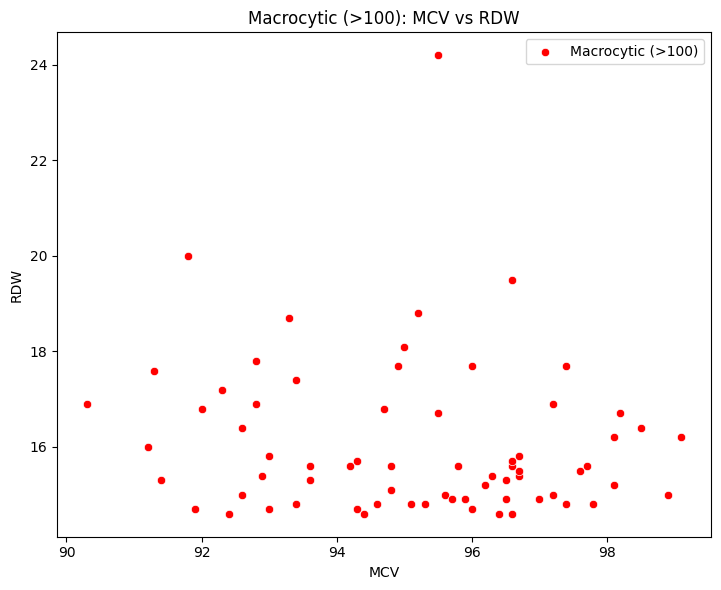

In [161]:
# إعداد الرسم
plt.figure(figsize=(14, 6))

# الرسم لـ macrocytic_df
plt.subplot(1, 2, 2)
sns.scatterplot(data=mcv_normal_rdw_high, x='MCV', y='RDW', color='red', label='Macrocytic (>100)')
plt.title('Macrocytic (>100): MCV vs RDW')
plt.xlabel('MCV')
plt.ylabel('RDW')

# عرض الرسم
plt.tight_layout()
plt.show()

In [47]:
# # لتغيير إعدادات العرض في pandas
# pd.set_option('display.max_rows', None)  # تعيين الحد الأقصى لعدد الصفوف للعرض إلى None لعرض جميع الصفوف
# pd.set_option('display.max_columns', None)  # تعيين الحد الأقصى لعدد الأعمدة للعرض إلى None لعرض جميع الأعمدة
# بعد الانتهاء من العرض، يمكنك إعادة تعيين الخيارات إلى القيم الافتراضية إذا أردت
pd.reset_option('display.max_rows')  # إعادة تعيين إلى القيمة الافتراضية
pd.reset_option('display.max_columns')  # 
# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Normal, HCT Normal
normal_case = results['HGB Normal, RBC Low, HCT Low'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                      labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# استخراج DataFrame لكل نوع
macrocytic_df = normal_case[normal_case['MCV_Category'] == 'Macrocytic (>100)']
microcytic_df = normal_case[normal_case['MCV_Category'] == 'Microcytic (<80)']
normocytic_df = normal_case[normal_case['MCV_Category'] == 'Normocytic (80-100)']
# عرض DataFrame الخاص بكل نوع
print("DataFrame for Macrocytic (>100):")
macrocytic_df
macrocytic_df.describe()
print("\nDataFrame for Microcytic (<80):")
microcytic_df
microcytic_df.describe()
print("\nDataFrame forNormocytic (80-100):")
normocytic_df
normocytic_df.describe()

DataFrame for Macrocytic (>100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
70863,3.01,14.0,31.1,103.2,46.4,44.9,13.3,178.0,Normal,Low,Low,Macrocytic (>100)
71829,1.67,12.5,17.9,107.1,74.5,69.6,13.1,260.0,Normal,Low,Low,Macrocytic (>100)
2547,3.26,13.2,32.7,100.2,40.6,40.5,15.2,220.0,Normal,Low,Low,Macrocytic (>100)
7922,2.96,12.2,33.5,113.3,41.1,36.3,18.2,383.0,Normal,Low,Low,Macrocytic (>100)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000
mean,2.725000,12.975000,28.800000,105.95000,50.650000,47.825000,14.950000,260.250000
std,0.715472,0.801561,7.334848,5.65597,16.115107,14.935277,2.364318,88.417099
min,1.670000,12.200000,17.900000,100.20000,40.600000,36.300000,13.100000,178.000000
25%,2.637500,12.425000,27.800000,102.45000,40.975000,39.450000,13.250000,209.500000
50%,2.985000,12.850000,31.900000,105.15000,43.750000,42.700000,14.250000,240.000000
75%,3.072500,13.400000,32.900000,108.65000,53.425000,51.075000,15.950000,290.750000
max,3.260000,14.000000,33.500000,113.30000,74.500000,69.600000,18.200000,383.000000



DataFrame for Microcytic (<80):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



DataFrame forNormocytic (80-100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
19991,3.43,12.3,33.8,98.2,35.8,36.4,12.3,280.0,Normal,Low,Low,Normocytic (80-100)
23893,3.40,12.0,33.6,98.9,35.2,35.6,12.5,216.0,Normal,Low,Low,Normocytic (80-100)
24890,3.35,12.4,32.9,98.6,37.2,37.7,13.5,236.0,Normal,Low,Low,Normocytic (80-100)
97321,3.63,12.0,33.3,91.8,32.9,35.8,12.2,246.0,Normal,Low,Low,Normocytic (80-100)
98890,3.51,12.1,33.9,96.5,34.2,35.5,11.4,308.0,Normal,Low,Low,Normocytic (80-100)
100397,2.86,12.3,27.8,96.9,42.8,44.2,11.8,333.0,Normal,Low,Low,Normocytic (80-100)
101537,3.32,12.5,32.4,97.5,37.5,38.6,13.7,398.0,Normal,Low,Low,Normocytic (80-100)
106995,3.46,13.3,32.7,94.4,38.3,40.5,12.9,305.0,Normal,Low,Low,Normocytic (80-100)
8857,3.76,12.1,33.5,89.2,32.1,35.9,12.3,335.0,Normal,Low,Low,Normocytic (80-100)
12613,3.56,12.1,33.7,94.6,33.9,35.8,12.3,277.0,Normal,Low,Low,Normocytic (80-100)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,3.564000,12.230000,33.26750,93.497500,34.340000,36.747500,12.730000,271.850000
std,0.167971,0.361762,1.04817,3.539701,2.288634,2.035075,0.748743,77.249363
min,2.860000,12.000000,27.80000,84.600000,31.600000,35.300000,11.400000,142.000000
25%,3.480000,12.000000,33.25000,91.675000,32.800000,35.700000,12.175000,220.500000
50%,3.605000,12.100000,33.60000,93.050000,33.900000,35.950000,12.550000,253.500000
75%,3.652500,12.300000,33.80000,96.425000,35.050000,37.100000,13.225000,318.750000
max,3.790000,13.500000,33.90000,98.900000,42.800000,44.200000,14.500000,488.000000


In [51]:
# # لتغيير إعدادات العرض في pandas
# pd.set_option('display.max_rows', None)  # تعيين الحد الأقصى لعدد الصفوف للعرض إلى None لعرض جميع الصفوف
# pd.set_option('display.max_columns', None)  # تعيين الحد الأقصى لعدد الأعمدة للعرض إلى None لعرض جميع الأعمدة
# بعد الانتهاء من العرض، يمكنك إعادة تعيين الخيارات إلى القيم الافتراضية إذا أردت
pd.reset_option('display.max_rows')  # إعادة تعيين إلى القيمة الافتراضية
pd.reset_option('display.max_columns')  # 
# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Normal, HCT Normal
normal_case = results['HGB Low, RBC High, HCT Normal'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                      labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# استخراج DataFrame لكل نوع
macrocytic_df = normal_case[normal_case['MCV_Category'] == 'Macrocytic (>100)']
microcytic_df = normal_case[normal_case['MCV_Category'] == 'Microcytic (<80)']
normocytic_df = normal_case[normal_case['MCV_Category'] == 'Normocytic (80-100)']
# عرض DataFrame الخاص بكل نوع
print("DataFrame for Macrocytic (>100):")
macrocytic_df
macrocytic_df.describe()
print("\nDataFrame for Microcytic (<80):")
microcytic_df
microcytic_df.describe()
print("\nDataFrame forNormocytic (80-100):")
normocytic_df
normocytic_df.describe()

DataFrame for Macrocytic (>100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



DataFrame for Microcytic (<80):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
18223,5.31,11.9,36.3,68.5,22.4,32.8,13.0,397.0,Low,High,Normal,Microcytic (<80)
18682,5.60,11.8,37.2,66.4,21.0,31.6,14.7,351.0,Low,High,Normal,Microcytic (<80)
19706,5.23,11.7,36.8,70.3,22.4,31.9,15.1,206.0,Low,High,Normal,Microcytic (<80)
19970,5.16,11.6,35.8,69.4,22.5,32.3,13.1,369.0,Low,High,Normal,Microcytic (<80)
19995,5.47,11.3,35.2,64.3,20.6,32.1,12.6,443.0,Low,High,Normal,Microcytic (<80)
...,...,...,...,...,...,...,...,...,...,...,...,...
7901,5.60,11.9,37.8,67.6,21.4,31.6,16.8,303.0,Low,High,Normal,Microcytic (<80)
8045,5.11,11.9,37.2,72.8,23.4,32.0,14.2,303.0,Low,High,Normal,Microcytic (<80)
8218,5.03,11.8,35.8,71.2,23.4,32.8,14.6,354.0,Low,High,Normal,Microcytic (<80)
8489,5.15,11.7,37.8,73.6,22.7,30.9,19.7,346.0,Low,High,Normal,Microcytic (<80)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,5.355067,11.465919,35.991031,67.397982,21.473094,31.852691,15.743722,315.109865
std,0.302812,0.333123,1.108764,3.742014,1.310680,0.798498,2.066282,90.285858
min,5.010000,9.900000,34.000000,56.800000,17.000000,28.900000,12.100000,109.000000
25%,5.110000,11.200000,35.200000,64.900000,20.600000,31.300000,14.425000,256.250000
50%,5.275000,11.500000,36.000000,67.900000,21.700000,31.800000,15.400000,304.000000
75%,5.517500,11.800000,36.800000,70.100000,22.400000,32.300000,16.500000,362.000000
max,6.600000,11.900000,39.000000,75.600000,24.000000,34.600000,31.600000,816.000000



DataFrame forNormocytic (80-100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# # لتغيير إعدادات العرض في pandas
# pd.set_option('display.max_rows', None)  # تعيين الحد الأقصى لعدد الصفوف للعرض إلى None لعرض جميع الصفوف
# pd.set_option('display.max_columns', None)  # تعيين الحد الأقصى لعدد الأعمدة للعرض إلى None لعرض جميع الأعمدة
# بعد الانتهاء من العرض، يمكنك إعادة تعيين الخيارات إلى القيم الافتراضية إذا أردت
pd.reset_option('display.max_rows')  # إعادة تعيين إلى القيمة الافتراضية
pd.reset_option('display.max_columns')  # 
# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Normal, HCT Normal
normal_case = results['HGB Normal, RBC Normal, HCT Normal'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                      labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# استخراج DataFrame لكل نوع
macrocytic_df = normal_case[normal_case['MCV_Category'] == 'Macrocytic (>100)']
microcytic_df = normal_case[normal_case['MCV_Category'] == 'Microcytic (<80)']
normocytic_df = normal_case[normal_case['MCV_Category'] == 'Normocytic (80-100)']
# عرض DataFrame الخاص بكل نوع
print("DataFrame for Macrocytic (>100):")
macrocytic_df
macrocytic_df.describe()
print("\nDataFrame for Microcytic (<80):")
microcytic_df
microcytic_df.describe()
print("\nDataFrame forNormocytic (80-100):")
normocytic_df
normocytic_df.describe()

DataFrame for Macrocytic (>100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
18497,3.82,13.4,38.8,101.6,35.2,34.5,16.5,249.0,Normal,Normal,Normal,Macrocytic (>100)
18704,4.03,13.9,41.0,101.9,34.5,33.9,12.6,243.0,Normal,Normal,Normal,Macrocytic (>100)
18762,4.10,14.3,42.5,103.6,34.7,33.5,13.5,263.0,Normal,Normal,Normal,Macrocytic (>100)
18795,4.07,14.1,41.6,102.1,34.9,34.2,13.7,155.0,Normal,Normal,Normal,Macrocytic (>100)
19051,4.15,14.4,41.6,100.2,34.5,34.5,12.3,243.0,Normal,Normal,Normal,Macrocytic (>100)
...,...,...,...,...,...,...,...,...,...,...,...,...
7254,4.16,14.8,42.3,101.6,35.5,34.9,13.1,211.0,Normal,Normal,Normal,Macrocytic (>100)
7488,3.98,13.8,41.2,103.5,34.8,33.7,14.9,309.0,Normal,Normal,Normal,Macrocytic (>100)
7492,4.07,13.7,40.7,100.1,33.7,33.6,13.7,177.0,Normal,Normal,Normal,Macrocytic (>100)
8068,4.02,14.2,40.5,100.7,35.4,35.1,13.0,232.0,Normal,Normal,Normal,Macrocytic (>100)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,4.058742,14.107506,41.363797,101.941943,34.753863,34.099338,13.127152,222.911700
std,0.153644,0.606627,1.497392,1.903236,1.076052,0.795799,1.139589,71.375804
min,3.800000,12.400000,38.100000,100.100000,32.200000,31.700000,10.900000,22.000000
25%,3.930000,13.700000,40.200000,100.600000,34.000000,33.600000,12.400000,177.000000
50%,4.050000,14.100000,41.300000,101.400000,34.700000,34.100000,12.900000,219.000000
75%,4.180000,14.600000,42.600000,102.600000,35.400000,34.700000,13.700000,263.000000
max,4.390000,15.600000,44.000000,113.100000,39.200000,36.700000,19.100000,553.000000



DataFrame for Microcytic (<80):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
18183,4.84,12.4,36.1,74.7,25.6,34.2,14.2,434.0,Normal,Normal,Normal,Microcytic (<80)
18202,4.55,12.2,35.9,79.0,26.7,33.8,12.5,431.0,Normal,Normal,Normal,Microcytic (<80)
18213,4.81,12.2,36.3,75.5,25.3,33.6,14.4,316.0,Normal,Normal,Normal,Microcytic (<80)
18285,4.64,12.1,37.0,79.7,26.1,32.7,13.9,423.0,Normal,Normal,Normal,Microcytic (<80)
18288,4.69,12.6,37.3,79.4,26.9,34.0,13.1,428.0,Normal,Normal,Normal,Microcytic (<80)
...,...,...,...,...,...,...,...,...,...,...,...,...
8616,4.62,12.3,35.8,77.5,26.5,34.2,13.7,211.0,Normal,Normal,Normal,Microcytic (<80)
8629,4.67,13.6,37.3,79.9,29.1,36.4,13.0,352.0,Normal,Normal,Normal,Microcytic (<80)
8695,4.99,13.4,39.8,79.9,26.8,33.6,13.8,158.0,Normal,Normal,Normal,Microcytic (<80)
8699,4.80,12.6,37.5,78.3,26.2,33.5,13.4,197.0,Normal,Normal,Normal,Microcytic (<80)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000
mean,4.749629,12.587946,37.065308,78.053311,26.504895,33.957329,13.521477,323.117431
std,0.165434,0.431011,1.281708,1.688746,0.935479,0.936903,1.208803,83.001861
min,4.280000,12.000000,34.000000,70.000000,23.900000,30.800000,6.300000,46.000000
25%,4.630000,12.200000,36.200000,77.200000,25.900000,33.300000,12.700000,266.000000
50%,4.770000,12.500000,37.100000,78.500000,26.500000,34.000000,13.300000,314.000000
75%,4.890000,12.900000,38.000000,79.400000,27.200000,34.600000,14.100000,368.000000
max,5.000000,14.400000,40.400000,80.000000,29.500000,37.000000,23.800000,1021.000000



DataFrame forNormocytic (80-100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
18168,4.73,14.1,41.8,88.5,29.7,33.6,13.7,214.0,Normal,Normal,Normal,Normocytic (80-100)
18169,4.52,13.7,39.3,86.9,30.3,34.8,11.7,270.0,Normal,Normal,Normal,Normocytic (80-100)
18172,4.22,13.1,38.7,91.7,30.9,33.7,12.8,453.0,Normal,Normal,Normal,Normocytic (80-100)
18173,4.60,13.4,40.2,87.4,29.1,33.3,14.3,244.0,Normal,Normal,Normal,Normocytic (80-100)
18175,4.44,13.5,39.2,88.5,30.3,34.3,12.5,311.0,Normal,Normal,Normal,Normocytic (80-100)
...,...,...,...,...,...,...,...,...,...,...,...,...
8717,4.78,14.5,42.8,89.6,30.4,33.9,14.7,253.0,Normal,Normal,Normal,Normocytic (80-100)
8718,4.67,14.4,41.0,87.8,30.8,35.0,13.1,240.0,Normal,Normal,Normal,Normocytic (80-100)
8721,4.34,13.6,39.4,90.7,31.2,34.4,13.8,353.0,Normal,Normal,Normal,Normocytic (80-100)
8725,4.94,14.7,43.9,88.7,29.6,33.4,13.4,230.0,Normal,Normal,Normal,Normocytic (80-100)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,53047.000000,53047.000000,53047.000000,53047.000000,53047.000000,53047.000000,53047.000000,53047.000000
mean,4.494275,13.511884,39.701208,88.457549,30.096739,34.025460,12.923998,270.909607
std,0.269007,0.799749,2.277997,4.295826,1.642860,0.847882,0.983578,70.741582
min,3.800000,12.000000,34.000000,80.100000,24.900000,29.600000,9.700000,4.000000
25%,4.310000,12.900000,38.000000,85.200000,28.900000,33.500000,12.300000,222.000000
50%,4.510000,13.500000,39.700000,88.400000,30.000000,34.000000,12.800000,264.000000
75%,4.700000,14.100000,41.500000,91.500000,31.200000,34.600000,13.400000,312.000000
max,5.000000,17.000000,44.000000,100.000000,46.100000,43.800000,28.400000,999.900000


In [24]:
# # لتغيير إعدادات العرض في pandas
# pd.set_option('display.max_rows', None)  # تعيين الحد الأقصى لعدد الصفوف للعرض إلى None لعرض جميع الصفوف
# pd.set_option('display.max_columns', None)  # تعيين الحد الأقصى لعدد الأعمدة للعرض إلى None لعرض جميع الأعمدة
# بعد الانتهاء من العرض، يمكنك إعادة تعيين الخيارات إلى القيم الافتراضية إذا أردت
pd.reset_option('display.max_rows')  # إعادة تعيين إلى القيمة الافتراضية
pd.reset_option('display.max_columns')  # 
# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Normal, HCT Normal
normal_case = results['HGB Normal, RBC Normal, HCT Low'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                      labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# استخراج DataFrame لكل نوع
macrocytic_df = normal_case[normal_case['MCV_Category'] == 'Macrocytic (>100)']
microcytic_df = normal_case[normal_case['MCV_Category'] == 'Microcytic (<80)']
normocytic_df = normal_case[normal_case['MCV_Category'] == 'Normocytic (80-100)']
# عرض DataFrame الخاص بكل نوع
print("DataFrame for Macrocytic (>100):")
macrocytic_df
macrocytic_df.describe()
print("\nDataFrame for Microcytic (<80):")
microcytic_df
microcytic_df.describe()
print("\nDataFrame forNormocytic (80-100):")
normocytic_df
normocytic_df.describe()

DataFrame for Macrocytic (>100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
90037,4.0,13.9,33.3,100.4,56.2,43.3,20.1,247.0,Normal,Normal,Low,Macrocytic (>100)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,4.0,13.9,33.3,100.4,56.2,43.3,20.1,247.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.0,13.9,33.3,100.4,56.2,43.3,20.1,247.0
25%,4.0,13.9,33.3,100.4,56.2,43.3,20.1,247.0
50%,4.0,13.9,33.3,100.4,56.2,43.3,20.1,247.0
75%,4.0,13.9,33.3,100.4,56.2,43.3,20.1,247.0
max,4.0,13.9,33.3,100.4,56.2,43.3,20.1,247.0



DataFrame for Microcytic (<80):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
20251,4.21,12.0,33.3,79.3,28.4,35.8,13.4,245.0,Normal,Normal,Low,Microcytic (<80)
24273,4.24,12.1,33.8,79.9,28.6,35.7,12.2,449.0,Normal,Normal,Low,Microcytic (<80)
29376,4.76,12.6,32.3,74.3,30.6,39.2,12.6,211.0,Normal,Normal,Low,Microcytic (<80)
31723,4.49,12.0,33.6,74.8,26.8,35.8,13.7,371.0,Normal,Normal,Low,Microcytic (<80)
32008,4.18,12.2,33.1,79.3,29.1,36.7,12.4,289.0,Normal,Normal,Low,Microcytic (<80)
32793,4.26,12.0,33.1,77.7,28.0,36.1,14.3,289.0,Normal,Normal,Low,Microcytic (<80)
34356,4.34,12.1,33.6,77.5,27.9,35.9,12.0,431.0,Normal,Normal,Low,Microcytic (<80)
36228,4.48,12.1,33.9,75.7,26.8,35.5,13.1,340.0,Normal,Normal,Low,Microcytic (<80)
86864,4.31,12.3,33.7,78.0,28.5,36.5,13.4,332.0,Normal,Normal,Low,Microcytic (<80)
89984,4.53,12.4,33.8,74.2,27.3,36.8,14.3,382.0,Normal,Normal,Low,Microcytic (<80)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,4.358333,12.162500,33.487500,77.254167,28.095833,36.275000,13.387500,316.958333
std,0.182891,0.166322,0.411056,2.985760,1.186328,0.784219,0.910476,81.363638
min,4.180000,12.000000,32.300000,67.000000,24.500000,35.500000,12.000000,205.000000
25%,4.240000,12.000000,33.200000,76.600000,27.700000,35.800000,12.675000,244.750000
50%,4.310000,12.100000,33.650000,77.850000,28.350000,36.150000,13.250000,305.500000
75%,4.412500,12.300000,33.800000,79.300000,28.600000,36.525000,14.100000,373.750000
max,4.900000,12.600000,33.900000,79.900000,30.600000,39.200000,15.100000,482.000000



DataFrame forNormocytic (80-100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
21426,3.98,12.2,33.7,84.7,30.5,36.0,12.0,268.0,Normal,Normal,Low,Normocytic (80-100)
21719,4.07,12.1,33.6,82.4,29.6,36.0,12.0,292.0,Normal,Normal,Low,Normocytic (80-100)
24516,4.03,12.1,33.5,83.1,30.0,36.2,12.6,385.0,Normal,Normal,Low,Normocytic (80-100)
25426,4.15,12.0,33.9,81.7,28.8,35.3,12.4,285.0,Normal,Normal,Low,Normocytic (80-100)
103511,3.91,12.0,33.9,86.9,30.6,35.2,12.2,295.0,Normal,Normal,Low,Normocytic (80-100)
...,...,...,...,...,...,...,...,...,...,...,...,...
63209,3.93,12.0,33.5,85.1,30.5,35.8,12.9,264.0,Normal,Normal,Low,Normocytic (80-100)
43285,4.14,12.0,33.6,81.3,29.0,35.7,12.3,282.0,Normal,Normal,Low,Normocytic (80-100)
46595,3.94,12.0,33.8,85.8,30.5,35.6,13.1,271.0,Normal,Normal,Low,Normocytic (80-100)
49269,3.92,12.1,33.8,86.0,30.9,35.8,12.9,307.0,Normal,Normal,Low,Normocytic (80-100)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000
mean,3.992500,12.139062,33.578125,84.187500,30.353125,36.068750,12.601562,293.84375
std,0.101778,0.152874,0.318961,2.271319,0.835135,0.583877,0.775517,64.44666
min,3.820000,12.000000,32.500000,80.100000,28.600000,35.000000,11.600000,150.00000
25%,3.917500,12.000000,33.500000,82.400000,29.800000,35.700000,12.175000,263.25000
50%,3.980000,12.100000,33.700000,84.500000,30.450000,36.000000,12.500000,295.50000
75%,4.072500,12.200000,33.800000,85.725000,31.000000,36.325000,12.900000,326.25000
max,4.200000,12.500000,33.900000,91.800000,32.200000,38.000000,16.500000,588.00000


In [59]:
# # لتغيير إعدادات العرض في pandas
# pd.set_option('display.max_rows', None)  # تعيين الحد الأقصى لعدد الصفوف للعرض إلى None لعرض جميع الصفوف
# pd.set_option('display.max_columns', None)  # تعيين الحد الأقصى لعدد الأعمدة للعرض إلى None لعرض جميع الأعمدة
# بعد الانتهاء من العرض، يمكنك إعادة تعيين الخيارات إلى القيم الافتراضية إذا أردت
pd.reset_option('display.max_rows')  # إعادة تعيين إلى القيمة الافتراضية
pd.reset_option('display.max_columns')  # 
# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Normal, HCT Normal
normal_case = results['HGB Normal, RBC Normal, HCT High'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 105, 120], 
                                      labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# استخراج DataFrame لكل نوع
macrocytic_df = normal_case[normal_case['MCV_Category'] == 'Macrocytic (>100)']
microcytic_df = normal_case[normal_case['MCV_Category'] == 'Microcytic (<80)']
normocytic_df = normal_case[normal_case['MCV_Category'] == 'Normocytic (80-100)']
# عرض DataFrame الخاص بكل نوع
print("DataFrame for Macrocytic (>100):")
macrocytic_df
macrocytic_df.describe()
print("\nDataFrame for Microcytic (<80):")
microcytic_df
microcytic_df.describe()
print("\nDataFrame forNormocytic (80-100):")
normocytic_df
normocytic_df.describe()

DataFrame for Macrocytic (>100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
19309,4.89,17.0,51.4,105.3,34.8,33.1,12.9,255.0,Normal,Normal,High,Macrocytic (>100)
21406,3.91,15.0,44.8,114.6,38.3,33.5,15.8,73.0,Normal,Normal,High,Macrocytic (>100)
23141,4.06,16.0,46.5,113.7,39.6,34.5,13.6,274.0,Normal,Normal,High,Macrocytic (>100)
24353,4.80,16.3,50.6,105.6,34.1,32.3,12.0,301.0,Normal,Normal,High,Macrocytic (>100)
25609,4.49,15.8,48.3,106.8,35.1,32.8,13.0,198.0,Normal,Normal,High,Macrocytic (>100)
26578,4.32,15.6,45.3,105.1,36.1,34.3,17.5,175.0,Normal,Normal,High,Macrocytic (>100)
97033,4.74,16.3,49.8,105.1,34.5,32.8,11.5,270.0,Normal,Normal,High,Macrocytic (>100)
98652,4.20,15.6,45.6,108.4,37.3,34.3,12.2,217.0,Normal,Normal,High,Macrocytic (>100)
99463,4.05,15.7,45.2,111.6,38.8,34.8,12.5,359.0,Normal,Normal,High,Macrocytic (>100)
100909,4.20,15.4,45.7,108.5,36.7,33.9,13.1,214.0,Normal,Normal,High,Macrocytic (>100)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,4.310962,15.826923,46.578846,108.101923,36.748077,33.996154,13.694231,227.134615
std,0.233005,0.731669,1.946171,3.033828,1.560856,1.087354,1.805049,63.594003
min,3.900000,14.100000,44.100000,105.100000,33.800000,31.900000,11.500000,73.000000
25%,4.175000,15.400000,45.200000,105.600000,35.700000,33.475000,12.500000,188.000000
50%,4.250000,15.700000,46.100000,107.150000,36.750000,34.000000,13.450000,218.000000
75%,4.390000,16.200000,47.750000,109.300000,37.700000,34.500000,14.625000,261.250000
max,4.910000,17.500000,51.600000,116.700000,42.000000,39.400000,22.500000,376.000000



DataFrame for Microcytic (<80):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



DataFrame forNormocytic (80-100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
18174,4.73,15.1,44.1,93.3,32.1,34.4,12.2,228.0,Normal,Normal,High,Normocytic (80-100)
18176,5.00,15.4,46.2,92.3,30.9,33.5,13.7,167.0,Normal,Normal,High,Normocytic (80-100)
18194,4.81,15.8,44.7,93.1,32.8,35.3,13.8,232.0,Normal,Normal,High,Normocytic (80-100)
18221,4.63,15.4,44.5,96.3,33.2,34.5,12.9,202.0,Normal,Normal,High,Normocytic (80-100)
18244,4.97,15.4,45.1,90.8,31.0,34.1,11.7,225.0,Normal,Normal,High,Normocytic (80-100)
...,...,...,...,...,...,...,...,...,...,...,...,...
8676,4.88,14.5,45.3,92.8,29.7,32.0,13.8,210.0,Normal,Normal,High,Normocytic (80-100)
8678,4.99,15.7,45.6,91.3,31.4,34.4,12.7,283.0,Normal,Normal,High,Normocytic (80-100)
8683,4.88,15.0,44.4,90.9,30.8,33.9,14.3,141.0,Normal,Normal,High,Normocytic (80-100)
8690,4.68,14.4,44.2,94.5,30.7,32.5,17.4,236.0,Normal,Normal,High,Normocytic (80-100)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000
mean,4.832387,15.382538,45.354132,93.903960,31.846679,33.918506,12.796586,241.338478
std,0.135625,0.504887,1.073515,3.097023,1.269409,0.796393,0.840889,60.562324
min,4.250000,13.900000,44.100000,88.100000,26.900000,30.000000,10.700000,54.000000
25%,4.760000,15.000000,44.500000,91.600000,31.000000,33.400000,12.200000,200.000000
50%,4.860000,15.400000,45.100000,93.500000,31.700000,33.900000,12.700000,237.000000
75%,4.940000,15.700000,45.900000,95.800000,32.700000,34.400000,13.300000,276.000000
max,5.000000,17.500000,51.700000,105.000000,37.300000,37.800000,18.500000,783.000000


In [61]:
# # لتغيير إعدادات العرض في pandas
# pd.set_option('display.max_rows', None)  # تعيين الحد الأقصى لعدد الصفوف للعرض إلى None لعرض جميع الصفوف
# pd.set_option('display.max_columns', None)  # تعيين الحد الأقصى لعدد الأعمدة للعرض إلى None لعرض جميع الأعمدة
# بعد الانتهاء من العرض، يمكنك إعادة تعيين الخيارات إلى القيم الافتراضية إذا أردت
pd.reset_option('display.max_rows')  # إعادة تعيين إلى القيمة الافتراضية
pd.reset_option('display.max_columns')  # 
# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Normal, HCT Normal
normal_case = results['HGB Normal, RBC Low, HCT Normal'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                      labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# استخراج DataFrame لكل نوع
macrocytic_df = normal_case[normal_case['MCV_Category'] == 'Macrocytic (>100)']
microcytic_df = normal_case[normal_case['MCV_Category'] == 'Microcytic (<80)']
normocytic_df = normal_case[normal_case['MCV_Category'] == 'Normocytic (80-100)']
# عرض DataFrame الخاص بكل نوع
print("DataFrame for Macrocytic (>100):")
macrocytic_df
macrocytic_df.describe()
print("\nDataFrame for Microcytic (<80):")
microcytic_df
microcytic_df.describe()
print("\nDataFrame forNormocytic (80-100):")
normocytic_df
normocytic_df.describe()

DataFrame for Macrocytic (>100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
19729,3.76,13.9,40.6,108.1,37.0,34.2,14.1,240.0,Normal,Low,Normal,Macrocytic (>100)
20150,3.53,12.7,36.7,104.0,36.0,34.6,12.6,266.0,Normal,Low,Normal,Macrocytic (>100)
20194,3.59,12.7,36.7,102.1,35.3,34.5,12.5,232.0,Normal,Low,Normal,Macrocytic (>100)
20371,3.63,12.3,36.9,101.6,33.8,33.3,15.5,346.0,Normal,Low,Normal,Macrocytic (>100)
20461,3.67,13.0,38.4,104.7,35.5,33.9,14.0,98.0,Normal,Low,Normal,Macrocytic (>100)
...,...,...,...,...,...,...,...,...,...,...,...,...
5793,3.54,14.5,41.0,115.8,41.1,35.5,14.7,425.0,Normal,Low,Normal,Macrocytic (>100)
7083,3.50,12.3,36.4,104.1,35.2,33.9,14.3,202.0,Normal,Low,Normal,Macrocytic (>100)
7171,3.65,12.9,37.7,103.4,35.3,34.1,14.1,191.0,Normal,Low,Normal,Macrocytic (>100)
7489,3.78,13.5,38.4,101.3,35.6,35.1,12.5,274.0,Normal,Low,Normal,Macrocytic (>100)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.588866,12.835714,37.455462,104.462185,35.779832,34.259664,13.584454,218.903361
std,0.149539,0.605901,1.508720,4.048607,1.726149,1.028523,1.716822,81.096254
min,3.030000,12.000000,34.300000,100.100000,32.500000,31.700000,11.200000,38.000000
25%,3.490000,12.400000,36.400000,101.600000,34.725000,33.600000,12.500000,166.500000
50%,3.610000,12.700000,37.400000,103.150000,35.300000,34.200000,13.150000,212.500000
75%,3.710000,13.100000,38.300000,105.900000,36.600000,34.800000,14.200000,265.250000
max,3.790000,14.900000,42.800000,119.200000,41.600000,39.500000,26.100000,542.000000



DataFrame for Microcytic (<80):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



DataFrame forNormocytic (80-100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
18289,3.52,12.1,34.7,98.5,34.1,34.7,11.5,274.0,Normal,Low,Normal,Normocytic (80-100)
18516,3.63,12.5,36.0,99.1,34.5,34.8,12.0,312.0,Normal,Low,Normal,Normocytic (80-100)
18745,3.59,12.1,34.6,96.2,33.7,35.0,12.1,192.0,Normal,Low,Normal,Normocytic (80-100)
18847,3.76,12.4,36.1,95.7,32.7,34.2,12.1,181.0,Normal,Low,Normal,Normocytic (80-100)
18867,3.70,12.2,35.4,95.7,32.9,34.4,12.3,217.0,Normal,Low,Normal,Normocytic (80-100)
...,...,...,...,...,...,...,...,...,...,...,...,...
8393,3.73,12.4,34.8,93.2,33.0,35.5,14.4,171.0,Normal,Low,Normal,Normocytic (80-100)
8443,3.78,12.2,35.7,94.6,32.1,34.0,14.6,190.0,Normal,Low,Normal,Normocytic (80-100)
8567,3.79,12.4,37.1,98.0,32.6,33.3,14.7,195.0,Normal,Low,Normal,Normocytic (80-100)
8658,3.79,12.4,37.2,98.1,32.8,33.4,15.9,218.0,Normal,Low,Normal,Normocytic (80-100)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,3.709600,12.352000,35.691810,96.209524,33.269143,34.589143,12.958095,238.727619
std,0.065011,0.300859,0.896617,2.268382,0.909891,0.832049,1.239673,71.035741
min,3.460000,12.000000,34.000000,90.500000,31.500000,32.000000,11.000000,18.000000
25%,3.670000,12.100000,35.000000,94.600000,32.600000,34.100000,12.200000,192.000000
50%,3.720000,12.300000,35.700000,96.300000,33.200000,34.600000,12.700000,227.000000
75%,3.760000,12.500000,36.300000,98.100000,33.800000,35.000000,13.400000,281.000000
max,3.790000,15.000000,37.800000,100.000000,39.900000,40.300000,21.100000,638.000000


In [63]:
# # لتغيير إعدادات العرض في pandas
# pd.set_option('display.max_rows', None)  # تعيين الحد الأقصى لعدد الصفوف للعرض إلى None لعرض جميع الصفوف
# pd.set_option('display.max_columns', None)  # تعيين الحد الأقصى لعدد الأعمدة للعرض إلى None لعرض جميع الأعمدة
# بعد الانتهاء من العرض، يمكنك إعادة تعيين الخيارات إلى القيم الافتراضية إذا أردت
pd.reset_option('display.max_rows')  # إعادة تعيين إلى القيمة الافتراضية
pd.reset_option('display.max_columns')  # 
# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Normal, HCT Normal
normal_case = results['HGB Normal, RBC High, HCT Normal'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                      labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# استخراج DataFrame لكل نوع
macrocytic_df = normal_case[normal_case['MCV_Category'] == 'Macrocytic (>100)']
microcytic_df = normal_case[normal_case['MCV_Category'] == 'Microcytic (<80)']
normocytic_df = normal_case[normal_case['MCV_Category'] == 'Normocytic (80-100)']
# عرض DataFrame الخاص بكل نوع
print("DataFrame for Macrocytic (>100):")
macrocytic_df
macrocytic_df.describe()
print("\nDataFrame for Microcytic (<80):")
microcytic_df
microcytic_df.describe()
print("\nDataFrame forNormocytic (80-100):")
normocytic_df
normocytic_df.describe()

DataFrame for Macrocytic (>100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



DataFrame for Microcytic (<80):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
18257,5.65,12.2,38.8,68.4,21.5,31.5,15.1,251.0,Normal,High,Normal,Microcytic (<80)
18266,5.11,13.4,41.3,79.7,25.8,32.4,13.1,478.0,Normal,High,Normal,Microcytic (<80)
18470,5.46,14.3,43.0,78.8,26.1,33.2,13.0,285.0,Normal,High,Normal,Microcytic (<80)
18512,5.01,12.7,39.6,79.1,25.6,32.3,13.1,284.0,Normal,High,Normal,Microcytic (<80)
18558,5.01,12.9,37.8,75.4,25.7,34.0,12.6,348.0,Normal,High,Normal,Microcytic (<80)
...,...,...,...,...,...,...,...,...,...,...,...,...
8365,5.15,14.0,41.2,79.9,27.2,34.0,14.5,222.0,Normal,High,Normal,Microcytic (<80)
8450,5.64,15.0,43.3,76.7,26.5,34.6,12.9,211.0,Normal,High,Normal,Microcytic (<80)
8480,5.29,13.5,40.6,76.7,25.4,33.1,14.4,227.0,Normal,High,Normal,Microcytic (<80)
8581,5.24,13.6,40.5,77.3,25.9,33.5,14.5,297.0,Normal,High,Normal,Microcytic (<80)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000
mean,5.339084,13.273486,40.127216,75.318279,24.922120,33.069793,14.186411,297.230059
std,0.317764,0.695183,1.813114,3.978106,1.748141,1.053849,1.656448,84.174537
min,5.010000,12.000000,35.000000,56.300000,18.000000,29.200000,11.200000,12.000000
25%,5.110000,12.700000,38.800000,73.300000,24.000000,32.300000,13.100000,239.000000
50%,5.250000,13.300000,40.100000,76.250000,25.200000,33.100000,13.900000,288.000000
75%,5.470000,13.800000,41.400000,78.400000,26.200000,33.800000,14.900000,346.000000
max,7.150000,15.400000,44.000000,80.000000,28.600000,36.300000,37.800000,773.000000



DataFrame forNormocytic (80-100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
18171,5.13,14.5,43.6,84.9,28.3,33.3,13.1,209.0,Normal,High,Normal,Normocytic (80-100)
18188,5.02,13.7,40.7,81.1,27.3,33.7,13.1,306.0,Normal,High,Normal,Normocytic (80-100)
18228,5.19,14.2,42.4,81.4,27.3,33.5,13.6,304.0,Normal,High,Normal,Normocytic (80-100)
18343,5.07,14.0,41.3,81.4,27.6,33.9,13.3,260.0,Normal,High,Normal,Normocytic (80-100)
18380,5.35,14.5,43.7,81.6,27.1,33.2,12.8,352.0,Normal,High,Normal,Normocytic (80-100)
...,...,...,...,...,...,...,...,...,...,...,...,...
8625,5.09,14.6,42.6,83.8,28.6,34.2,13.8,234.0,Normal,High,Normal,Normocytic (80-100)
8637,5.04,14.6,43.0,85.2,29.0,34.1,13.2,298.0,Normal,High,Normal,Normocytic (80-100)
8698,5.27,15.0,44.0,83.5,28.4,34.1,13.8,308.0,Normal,High,Normal,Normocytic (80-100)
8701,5.02,14.9,43.8,87.2,29.6,34.0,12.8,249.0,Normal,High,Normal,Normocytic (80-100)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000
mean,5.126491,14.432705,42.759387,83.453417,28.159701,33.732129,13.205342,272.556167
std,0.099056,0.525830,0.938230,2.017389,1.210331,0.920286,1.049966,68.451676
min,5.010000,12.500000,40.100000,80.100000,24.900000,30.500000,11.000000,50.000000
25%,5.050000,14.100000,42.100000,81.800000,27.400000,33.100000,12.500000,225.000000
50%,5.100000,14.500000,42.900000,83.300000,28.200000,33.700000,13.100000,266.000000
75%,5.180000,14.800000,43.600000,85.100000,28.900000,34.300000,13.700000,313.000000
max,5.470000,16.700000,44.000000,96.600000,60.800000,39.000000,26.800000,593.000000


In [67]:
# # لتغيير إعدادات العرض في pandas
# pd.set_option('display.max_rows', None)  # تعيين الحد الأقصى لعدد الصفوف للعرض إلى None لعرض جميع الصفوف
# pd.set_option('display.max_columns', None)  # تعيين الحد الأقصى لعدد الأعمدة للعرض إلى None لعرض جميع الأعمدة
# بعد الانتهاء من العرض، يمكنك إعادة تعيين الخيارات إلى القيم الافتراضية إذا أردت
pd.reset_option('display.max_rows')  # إعادة تعيين إلى القيمة الافتراضية
pd.reset_option('display.max_columns')  # 
# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Normal, HCT Normal
normal_case = results['HGB Normal, RBC High, HCT High'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                      labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# استخراج DataFrame لكل نوع
macrocytic_df = normal_case[normal_case['MCV_Category'] == 'Macrocytic (>100)']
microcytic_df = normal_case[normal_case['MCV_Category'] == 'Microcytic (<80)']
normocytic_df = normal_case[normal_case['MCV_Category'] == 'Normocytic (80-100)']
# عرض DataFrame الخاص بكل نوع
print("DataFrame for Macrocytic (>100):")
macrocytic_df
macrocytic_df.describe()
print("\nDataFrame for Microcytic (<80):")
microcytic_df
microcytic_df.describe()
print("\nDataFrame forNormocytic (80-100):")
normocytic_df
normocytic_df.describe()

DataFrame for Macrocytic (>100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
100724,5.07,17.5,50.9,100.3,34.7,34.6,12.4,191.0,Normal,High,High,Macrocytic (>100)
101187,5.01,17.5,50.6,101.1,35.0,34.6,12.6,275.0,Normal,High,High,Macrocytic (>100)
109908,5.10,17.5,52.0,102.1,34.3,33.6,12.0,184.0,Normal,High,High,Macrocytic (>100)
112481,5.03,17.4,53.0,105.6,34.7,32.8,15.9,328.0,Normal,High,High,Macrocytic (>100)
114655,5.18,17.5,51.9,100.2,33.8,33.8,11.8,285.0,Normal,High,High,Macrocytic (>100)
10668,5.07,17.4,51.6,101.6,34.3,33.8,12.4,215.0,Normal,High,High,Macrocytic (>100)
10998,5.10,17.2,52.7,103.2,33.8,32.7,14.1,237.0,Normal,High,High,Macrocytic (>100)
14640,5.07,17.2,50.9,100.3,33.8,33.8,11.3,414.0,Normal,High,High,Macrocytic (>100)
16971,5.01,17.5,50.9,101.8,34.8,34.2,12.6,178.0,Normal,High,High,Macrocytic (>100)
31382,5.15,17.2,53.3,103.3,33.3,32.3,13.6,140.0,Normal,High,High,Macrocytic (>100)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,5.079167,17.350000,51.658333,101.725000,34.175000,33.616667,13.041667,234.416667
std,0.053506,0.167874,0.933671,1.628231,0.532789,0.714567,1.302765,79.536679
min,5.010000,17.000000,50.600000,100.200000,33.300000,32.300000,11.300000,140.000000
25%,5.037500,17.200000,50.900000,100.450000,33.800000,33.400000,12.300000,182.500000
50%,5.070000,17.400000,51.500000,101.350000,34.050000,33.700000,12.600000,215.500000
75%,5.105000,17.500000,52.175000,102.375000,34.700000,33.900000,13.725000,277.500000
max,5.180000,17.500000,53.300000,105.600000,35.000000,34.600000,15.900000,414.000000



DataFrame for Microcytic (<80):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
18402,6.04,13.9,44.2,73.1,23.1,31.6,13.5,191.0,Normal,High,High,Microcytic (<80)
18675,6.05,15.4,47.9,79.3,25.5,32.1,12.7,307.0,Normal,High,High,Microcytic (<80)
18920,5.97,15.4,46.3,77.5,25.8,33.4,12.3,369.0,Normal,High,High,Microcytic (<80)
19299,5.89,14.9,46.4,78.8,25.4,32.2,12.4,241.0,Normal,High,High,Microcytic (<80)
19340,6.03,15.5,45.1,74.7,25.8,34.3,13.4,254.0,Normal,High,High,Microcytic (<80)
...,...,...,...,...,...,...,...,...,...,...,...,...
7405,5.58,15.1,44.1,79.1,27.0,34.2,13.5,242.0,Normal,High,High,Microcytic (<80)
8043,6.29,14.0,45.0,71.5,22.3,31.2,14.4,198.0,Normal,High,High,Microcytic (<80)
8207,5.97,15.0,44.4,74.4,25.1,33.8,15.5,286.0,Normal,High,High,Microcytic (<80)
8468,5.60,14.6,44.8,80.0,26.1,32.6,13.6,258.0,Normal,High,High,Microcytic (<80)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,6.066932,15.011700,46.030022,76.093819,24.837528,32.616336,14.298455,251.033113
std,0.420705,0.669149,1.707293,3.960173,1.773603,1.036352,1.623615,68.691121
min,5.520000,13.400000,44.100000,61.100000,18.500000,29.500000,11.400000,76.000000
25%,5.770000,14.500000,44.800000,73.800000,23.600000,31.900000,13.300000,211.000000
50%,5.940000,15.000000,45.700000,77.500000,25.300000,32.600000,14.000000,246.000000
75%,6.260000,15.400000,46.700000,79.100000,26.100000,33.300000,15.000000,286.000000
max,8.300000,17.500000,56.700000,80.000000,28.200000,35.300000,28.800000,949.000000



DataFrame forNormocytic (80-100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
18177,5.55,16.3,48.3,87.1,29.4,33.7,11.8,259.0,Normal,High,High,Normocytic (80-100)
18178,5.76,16.0,48.1,83.5,27.8,33.3,13.6,357.0,Normal,High,High,Normocytic (80-100)
18179,5.53,16.8,50.4,91.1,30.3,33.3,14.4,228.0,Normal,High,High,Normocytic (80-100)
18180,5.32,16.6,48.1,90.4,31.3,34.5,12.4,160.0,Normal,High,High,Normocytic (80-100)
18186,5.36,16.4,46.8,87.4,30.6,35.0,12.5,277.0,Normal,High,High,Normocytic (80-100)
...,...,...,...,...,...,...,...,...,...,...,...,...
8674,5.53,16.2,47.5,85.8,29.2,34.1,14.0,309.0,Normal,High,High,Normocytic (80-100)
8691,5.23,16.3,45.2,86.4,31.1,36.0,12.6,219.0,Normal,High,High,Normocytic (80-100)
8692,5.69,15.5,46.4,81.6,27.2,33.4,13.6,303.0,Normal,High,High,Normocytic (80-100)
8710,5.01,15.6,45.1,90.1,31.2,34.6,12.9,255.0,Normal,High,High,Normocytic (80-100)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,14653.000000,14653.000000,14653.000000,14653.000000,14653.000000,14653.000000,14653.000000,14653.000000
mean,5.309704,15.860302,46.897386,88.401119,29.898976,33.822562,12.881198,248.989620
std,0.219538,0.695780,1.816286,3.377525,1.399960,0.854737,0.893230,60.235607
min,5.010000,13.400000,44.100000,80.100000,24.300000,29.900000,10.900000,14.000000
25%,5.140000,15.400000,45.500000,86.100000,29.000000,33.300000,12.300000,209.000000
50%,5.270000,15.800000,46.700000,88.400000,29.900000,33.800000,12.700000,243.000000
75%,5.440000,16.300000,48.100000,90.600000,30.800000,34.300000,13.400000,283.000000
max,6.450000,17.500000,54.600000,99.900000,34.700000,37.400000,29.600000,999.900000


In [104]:
# # لتغيير إعدادات العرض في pandas
# pd.set_option('display.max_rows', None)  # تعيين الحد الأقصى لعدد الصفوف للعرض إلى None لعرض جميع الصفوف
# pd.set_option('display.max_columns', None)  # تعيين الحد الأقصى لعدد الأعمدة للعرض إلى None لعرض جميع الأعمدة
# بعد الانتهاء من العرض، يمكنك إعادة تعيين الخيارات إلى القيم الافتراضية إذا أردت
pd.reset_option('display.max_rows')  # إعادة تعيين إلى القيمة الافتراضية
pd.reset_option('display.max_columns')  # 
# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Normal, HCT Normal
normal_case = results['HGB Normal, RBC Low, HCT High'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                      labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# استخراج DataFrame لكل نوع
macrocytic_df = normal_case[normal_case['MCV_Category'] == 'Macrocytic (>100)']
microcytic_df = normal_case[normal_case['MCV_Category'] == 'Microcytic (<80)']
normocytic_df = normal_case[normal_case['MCV_Category'] == 'Normocytic (80-100)']
# عرض DataFrame الخاص بكل نوع
print("DataFrame for Macrocytic (>100):")
macrocytic_df
macrocytic_df.describe()
print("\nDataFrame for Microcytic (<80):")
microcytic_df
microcytic_df.describe()
print("\nDataFrame forNormocytic (80-100):")
normocytic_df
normocytic_df.describe()

DataFrame for Macrocytic (>100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



DataFrame for Microcytic (<80):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



DataFrame forNormocytic (80-100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# # لتغيير إعدادات العرض في pandas
# pd.set_option('display.max_rows', None)  # تعيين الحد الأقصى لعدد الصفوف للعرض إلى None لعرض جميع الصفوف
# pd.set_option('display.max_columns', None)  # تعيين الحد الأقصى لعدد الأعمدة للعرض إلى None لعرض جميع الأعمدة
# بعد الانتهاء من العرض، يمكنك إعادة تعيين الخيارات إلى القيم الافتراضية إذا أردت
pd.reset_option('display.max_rows')  # إعادة تعيين إلى القيمة الافتراضية
pd.reset_option('display.max_columns')  # 
# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Normal, HCT Normal
normal_case = results['HGB Normal, RBC Low, HCT Normal'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                      labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# استخراج DataFrame لكل نوع
macrocytic_df = normal_case[normal_case['MCV_Category'] == 'Macrocytic (>100)']
microcytic_df = normal_case[normal_case['MCV_Category'] == 'Microcytic (<80)']
normocytic_df = normal_case[normal_case['MCV_Category'] == 'Normocytic (80-100)']
# عرض DataFrame الخاص بكل نوع
print("DataFrame for Macrocytic (>100):")
macrocytic_df
macrocytic_df.describe()
print("\nDataFrame for Microcytic (<80):")
microcytic_df
microcytic_df.describe()
print("\nDataFrame forNormocytic (80-100):")
normocytic_df
normocytic_df.describe()

DataFrame for Macrocytic (>100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
19729,3.76,13.9,40.6,108.1,37.0,34.2,14.1,240.0,Normal,Low,Normal,Macrocytic (>100)
20150,3.53,12.7,36.7,104.0,36.0,34.6,12.6,266.0,Normal,Low,Normal,Macrocytic (>100)
20194,3.59,12.7,36.7,102.1,35.3,34.5,12.5,232.0,Normal,Low,Normal,Macrocytic (>100)
20371,3.63,12.3,36.9,101.6,33.8,33.3,15.5,346.0,Normal,Low,Normal,Macrocytic (>100)
20461,3.67,13.0,38.4,104.7,35.5,33.9,14.0,98.0,Normal,Low,Normal,Macrocytic (>100)
...,...,...,...,...,...,...,...,...,...,...,...,...
5793,3.54,14.5,41.0,115.8,41.1,35.5,14.7,425.0,Normal,Low,Normal,Macrocytic (>100)
7083,3.50,12.3,36.4,104.1,35.2,33.9,14.3,202.0,Normal,Low,Normal,Macrocytic (>100)
7171,3.65,12.9,37.7,103.4,35.3,34.1,14.1,191.0,Normal,Low,Normal,Macrocytic (>100)
7489,3.78,13.5,38.4,101.3,35.6,35.1,12.5,274.0,Normal,Low,Normal,Macrocytic (>100)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.588866,12.835714,37.455462,104.462185,35.779832,34.259664,13.584454,218.903361
std,0.149539,0.605901,1.508720,4.048607,1.726149,1.028523,1.716822,81.096254
min,3.030000,12.000000,34.300000,100.100000,32.500000,31.700000,11.200000,38.000000
25%,3.490000,12.400000,36.400000,101.600000,34.725000,33.600000,12.500000,166.500000
50%,3.610000,12.700000,37.400000,103.150000,35.300000,34.200000,13.150000,212.500000
75%,3.710000,13.100000,38.300000,105.900000,36.600000,34.800000,14.200000,265.250000
max,3.790000,14.900000,42.800000,119.200000,41.600000,39.500000,26.100000,542.000000



DataFrame for Microcytic (<80):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



DataFrame forNormocytic (80-100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category
18289,3.52,12.1,34.7,98.5,34.1,34.7,11.5,274.0,Normal,Low,Normal,Normocytic (80-100)
18516,3.63,12.5,36.0,99.1,34.5,34.8,12.0,312.0,Normal,Low,Normal,Normocytic (80-100)
18745,3.59,12.1,34.6,96.2,33.7,35.0,12.1,192.0,Normal,Low,Normal,Normocytic (80-100)
18847,3.76,12.4,36.1,95.7,32.7,34.2,12.1,181.0,Normal,Low,Normal,Normocytic (80-100)
18867,3.70,12.2,35.4,95.7,32.9,34.4,12.3,217.0,Normal,Low,Normal,Normocytic (80-100)
...,...,...,...,...,...,...,...,...,...,...,...,...
8393,3.73,12.4,34.8,93.2,33.0,35.5,14.4,171.0,Normal,Low,Normal,Normocytic (80-100)
8443,3.78,12.2,35.7,94.6,32.1,34.0,14.6,190.0,Normal,Low,Normal,Normocytic (80-100)
8567,3.79,12.4,37.1,98.0,32.6,33.3,14.7,195.0,Normal,Low,Normal,Normocytic (80-100)
8658,3.79,12.4,37.2,98.1,32.8,33.4,15.9,218.0,Normal,Low,Normal,Normocytic (80-100)


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,3.709600,12.352000,35.691810,96.209524,33.269143,34.589143,12.958095,238.727619
std,0.065011,0.300859,0.896617,2.268382,0.909891,0.832049,1.239673,71.035741
min,3.460000,12.000000,34.000000,90.500000,31.500000,32.000000,11.000000,18.000000
25%,3.670000,12.100000,35.000000,94.600000,32.600000,34.100000,12.200000,192.000000
50%,3.720000,12.300000,35.700000,96.300000,33.200000,34.600000,12.700000,227.000000
75%,3.760000,12.500000,36.300000,98.100000,33.800000,35.000000,13.400000,281.000000
max,3.790000,15.000000,37.800000,100.000000,39.900000,40.300000,21.100000,638.000000


In [110]:
# تحديد النطاقات الطبيعية لكل من HGB و RBC و HCT
normal_hgb_range = (12, 17.5)  # للذكور
normal_rbc_range = (3.8, 5)     # للذكور
normal_hct_range = (34, 44)     # للذكور

# دالة لتحديد الحالة (Low, Normal, High) بناءً على القيمة والنطاق الطبيعي
def get_status(value, normal_range):
    if value < normal_range[0]:
        return 'Low'
    elif value > normal_range[1]:
        return 'High'
    else:
        return 'Normal'

# إضافة الحالات لكل صف في البيانات بناءً على القيم
df_rbc['HGB_Status'] = df_rbc['HGB'].apply(get_status, normal_range=normal_hgb_range)
df_rbc['RBC_Status'] = df_rbc['RBC'].apply(get_status, normal_range=normal_rbc_range)
df_rbc['HCT_Status'] = df_rbc['HCT'].apply(get_status, normal_range=normal_hct_range)

# استخراج الاحتمالات الممكنة (27 حالة)
results = {}

# توليد الحالات بناءً على كل توليفة من HGB_Status, RBC_Status, و HCT_Status
for hgb_status in ['Low', 'Normal', 'High']:
    for rbc_status in ['Low', 'Normal', 'High']:
        for hct_status in ['Low', 'Normal', 'High']:
            case_name = f"HGB {hgb_status}, RBC {rbc_status}, HCT {hct_status}"
            results[case_name] = df_rbc[
                (df_rbc['HGB_Status'] == hgb_status) &
                (df_rbc['RBC_Status'] == rbc_status) &
                (df_rbc['HCT_Status'] == hct_status)
            ]

#

/tmp/ipykernel_557224/3506249545.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rbc['HGB_Status'] = df_rbc['HGB'].apply(get_status, normal_range=normal_hgb_range)
/tmp/ipykernel_557224/3506249545.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rbc['RBC_Status'] = df_rbc['RBC'].apply(get_status, normal_range=normal_rbc_range)
/tmp/ipykernel_557224/3506249545.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [120]:
# لتغيير إعدادات العرض في pandas


# تأكد من أنك قمت بتعيين نتائج البيانات الخاصة بك إلى المتغير results مسبقًا
# إعدادات العرض - يمكنك إلغاء التعليقات إذا كنت بحاجة لرؤية جميع الصفوف والأعمدة
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# إعادة تعيين إعدادات العرض الافتراضية بعد الانتهاء
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Normal, HCT Normal
normal_case = results['HGB Low, RBC High, HCT Normal'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                     labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# حساب Mentzer Index
# Mentzer Index = MCV / RBC
normal_case['Mentzer_Index'] = normal_case['MCV'] / normal_case['RBC']

# استخراج DataFrame لكل نوع
macrocytic_df = normal_case[normal_case['MCV_Category'] == 'Macrocytic (>100)']
microcytic_df = normal_case[normal_case['MCV_Category'] == 'Microcytic (<80)']
normocytic_df = normal_case[normal_case['MCV_Category'] == 'Normocytic (80-100)']

# عرض DataFrame الخاص بكل نوع مع Mentzer Index
print("DataFrame for Macrocytic (>100):")
macrocytic_df
macrocytic_df.describe()

print("\nDataFrame for Microcytic (<80):")
microcytic_df
microcytic_df.describe()

print("\nDataFrame for Normocytic (80-100):")
normocytic_df
normocytic_df.describe()


DataFrame for Macrocytic (>100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category,Mentzer_Index


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,Mentzer_Index
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



DataFrame for Microcytic (<80):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category,Mentzer_Index
18223,5.31,11.9,36.3,68.5,22.4,32.8,13.0,397.0,Low,High,Normal,Microcytic (<80),12.900188
18682,5.60,11.8,37.2,66.4,21.0,31.6,14.7,351.0,Low,High,Normal,Microcytic (<80),11.857143
19706,5.23,11.7,36.8,70.3,22.4,31.9,15.1,206.0,Low,High,Normal,Microcytic (<80),13.441683
19970,5.16,11.6,35.8,69.4,22.5,32.3,13.1,369.0,Low,High,Normal,Microcytic (<80),13.449612
19995,5.47,11.3,35.2,64.3,20.6,32.1,12.6,443.0,Low,High,Normal,Microcytic (<80),11.755027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,5.60,11.9,37.8,67.6,21.4,31.6,16.8,303.0,Low,High,Normal,Microcytic (<80),12.071429
8045,5.11,11.9,37.2,72.8,23.4,32.0,14.2,303.0,Low,High,Normal,Microcytic (<80),14.246575
8218,5.03,11.8,35.8,71.2,23.4,32.8,14.6,354.0,Low,High,Normal,Microcytic (<80),14.155070
8489,5.15,11.7,37.8,73.6,22.7,30.9,19.7,346.0,Low,High,Normal,Microcytic (<80),14.291262


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,Mentzer_Index
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,5.355067,11.465919,35.991031,67.397982,21.473094,31.852691,15.743722,315.109865,12.655197
std,0.302812,0.333123,1.108764,3.742014,1.310680,0.798498,2.066282,90.285858,1.291068
min,5.010000,9.900000,34.000000,56.800000,17.000000,28.900000,12.100000,109.000000,8.772727
25%,5.110000,11.200000,35.200000,64.900000,20.600000,31.300000,14.425000,256.250000,11.824346
50%,5.275000,11.500000,36.000000,67.900000,21.700000,31.800000,15.400000,304.000000,12.906861
75%,5.517500,11.800000,36.800000,70.100000,22.400000,32.300000,16.500000,362.000000,13.601967
max,6.600000,11.900000,39.000000,75.600000,24.000000,34.600000,31.600000,816.000000,14.730539



DataFrame for Normocytic (80-100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category,Mentzer_Index


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,Mentzer_Index
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# لتغيير إعدادات العرض في pandas


# تأكد من أنك قمت بتعيين نتائج البيانات الخاصة بك إلى المتغير results مسبقًا
# إعدادات العرض - يمكنك إلغاء التعليقات إذا كنت بحاجة لرؤية جميع الصفوف والأعمدة
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# إعادة تعيين إعدادات العرض الافتراضية بعد الانتهاء
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Normal, HCT Normal
normal_case = results['HGB Low, RBC High, HCT Normal'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                     labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# حساب Mentzer Index
# Mentzer Index = MCV / RBC
normal_case['Mentzer_Index'] = normal_case['MCV'] / normal_case['RBC']

# استخراج DataFrame لكل نوع
macrocytic_df = normal_case[normal_case['MCV_Category'] == 'Macrocytic (>100)']
microcytic_df = normal_case[normal_case['MCV_Category'] == 'Microcytic (<80)']
normocytic_df = normal_case[normal_case['MCV_Category'] == 'Normocytic (80-100)']

# عرض DataFrame الخاص بكل نوع مع Mentzer Index
print("DataFrame for Macrocytic (>100):")
macrocytic_df
macrocytic_df.describe()

print("\nDataFrame for Microcytic (<80):")
microcytic_df
microcytic_df.describe()

print("\nDataFrame for Normocytic (80-100):")
normocytic_df
normocytic_df.describe()


In [157]:
# لتغيير إعدادات العرض في pandas


# تأكد من أنك قمت بتعيين نتائج البيانات الخاصة بك إلى المتغير results مسبقًا
# إعدادات العرض - يمكنك إلغاء التعليقات إذا كنت بحاجة لرؤية جميع الصفوف والأعمدة
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# إعادة تعيين إعدادات العرض الافتراضية بعد الانتهاء
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Normal, HCT Normal
normal_case = results['HGB Low, RBC Normal, HCT Normal'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                     labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# حساب Mentzer Index
# Mentzer Index = MCV / RBC
normal_case['Mentzer_Index'] = normal_case['MCV'] / normal_case['RBC']

# استخراج DataFrame لكل نوع
macrocytic_df = normal_case[normal_case['MCV_Category'] == 'Macrocytic (>100)']
microcytic_df = normal_case[normal_case['MCV_Category'] == 'Microcytic (<80)']
normocytic_df = normal_case[normal_case['MCV_Category'] == 'Normocytic (80-100)']

# عرض DataFrame الخاص بكل نوع مع Mentzer Index
print("DataFrame for Macrocytic (>100):")
macrocytic_df
macrocytic_df.describe()

print("\nDataFrame for Microcytic (<80):")
microcytic_df
microcytic_df.describe()

print("\nDataFrame for Normocytic (80-100):")
normocytic_df
normocytic_df.describe()


DataFrame for Macrocytic (>100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category,Mentzer_Index


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,Mentzer_Index
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



DataFrame for Microcytic (<80):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category,Mentzer_Index
18195,4.48,11.7,35.2,78.4,26.1,33.3,11.8,347.0,Low,Normal,Normal,Microcytic (<80),17.500000
18258,4.65,11.4,34.4,73.9,24.4,33.1,13.9,389.0,Low,Normal,Normal,Microcytic (<80),15.892473
18274,4.36,11.3,34.8,79.9,25.8,32.2,15.1,251.0,Low,Normal,Normal,Microcytic (<80),18.325688
18301,4.78,11.5,34.8,72.8,24.0,33.0,16.0,340.0,Low,Normal,Normal,Microcytic (<80),15.230126
18331,4.79,11.6,36.3,75.9,24.3,32.0,13.3,206.0,Low,Normal,Normal,Microcytic (<80),15.845511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8504,4.73,11.5,35.9,75.9,24.2,32.0,16.2,415.0,Low,Normal,Normal,Microcytic (<80),16.046512
8522,4.51,11.6,35.6,79.0,25.7,32.5,15.8,149.0,Low,Normal,Normal,Microcytic (<80),17.516630
8538,4.70,10.8,34.2,72.7,23.0,31.6,16.6,302.0,Low,Normal,Normal,Microcytic (<80),15.468085
8588,4.79,11.6,36.0,75.1,24.2,32.2,18.0,192.0,Low,Normal,Normal,Microcytic (<80),15.678497


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,Mentzer_Index
count,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000
mean,4.617669,11.537492,35.178858,76.263230,25.017794,32.798293,14.712278,321.583716,16.558526
std,0.181929,0.306810,0.866981,2.622139,1.189620,0.916643,1.975391,82.783063,1.143267
min,4.230000,10.300000,34.000000,68.100000,21.200000,29.200000,11.300000,81.000000,13.647295
25%,4.475000,11.400000,34.500000,74.600000,24.200000,32.200000,13.400000,266.000000,15.730786
50%,4.600000,11.600000,35.100000,76.700000,25.100000,32.800000,14.400000,312.000000,16.645299
75%,4.740000,11.800000,35.700000,78.400000,25.900000,33.400000,15.600000,368.000000,17.466368
max,5.000000,11.900000,38.800000,80.000000,27.800000,35.000000,36.500000,761.000000,18.867925



DataFrame for Normocytic (80-100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category,Mentzer_Index
18204,4.32,11.4,35.0,81.0,26.6,32.8,13.9,347.0,Low,Normal,Normal,Normocytic (80-100),18.750000
18205,4.15,11.8,34.7,83.4,28.4,34.0,12.4,317.0,Low,Normal,Normal,Normocytic (80-100),20.096386
18206,4.11,11.9,35.0,85.3,29.0,34.0,13.1,305.0,Low,Normal,Normal,Normocytic (80-100),20.754258
18252,3.84,11.6,35.6,92.8,30.5,32.8,12.9,322.0,Low,Normal,Normal,Normocytic (80-100),24.166667
18322,4.16,11.6,34.3,82.4,27.8,33.8,12.0,317.0,Low,Normal,Normal,Normocytic (80-100),19.807692
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,4.17,11.6,34.1,81.8,27.8,33.9,13.9,301.0,Low,Normal,Normal,Normocytic (80-100),19.616307
8592,4.49,11.4,36.3,80.9,25.5,31.5,16.4,258.0,Low,Normal,Normal,Normocytic (80-100),18.017817
8618,3.89,11.9,35.6,91.6,30.5,33.3,14.2,297.0,Low,Normal,Normal,Normocytic (80-100),23.547558
8635,4.05,11.6,35.1,86.7,28.6,33.0,15.1,190.0,Low,Normal,Normal,Normocytic (80-100),21.407407


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,Mentzer_Index
count,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000
mean,4.141269,11.655923,35.218332,85.179573,28.185979,33.092425,13.795165,288.737712,20.639702
std,0.182583,0.238950,0.815340,3.427058,1.310352,0.809695,1.521831,80.994186,1.684018
min,3.800000,10.500000,34.000000,80.100000,21.300000,25.100000,10.900000,46.000000,16.722338
25%,4.000000,11.500000,34.600000,82.300000,27.200000,32.500000,12.800000,234.000000,19.253206
50%,4.140000,11.700000,35.100000,84.700000,28.100000,33.100000,13.600000,281.000000,20.429594
75%,4.280000,11.900000,35.700000,87.700000,29.100000,33.700000,14.500000,334.000000,21.885498
max,4.920000,11.900000,41.700000,96.900000,31.400000,35.100000,27.300000,731.000000,25.340314


<Figure size 1400x1000 with 0 Axes>

<Axes: >

<Axes: xlabel='HGB', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of HGB')

Text(0.5, 0, 'HGB')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='RBC', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of RBC')

Text(0.5, 0, 'RBC')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='MCV', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of MCV')

Text(0.5, 0, 'MCV')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='RDW', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of RDW')

Text(0.5, 0, 'RDW')

Text(0, 0.5, 'Frequency')

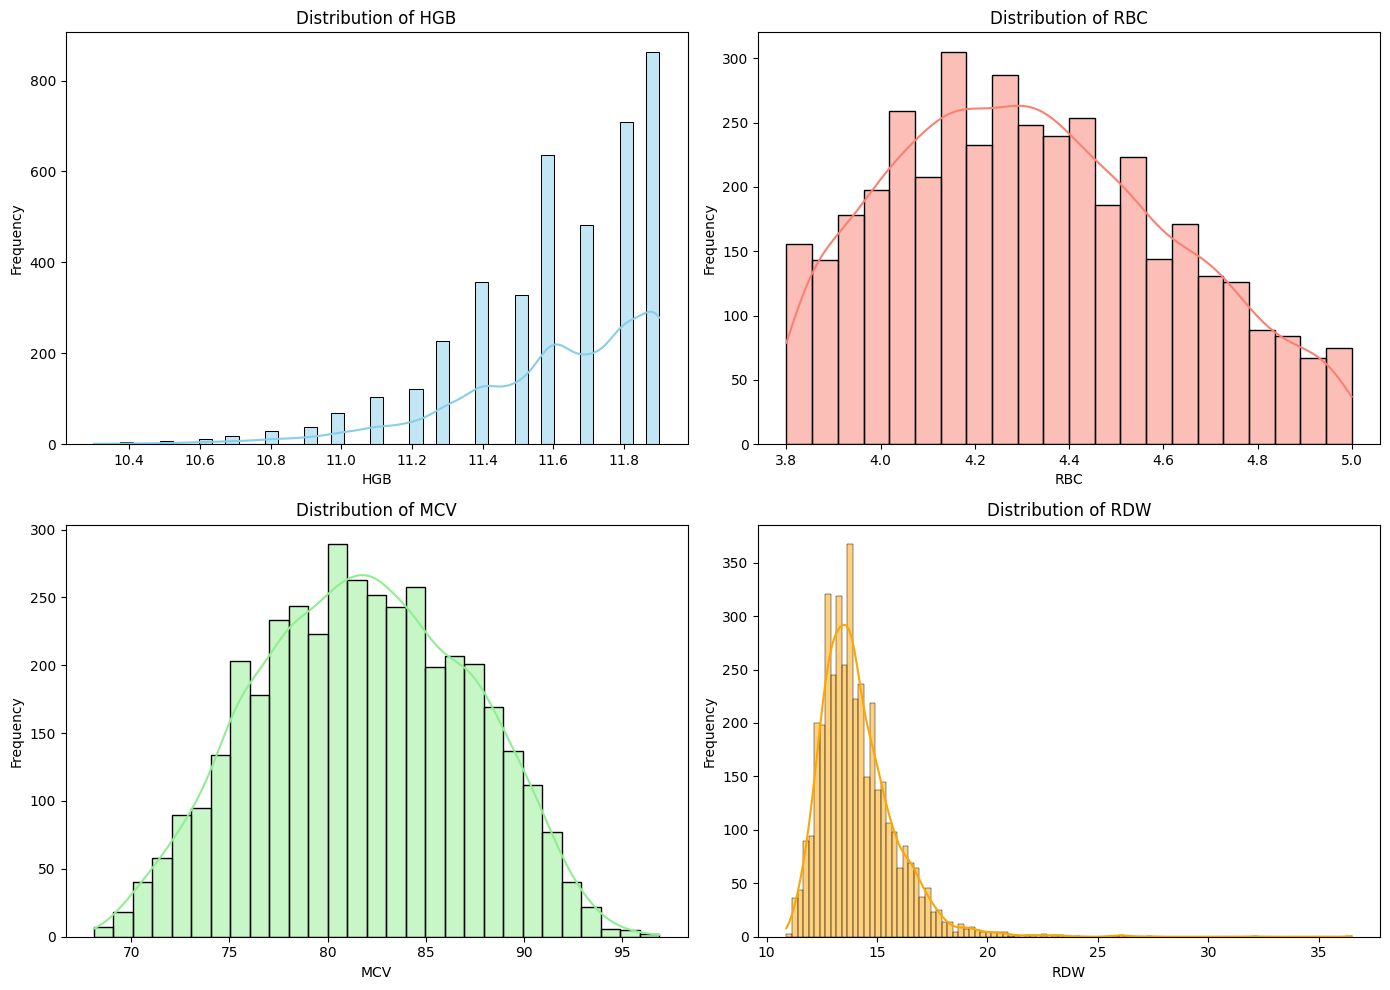

In [153]:

# تأكد من أنك قمت بتعيين نتائج البيانات الخاصة بك إلى المتغير results مسبقًا
# استخراج البيانات المتعلقة بحالة HGB Low, RBC Normal, HCT Normal
normal_case = results['HGB Low, RBC Normal, HCT Normal'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                     labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# حساب Mentzer Index
normal_case['Mentzer_Index'] = normal_case['MCV'] / normal_case['RBC']

# إعداد الرسم البياني
plt.figure(figsize=(14, 10))

# رسم التوزيع لـ HGB
plt.subplot(2, 2, 1)
sns.histplot(normal_case['HGB'], kde=True, color='skyblue')
plt.title('Distribution of HGB')
plt.xlabel('HGB')
plt.ylabel('Frequency')

# رسم التوزيع لـ RBC
plt.subplot(2, 2, 2)
sns.histplot(normal_case['RBC'], kde=True, color='salmon')
plt.title('Distribution of RBC')
plt.xlabel('RBC')
plt.ylabel('Frequency')

# رسم التوزيع لـ MCV
plt.subplot(2, 2, 3)
sns.histplot(normal_case['MCV'], kde=True, color='lightgreen')
plt.title('Distribution of MCV')
plt.xlabel('MCV')
plt.ylabel('Frequency')

# رسم التوزيع لـ RDW
plt.subplot(2, 2, 4)
sns.histplot(normal_case['RDW'], kde=True, color='orange')
plt.title('Distribution of RDW')
plt.xlabel('RDW')
plt.ylabel('Frequency')

# عرض الرسم
plt.tight_layout()
plt.show()


<Figure size 1400x1000 with 0 Axes>

<Axes: >

<Axes: xlabel='HGB', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of HGB - Microcytic (<80)')

Text(0.5, 0, 'HGB')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='RBC', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of RBC - Microcytic (<80)')

Text(0.5, 0, 'RBC')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='MCV', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of MCV - Microcytic (<80)')

Text(0.5, 0, 'MCV')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='RDW', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of RDW - Microcytic (<80)')

Text(0.5, 0, 'RDW')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='HGB', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of HGB - Normocytic (80-100)')

Text(0.5, 0, 'HGB')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='RBC', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of RBC - Normocytic (80-100)')

Text(0.5, 0, 'RBC')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='MCV', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of MCV - Normocytic (80-100)')

Text(0.5, 0, 'MCV')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='RDW', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of RDW - Normocytic (80-100)')

Text(0.5, 0, 'RDW')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Distribution of HGB - Macrocytic (>100)')

Text(0.5, 0, 'HGB')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Distribution of RBC - Macrocytic (>100)')

Text(0.5, 0, 'RBC')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Distribution of MCV - Macrocytic (>100)')

Text(0.5, 0, 'MCV')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Distribution of RDW - Macrocytic (>100)')

Text(0.5, 0, 'RDW')

Text(0, 0.5, 'Frequency')

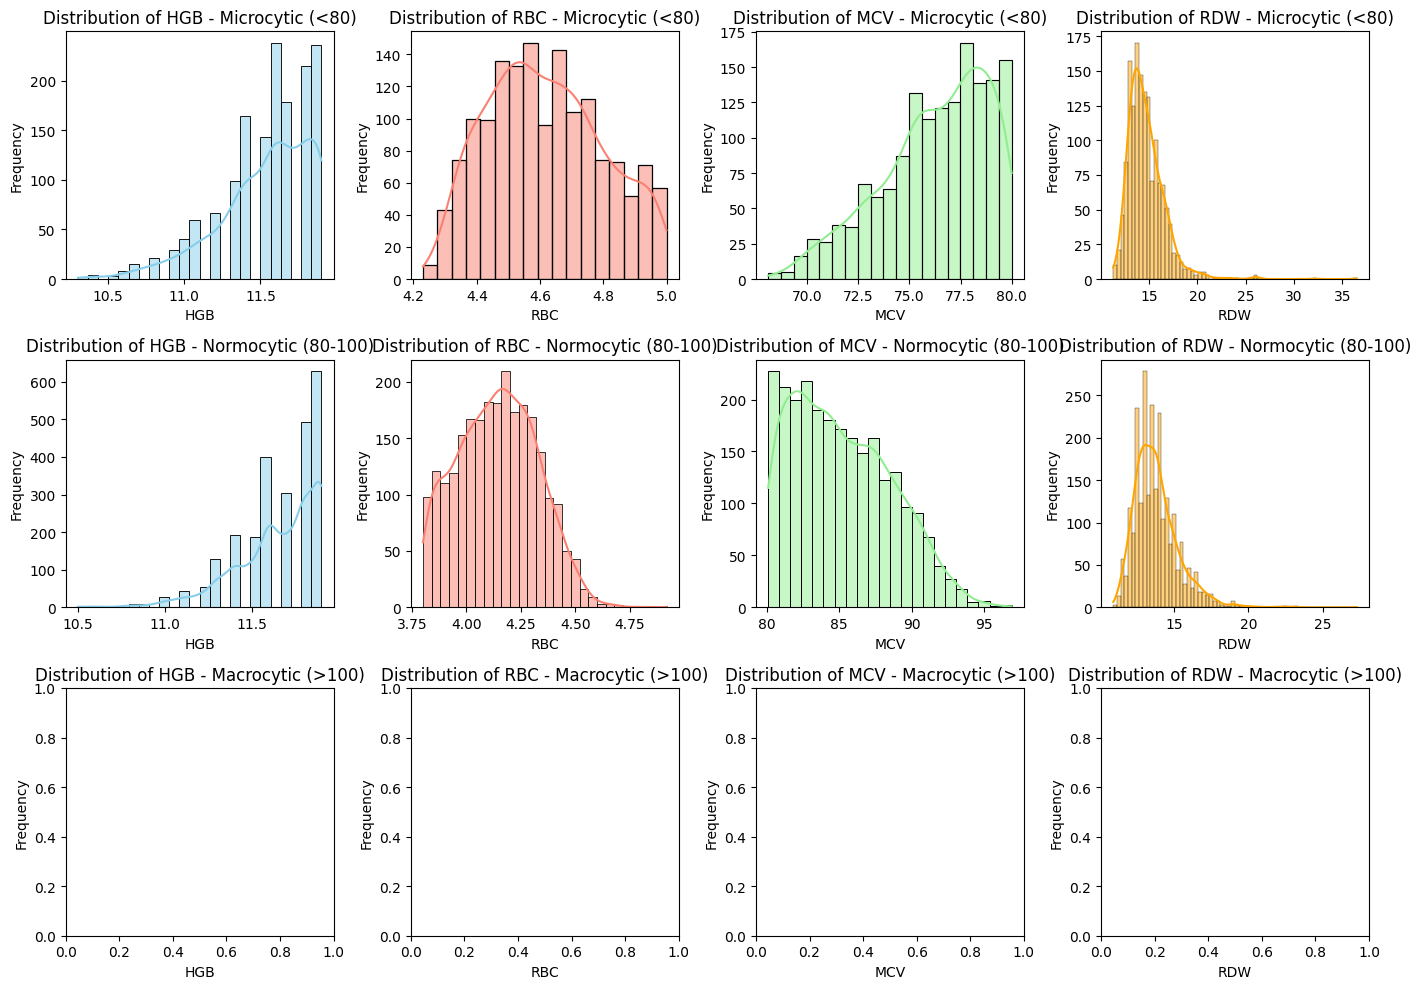

In [148]:
# تأكد من أنك قمت بتعيين نتائج البيانات الخاصة بك إلى المتغير results مسبقًا
# استخراج البيانات المتعلقة بحالة HGB Low, RBC Normal, HCT Normal
normal_case = results['HGB Low, RBC Normal, HCT Normal'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                     labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# حساب Mentzer Index
normal_case['Mentzer_Index'] = normal_case['MCV'] / normal_case['RBC']

# إعداد الرسم البياني
plt.figure(figsize=(14, 10))

# رسم التوزيع لكل فئة بشكل منفصل
for idx, category in enumerate(['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'], 1):
    category_data = normal_case[normal_case['MCV_Category'] == category]
    
    # رسم التوزيع لـ HGB
    plt.subplot(3, 4, idx * 4 - 3)
    sns.histplot(category_data['HGB'], kde=True, color='skyblue')
    plt.title(f'Distribution of HGB - {category}')
    plt.xlabel('HGB')
    plt.ylabel('Frequency')

    # رسم التوزيع لـ RBC
    plt.subplot(3, 4, idx * 4 - 2)
    sns.histplot(category_data['RBC'], kde=True, color='salmon')
    plt.title(f'Distribution of RBC - {category}')
    plt.xlabel('RBC')
    plt.ylabel('Frequency')

    # رسم التوزيع لـ MCV
    plt.subplot(3, 4, idx * 4 - 1)
    sns.histplot(category_data['MCV'], kde=True, color='lightgreen')
    plt.title(f'Distribution of MCV - {category}')
    plt.xlabel('MCV')
    plt.ylabel('Frequency')

    # رسم التوزيع لـ RDW
    plt.subplot(3, 4, idx * 4)
    sns.histplot(category_data['RDW'], kde=True, color='orange')
    plt.title(f'Distribution of RDW - {category}')
    plt.xlabel('RDW')
    plt.ylabel('Frequency')

# عرض الرسم
plt.tight_layout()
plt.show()


<Figure size 1400x1000 with 0 Axes>

<Axes: >

<Axes: xlabel='HGB', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of HGB - Normocytic, RDW < 14.5')

Text(0.5, 0, 'HGB')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='RBC', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of RBC - Normocytic, RDW < 14.5')

Text(0.5, 0, 'RBC')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='MCV', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of MCV - Normocytic, RDW < 14.5')

Text(0.5, 0, 'MCV')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='RDW', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of RDW - Normocytic, RDW < 14.5')

Text(0.5, 0, 'RDW')

Text(0, 0.5, 'Frequency')

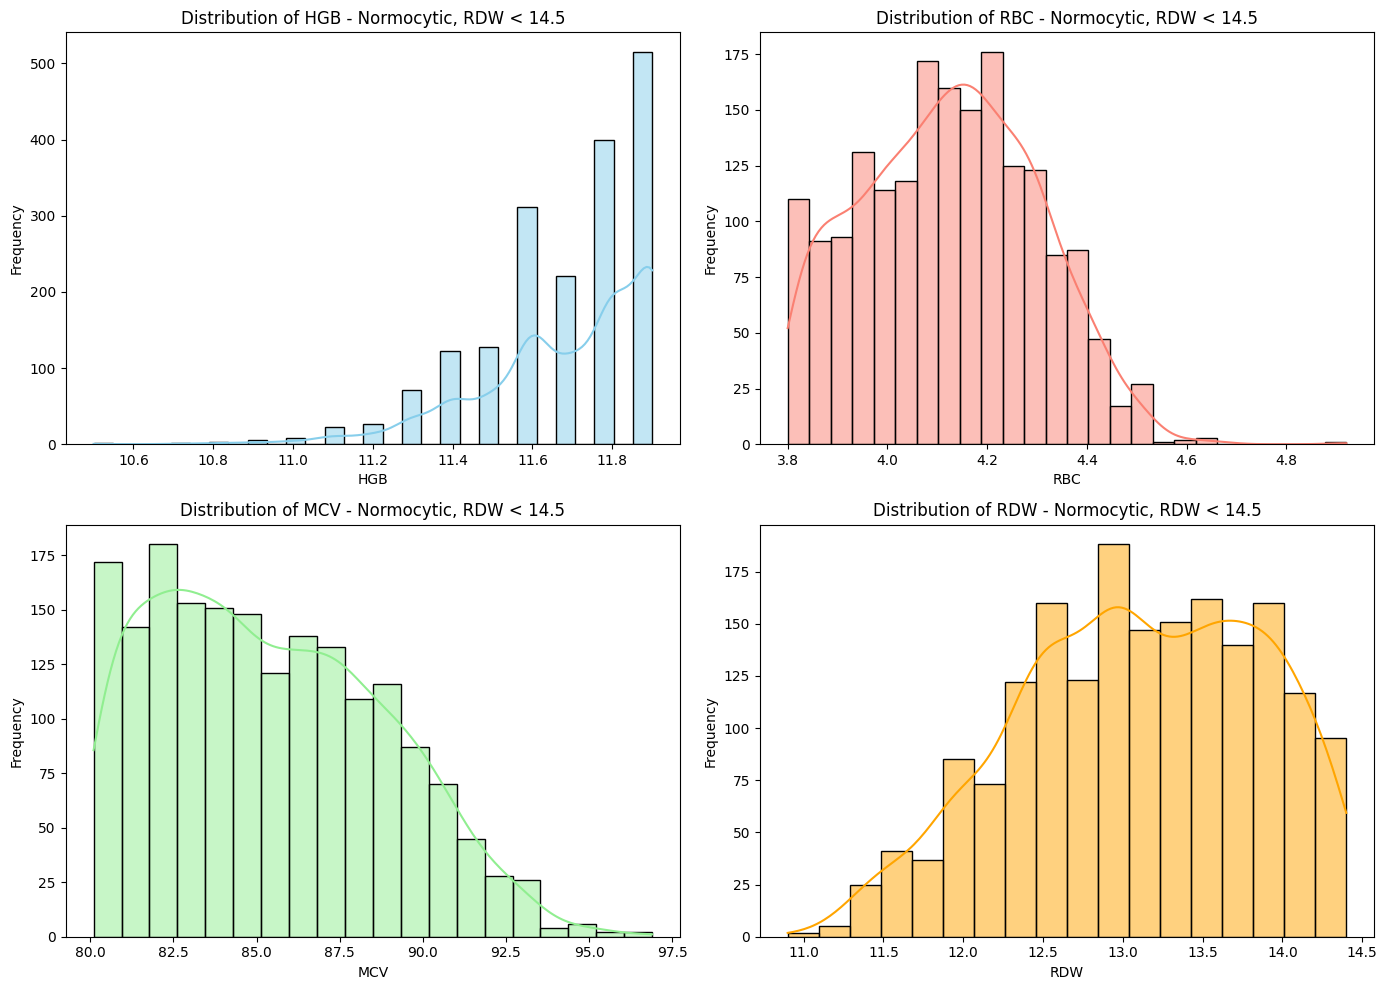

In [150]:
# تأكد من أنك قمت بتعيين نتائج البيانات الخاصة بك إلى المتغير results مسبقًا
# استخراج البيانات المتعلقة بحالة HGB Low, RBC Normal, HCT Normal
normal_case = results['HGB Low, RBC Normal, HCT Normal'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                     labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# حساب Mentzer Index
normal_case['Mentzer_Index'] = normal_case['MCV'] / normal_case['RBC']

# تصفية البيانات بحيث يكون MCV ضمن الفئة Normocytic و RDW < 14.5
normocytic_case = normal_case[(normal_case['MCV_Category'] == 'Normocytic (80-100)') & (normal_case['RDW'] < 14.5)]

# إعداد الرسم البياني
plt.figure(figsize=(14, 10))

# رسم التوزيع لـ HGB
plt.subplot(2, 2, 1)
sns.histplot(normocytic_case['HGB'], kde=True, color='skyblue')
plt.title('Distribution of HGB - Normocytic, RDW < 14.5')
plt.xlabel('HGB')
plt.ylabel('Frequency')

# رسم التوزيع لـ RBC
plt.subplot(2, 2, 2)
sns.histplot(normocytic_case['RBC'], kde=True, color='salmon')
plt.title('Distribution of RBC - Normocytic, RDW < 14.5')
plt.xlabel('RBC')
plt.ylabel('Frequency')

# رسم التوزيع لـ MCV
plt.subplot(2, 2, 3)
sns.histplot(normocytic_case['MCV'], kde=True, color='lightgreen')
plt.title('Distribution of MCV - Normocytic, RDW < 14.5')
plt.xlabel('MCV')
plt.ylabel('Frequency')

# رسم التوزيع لـ RDW
plt.subplot(2, 2, 4)
sns.histplot(normocytic_case['RDW'], kde=True, color='orange')
plt.title('Distribution of RDW - Normocytic, RDW < 14.5')
plt.xlabel('RDW')
plt.ylabel('Frequency')

# عرض الرسم
plt.tight_layout()
plt.show()


DataFrame for Macrocytic (>100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,Mentzer_Index
count,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000
mean,2.931250,10.359375,30.693750,104.678125,35.32500,33.771875,17.371875,208.843750,36.034389
std,0.266031,0.931132,2.852722,3.700108,1.45025,0.935409,3.553847,109.230183,3.878922
min,2.320000,8.200000,23.800000,100.100000,32.30000,32.100000,14.900000,41.000000,30.391566
25%,2.827500,9.900000,29.275000,101.675000,34.50000,33.125000,15.200000,148.500000,32.991803
50%,2.950000,10.500000,31.400000,104.300000,35.15000,33.750000,15.950000,186.000000,35.721293
75%,3.145000,11.100000,33.200000,107.225000,35.90000,34.350000,17.600000,247.250000,38.372371
max,3.320000,11.600000,33.800000,113.800000,39.60000,36.100000,30.500000,521.000000,47.025862


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='MCV', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of MCV for Normocytic Samples')

Text(0.5, 0, 'MCV')

Text(0, 0.5, 'Frequency')

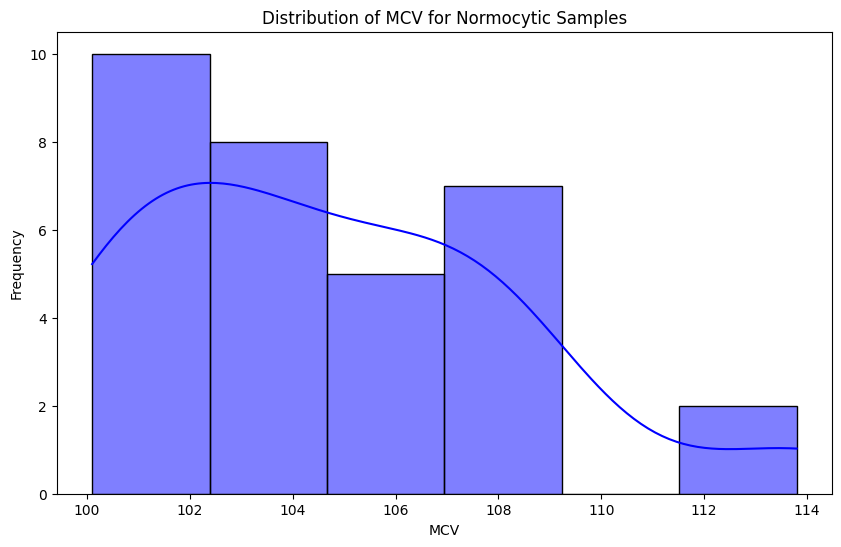


DataFrame for Microcytic (<80):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,HGB_Status,RBC_Status,HCT_Status,MCV_Category,Mentzer_Index
20976,3.79,7.6,25.4,66.8,20.2,30.2,15.9,272.0,Low,Low,Low,Microcytic (<80),17.625330
22698,3.49,8.9,27.1,77.9,25.8,33.2,15.9,208.0,Low,Low,Low,Microcytic (<80),22.320917
22750,3.67,8.8,27.5,75.1,24.0,32.1,15.1,639.0,Low,Low,Low,Microcytic (<80),20.463215
24048,3.76,9.1,28.3,75.3,24.2,32.3,17.6,325.0,Low,Low,Low,Microcytic (<80),20.026596
24799,3.70,7.4,25.2,67.9,20.0,29.4,19.7,459.0,Low,Low,Low,Microcytic (<80),18.351351
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466,3.70,8.9,28.4,76.7,24.1,31.4,15.7,291.0,Low,Low,Low,Microcytic (<80),20.729730
3697,2.74,7.2,19.9,72.6,26.2,36.0,27.0,427.0,Low,Low,Low,Microcytic (<80),26.496350
4031,3.58,8.4,27.3,76.2,23.4,30.7,16.5,188.0,Low,Low,Low,Microcytic (<80),21.284916
4962,3.58,8.0,25.9,72.5,22.5,31.0,15.9,244.0,Low,Low,Low,Microcytic (<80),20.251397


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,Mentzer_Index
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,3.556234,8.079221,25.585714,71.994805,22.771429,31.537662,18.742857,338.597403,20.353681
std,0.233424,1.162046,2.862034,6.829038,3.049972,1.806570,3.533167,140.592380,2.536410
min,2.740000,5.800000,19.700000,55.400000,16.400000,27.800000,14.600000,57.000000,14.892473
25%,3.490000,7.100000,23.200000,66.800000,20.200000,30.400000,16.300000,222.000000,18.442623
50%,3.630000,8.300000,25.900000,74.500000,23.800000,31.500000,17.800000,317.000000,20.343915
75%,3.720000,8.900000,28.200000,77.300000,25.100000,32.500000,20.000000,427.000000,21.780415
max,3.790000,10.200000,30.100000,80.000000,27.600000,36.200000,31.800000,757.000000,26.496350



DataFrame for Normocytic (80-100):


,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,PLT,Mentzer_Index
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000
mean,3.529549,10.938480,31.984798,90.738005,31.015796,34.183729,13.031710,259.539192,25.858392
std,0.215583,0.648288,1.727770,3.942024,1.588963,0.935346,0.762906,82.013812,2.649780
min,1.710000,5.900000,16.300000,80.300000,25.200000,30.600000,11.000000,13.000000,21.269841
25%,3.430000,10.600000,31.200000,88.100000,30.000000,33.600000,12.500000,209.000000,24.067899
50%,3.580000,11.100000,32.400000,90.700000,31.100000,34.200000,13.000000,249.000000,25.312033
75%,3.680000,11.400000,33.300000,93.400000,32.075000,34.800000,13.600000,301.000000,27.114740
max,3.790000,11.900000,33.900000,99.900000,35.800000,37.300000,14.400000,961.000000,55.555556


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='MCV', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of MCV for Normocytic Samples')

Text(0.5, 0, 'MCV')

Text(0, 0.5, 'Frequency')

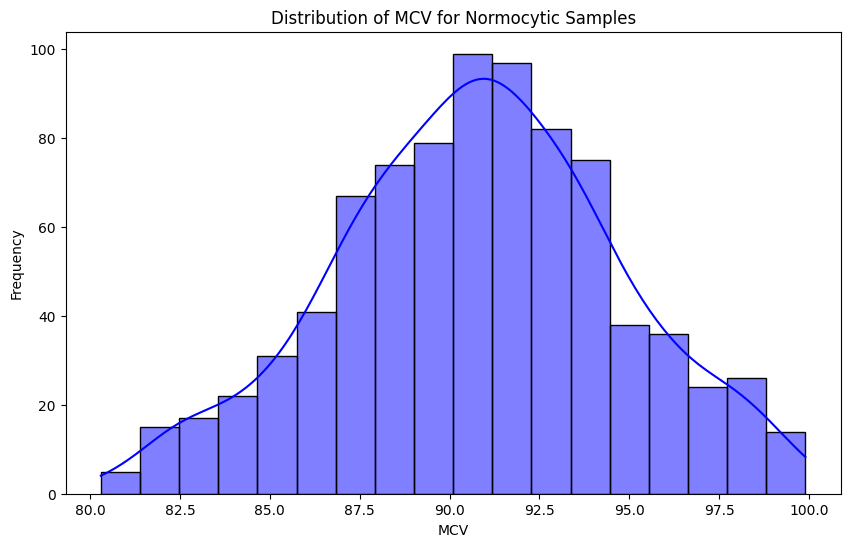

In [215]:
# لتغيير إعدادات العرض في pandas


# تأكد من أنك قمت بتعيين نتائج البيانات الخاصة بك إلى المتغير results مسبقًا
# إعدادات العرض - يمكنك إلغاء التعليقات إذا كنت بحاجة لرؤية جميع الصفوف والأعمدة
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# إعادة تعيين إعدادات العرض الافتراضية بعد الانتهاء
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Normal, HCT Normal
normal_case = results['HGB Low, RBC Low, HCT Low'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                     labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# حساب Mentzer Index
# Mentzer Index = MCV / RBC
normal_case['Mentzer_Index'] = normal_case['MCV'] / normal_case['RBC']

# استخراج DataFrame لكل نوع
macrocytic_df = normal_case[normal_case['MCV_Category'] == 'Macrocytic (>100)']
microcytic_df = normal_case[normal_case['MCV_Category'] == 'Microcytic (<80)']
normocytic_df = normal_case[normal_case['MCV_Category'] == 'Normocytic (80-100)']

# عرض DataFrame الخاص بكل نوع مع Mentzer Index
print("DataFrame for Macrocytic (>100):")
macrocytic_df = macrocytic_df[macrocytic_df["RDW"] > 14.5]
macrocytic_df.describe()

# Plotting the distribution of MCV for normocytic_df
plt.figure(figsize=(10, 6))
sns.histplot(macrocytic_df['MCV'], kde=True, color='blue')
plt.title('Distribution of MCV for Normocytic Samples')
plt.xlabel('MCV')
plt.ylabel('Frequency')
plt.show()

print("\nDataFrame for Microcytic (<80):")
microcytic_df =microcytic_df[microcytic_df["RDW"]>14.5]
microcytic_df
microcytic_df.describe()

print("\nDataFrame for Normocytic (80-100):")
normocytic_df = normocytic_df[normocytic_df["RDW"] < 14.5]
normocytic_df.describe()

# Plotting the distribution of MCV for normocytic_df
plt.figure(figsize=(10, 6))
sns.histplot(normocytic_df['MCV'], kde=True, color='blue')
plt.title('Distribution of MCV for Normocytic Samples')
plt.xlabel('MCV')
plt.ylabel('Frequency')
plt.show()


<Figure size 1800x600 with 0 Axes>

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Microcytic (<80)')

Text(0.5, 0, 'MCV')

Text(0, 0.5, 'RDW')

<Axes: >

<Axes: xlabel='MCV', ylabel='RDW'>

Text(0.5, 1.0, 'Normocytic (80-100)')

Text(0.5, 0, 'MCV')

Text(0, 0.5, 'RDW')

<Axes: >

<Axes: xlabel='MCV', ylabel='RDW'>

Text(0.5, 1.0, 'Macrocytic (>100)')

Text(0.5, 0, 'MCV')

Text(0, 0.5, 'RDW')

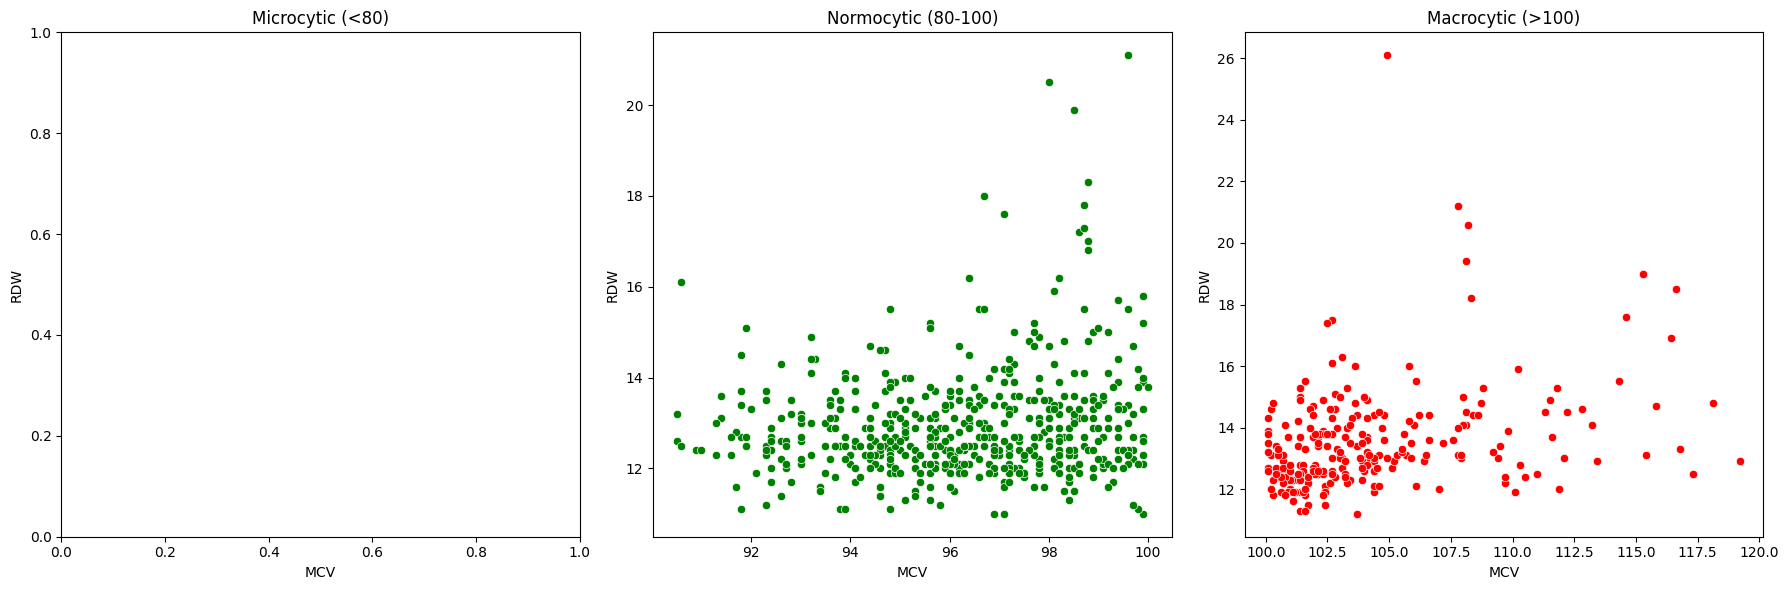

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# تأكد من أنك قمت بتعيين نتائج البيانات الخاصة بك إلى المتغير results مسبقًا
# إعدادات العرض - يمكنك إلغاء التعليقات إذا كنت بحاجة لرؤية جميع الصفوف والأعمدة
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# إعادة تعيين إعدادات العرض الافتراضية بعد الانتهاء
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# استخراج البيانات المتعلقة بحالة HGB Normal, RBC Low, HCT Normal
normal_case = results['HGB Normal, RBC Low, HCT Normal'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                     labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# استخراج DataFrame لكل نوع
macrocytic_df = normal_case[normal_case['MCV_Category'] == 'Macrocytic (>100)']
microcytic_df = normal_case[normal_case['MCV_Category'] == 'Microcytic (<80)']
normocytic_df = normal_case[normal_case['MCV_Category'] == 'Normocytic (80-100)']

# إعداد الرسم البياني
plt.figure(figsize=(18, 6))

# رسم Scatter Plot لكل نوع
plt.subplot(1, 3, 1)
sns.scatterplot(data=microcytic_df, x='MCV', y='RDW', color='blue')
plt.title('Microcytic (<80)')
plt.xlabel('MCV')
plt.ylabel('RDW')

plt.subplot(1, 3, 2)
sns.scatterplot(data=normocytic_df, x='MCV', y='RDW', color='green')
plt.title('Normocytic (80-100)')
plt.xlabel('MCV')
plt.ylabel('RDW')

plt.subplot(1, 3, 3)
sns.scatterplot(data=macrocytic_df, x='MCV', y='RDW', color='red')
plt.title('Macrocytic (>100)')
plt.xlabel('MCV')
plt.ylabel('RDW')

# عرض الرسم البياني
plt.tight_layout()
plt.show()


<Figure size 1400x1000 with 0 Axes>

<Axes: >

<Axes: xlabel='HGB', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of HGB - Normocytic, RDW < 14.5')

Text(0.5, 0, 'HGB')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='RBC', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of RBC - Normocytic, RDW < 14.5')

Text(0.5, 0, 'RBC')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='MCV', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of MCV - Normocytic, RDW < 14.5')

Text(0.5, 0, 'MCV')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='RDW', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of RDW - Normocytic, RDW < 14.5')

Text(0.5, 0, 'RDW')

Text(0, 0.5, 'Frequency')

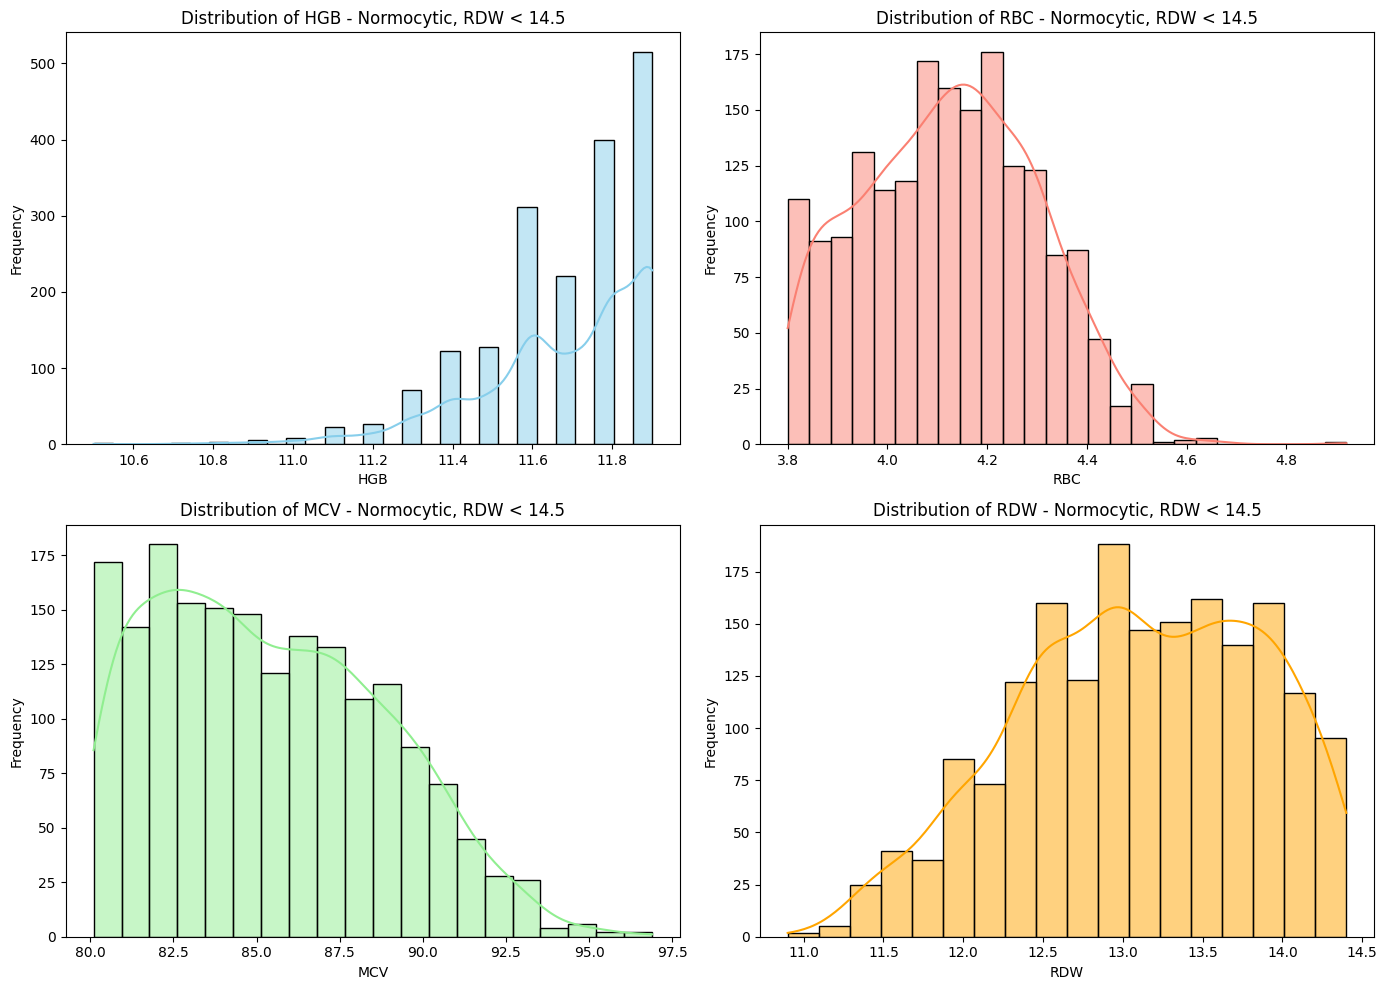

In [171]:
# تأكد من أنك قمت بتعيين نتائج البيانات الخاصة بك إلى المتغير results مسبقًا
# استخراج البيانات المتعلقة بحالة HGB Low, RBC Normal, HCT Normal
normal_case = results['HGB Low, RBC Normal, HCT Normal'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 120], 
                                     labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# حساب Mentzer Index
normal_case['Mentzer_Index'] = normal_case['MCV'] / normal_case['RBC']

# تصفية البيانات بحيث يكون MCV ضمن الفئة Normocytic و RDW < 14.5
normocytic_case = normal_case[(normal_case['MCV_Category'] == 'Normocytic (80-100)') & (normal_case['RDW'] < 14.5)]

# إعداد الرسم البياني
plt.figure(figsize=(14, 10))

# رسم التوزيع لـ HGB
plt.subplot(2, 2, 1)
sns.histplot(normocytic_case['HGB'], kde=True, color='skyblue')
plt.title('Distribution of HGB - Normocytic, RDW < 14.5')
plt.xlabel('HGB')
plt.ylabel('Frequency')

# رسم التوزيع لـ RBC
plt.subplot(2, 2, 2)
sns.histplot(normocytic_case['RBC'], kde=True, color='salmon')
plt.title('Distribution of RBC - Normocytic, RDW < 14.5')
plt.xlabel('RBC')
plt.ylabel('Frequency')

# رسم التوزيع لـ MCV
plt.subplot(2, 2, 3)
sns.histplot(normocytic_case['MCV'], kde=True, color='lightgreen')
plt.title('Distribution of MCV - Normocytic, RDW < 14.5')
plt.xlabel('MCV')
plt.ylabel('Frequency')

# رسم التوزيع لـ RDW
plt.subplot(2, 2, 4)
sns.histplot(normocytic_case['RDW'], kde=True, color='orange')
plt.title('Distribution of RDW - Normocytic, RDW < 14.5')
plt.xlabel('RDW')
plt.ylabel('Frequency')

# عرض الرسم
plt.tight_layout()
plt.show()


<Figure size 1400x1000 with 0 Axes>

<Axes: >

<Axes: xlabel='HGB', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of HGB - Microcytic (<80)')

Text(0.5, 0, 'HGB')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='RBC', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of RBC - Microcytic (<80)')

Text(0.5, 0, 'RBC')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='MCV', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of MCV - Microcytic (<80)')

Text(0.5, 0, 'MCV')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='RDW', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of RDW - Microcytic (<80)')

Text(0.5, 0, 'RDW')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='HGB', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of HGB - Normocytic (80-100)')

Text(0.5, 0, 'HGB')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='RBC', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of RBC - Normocytic (80-100)')

Text(0.5, 0, 'RBC')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='MCV', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of MCV - Normocytic (80-100)')

Text(0.5, 0, 'MCV')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='RDW', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of RDW - Normocytic (80-100)')

Text(0.5, 0, 'RDW')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='HGB', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of HGB - Macrocytic (>100)')

Text(0.5, 0, 'HGB')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='RBC', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of RBC - Macrocytic (>100)')

Text(0.5, 0, 'RBC')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='MCV', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of MCV - Macrocytic (>100)')

Text(0.5, 0, 'MCV')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='RDW', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of RDW - Macrocytic (>100)')

Text(0.5, 0, 'RDW')

Text(0, 0.5, 'Frequency')

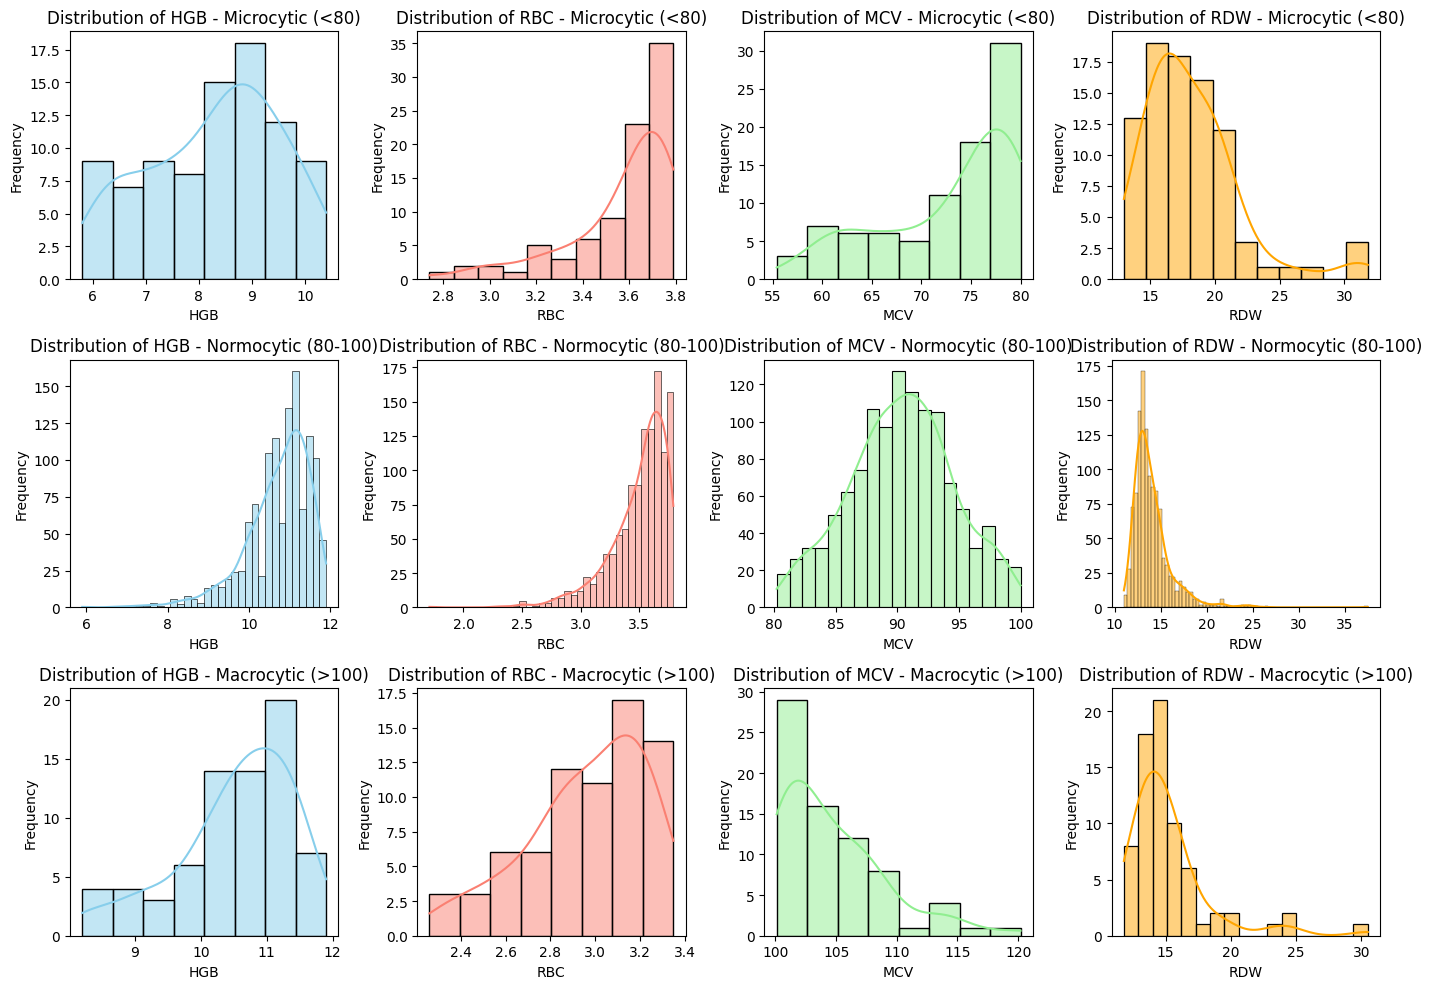

In [177]:
# تأكد من أنك قمت بتعيين نتائج البيانات الخاصة بك إلى المتغير results مسبقًا
# استخراج البيانات المتعلقة بحالة HGB Low, RBC Normal, HCT Normal
normal_case = results['HGB Low, RBC Low, HCT Low'].copy()  # استخدام copy لتجنب التحذيرات

# تصنيف البيانات حسب MCV
normal_case['MCV_Category'] = pd.cut(normal_case['MCV'], bins=[0, 80, 100, 150], 
                                     labels=['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'])

# حساب Mentzer Index
normal_case['Mentzer_Index'] = normal_case['MCV'] / normal_case['RBC']

# إعداد الرسم البياني
plt.figure(figsize=(14, 10))

# رسم التوزيع لكل فئة بشكل منفصل
for idx, category in enumerate(['Microcytic (<80)', 'Normocytic (80-100)', 'Macrocytic (>100)'], 1):
    category_data = normal_case[normal_case['MCV_Category'] == category]
    
    # رسم التوزيع لـ HGB
    plt.subplot(3, 4, idx * 4 - 3)
    sns.histplot(category_data['HGB'], kde=True, color='skyblue')
    plt.title(f'Distribution of HGB - {category}')
    plt.xlabel('HGB')
    plt.ylabel('Frequency')

    # رسم التوزيع لـ RBC
    plt.subplot(3, 4, idx * 4 - 2)
    sns.histplot(category_data['RBC'], kde=True, color='salmon')
    plt.title(f'Distribution of RBC - {category}')
    plt.xlabel('RBC')
    plt.ylabel('Frequency')

    # رسم التوزيع لـ MCV
    plt.subplot(3, 4, idx * 4 - 1)
    sns.histplot(category_data['MCV'], kde=True, color='lightgreen')
    plt.title(f'Distribution of MCV - {category}')
    plt.xlabel('MCV')
    plt.ylabel('Frequency')

    # رسم التوزيع لـ RDW
    plt.subplot(3, 4, idx * 4)
    sns.histplot(category_data['RDW'], kde=True, color='orange')
    plt.title(f'Distribution of RDW - {category}')
    plt.xlabel('RDW')
    plt.ylabel('Frequency')

# عرض الرسم
plt.tight_layout()
plt.show()
